# imports and setup

In [1]:
# Jupyter
%matplotlib inline

# Env + basics
import os
import pandas as pd

# Project modules
from pipeline.engine import run_pipeline
from pipeline.reporting import show_run_report
from pipeline.review import ReviewConfig

# Load data (ohne parse_dates)
file_path = r"path_to_file"
df = pd.read_csv(file_path, sep=",", on_bad_lines="skip", engine="python").reset_index(drop=True)

print(len(df))
df.head(12)

19887


pps_order_id pps_order_pos_id            resource_group plan_start  \
0    7012227003                5                        RP 2025-04-23   
1    7012227003               10  Fräsen Gruppe Kleinteile 2025-04-24   
2    7012227006               70                    3D CAM 2025-04-28   
3     510037002               10              Konstruktion 2025-02-13   
4     701219706              120                        RP 2025-04-30   
5    7012085009              105            Drahtschneiden 2025-04-23   
6    7012085009              106          Schleifen-Gruppe 2025-04-28   
7    7012085009              110      Fräsen Gruppe 5-Achs 2025-04-30   
8    7012085012               90      Fräsen Gruppe 5-Achs 2025-04-24   
9    7012086002              120                 Erodieren 2025-04-28   
10   7012087017              170                   Montage 2025-04-30   
11   7012087021              160                   Montage 2025-04-25   

    ist_start  plan_ende ist_ende   status                     avg_type  \
0  2025-05-12 2025-04-24      NaT  laufend               Bauraum prüfen   
1  2025-05-11 2025-04-30      NaT  laufend      Kleinbauteile schruppen   
2  2025-05-11 2025-04-29      NaT  laufend                   NC-Ausgabe   
3  2025-05-09 2025-02-14      NaT  laufend         CAD-Modell erstellen   
4  2025-05-08 2025-04-30      NaT  laufend            Baujob überwachen   
5  2025-05-08 2025-04-28      NaT  laufend  Zwischenmessung durchführen   
6  2025-05-08 2025-04-30      NaT  laufend  Zwischenmessung durchführen   
7  2025-05-08 2025-04-30      NaT  laufend             Passungen fräsen   
8  2025-05-08 2025-04-25      NaT  laufend             Passungen fräsen   
9  2025-05-06 2025-04-30      NaT  laufend           Senkerodieren fein   
10 2025-05-08 2025-04-30      NaT  laufend             Funktionsprüfung   
11 2025-05-08 2025-04-28      NaT  laufend             Funktionsprüfung   

    ist_dlz  ta_zugang  ta_abgang  ta_rel            ta_status  
0       NaN       19.0        NaN     NaN  TA nicht erreichbar  
1       NaN       17.0        NaN     NaN  TA nicht erreichbar  
2       NaN       13.0        NaN     NaN  TA nicht erreichbar  
3       NaN       85.0        NaN     NaN  TA nicht erreichbar  
4       NaN        8.0        NaN     NaN  TA nicht erreichbar  
5       NaN       15.0        NaN     NaN  TA nicht erreichbar  
6       NaN       10.0        NaN     NaN  TA nicht erreichbar  
7       NaN        8.0        NaN     NaN  TA nicht erreichbar  
8       NaN       14.0        NaN     NaN  TA nicht erreichbar  
9       NaN        8.0        NaN     NaN  TA nicht erreichbar  
10      NaN        8.0        NaN     NaN  TA nicht erreichbar  
11      NaN       13.0        NaN     NaN  TA nicht erreichbar

# experiments - openrouter local llm

In [2]:
import os
os.environ["OPENROUTER_API_KEY"] = "sk-..."   # deinen Key hier rein

In [3]:
from agents.factory import AgentFactory
from agents.llm_openrouter import OpenRouterJSONLLM

openrouter_llm = OpenRouterJSONLLM(
    model="deepseek/deepseek-r1-0528:free",
    api_key=os.environ["OPENROUTER_API_KEY"],
    app_url="http://localhost",            # optional, aber empfohlen
    app_name="data_agent_deeping",         # optional, aber empfohlen
    max_output_tokens=4096,
)

agents = AgentFactory(llm=openrouter_llm)

In [4]:
xx

NameError: name 'xx' is not defined

## 1

In [ ]:
prompt = "Show the distribution of end schedule deviation for operations labeled 'mit TA'."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 2

In [ ]:
prompt = "Display the distribution of cycle time deviation for sawing operations with completion in 2024."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 3

In [ ]:
prompt = "Show me a statistical summary of the cycle times for ressource group Drahtschneiden."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 4

In [ ]:
prompt = "Display key statistics of cycles times for finished operations."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 5

In [ ]:
prompt = "What are average cycle times by ressource group for finished parts?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 6

In [ ]:
prompt = "Compare the max lead times for Fräsen Gruppe Kleinteile by operation type."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 7

In [ ]:
prompt = "Over time, how is monthly start schedule deviation developing for function check operations?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 8

In [ ]:
prompt = "Show me the trend for weekly end schedule deviations of operations in 2025."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 9

In [ ]:
prompt = "How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 10

In [ ]:
prompt = "Show me how the numerical values in the data are related to each other, finished operations only."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 11

In [ ]:
prompt = "What are the main drivers for end-dates being higher or lower? Only operations in 2024."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 12

In [ ]:
prompt = "Which drivers affected lead times for assembly operations?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 13

In [ ]:
prompt = "Forecast weekly average end-date deviation for the next 6 weeks."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 14

In [ ]:
prompt = "Show me how the maximum start deviation will change for the next 6 weeks."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 15

In [ ]:
prompt = "What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 16

In [ ]:
prompt = "If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 17

In [ ]:
prompt = "Predict the lead time deviation if lead time is 3 days and start deviation is -20 days."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 18

In [ ]:
prompt = "Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 19

In [ ]:
prompt = "Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 20

In [ ]:
prompt = "Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 21

In [ ]:
prompt = "How is the cycle time distributed for Profilschleifen across ta status categories?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 22

In [ ]:
prompt = "For Konstruktion operations, what are the main statistics about the end schedule deviation?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 23

In [ ]:
prompt = "Which resource groups drive the end-date deviation the most?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 24

In [ ]:
prompt = "Forecast the next 16 weeks of weekly average Lead-time deviation."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 25

In [ ]:
prompt = "Which resource group should we route to to minimize end deviation?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 26

In [ ]:
prompt = "Which operation type would be best for low cycle times?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 27

In [ ]:
prompt = "I want to improve cycle time (lower is better). What can I do? Show me decision options."

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 28

In [ ]:
prompt = "For unfinshed operations: I want to decrease start deviation. What do I need to work on?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 29

In [ ]:
prompt = "Could I improve average cycle time if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

## 30

In [ ]:
prompt = "What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?"

state, df_out, results = await run_pipeline(
    prompt=prompt,
    df=df,
    agents=agents,
    review_config=ReviewConfig(
        enabled=True,
        #after_steps={"family","type","filters","columns","prepare","aggregate","viz","analyze","verify","finalize"},
        after_steps={},
        show_step_inputs=True,
    )
)

show_run_report(
    results,
    show_head_df=df_out,
    show_step_inputs=False,
    verbose_steps=False,
    render_final=True,
    final_head_rows=5,
)

# Stability experiment

In [5]:
prompts_with_alternatives = [
    {
        "id": 1,
        "base": "Show the distribution of end schedule deviation for operations labeled 'mit TA'.",
        "alts": [
            "Plot the distribution of end schedule deviation for operations labeled 'mit TA'.",
            "Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.",
            "Provide a histogram-style view of end schedule deviation for operations labeled 'mit TA'.",
        ],
    },
    {
        "id": 2,
        "base": "Display the distribution of cycle time deviation for sawing operations with completion in 2024.",
        "alts": [
            "Show the distribution of cycle time deviation for sawing operations with completion in 2024.",
            "Visualize the distribution of cycle time deviation for sawing operations completed in 2024.",
            "Plot cycle time deviation distribution for sawing operations with completion in 2024.",
        ],
    },
    {
        "id": 3,
        "base": "Show me a statistical summary of the cycle times for ressource group Drahtschneiden.",
        "alts": [
            "Provide a statistical summary of the cycle times for ressource group Drahtschneiden.",
            "Give me summary statistics for the cycle times in ressource group Drahtschneiden.",
            "Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.",
        ],
    },
    {
        "id": 4,
        "base": "Display key statistics of cycles times for finished operations.",
        "alts": [
            "Show key statistics of cycles times for finished operations.",
            "Provide key summary statistics for cycles times of finished operations.",
            "Report the main descriptive statistics of cycles times for finished operations.",
        ],
    },
    {
        "id": 5,
        "base": "What are average cycle times by ressource group for finished parts?",
        "alts": [
            "Show average cycle times by ressource group for finished parts.",
            "Compute the average cycle times by ressource group for finished parts.",
            "Give me a breakdown of average cycle times per ressource group for finished parts.",
        ],
    },
    {
        "id": 6,
        "base": "Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.",
        "alts": [
            "Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.",
            "Compare max lead times across operation type for Fräsen Gruppe Kleinteile.",
            "Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.",
        ],
    },
    {
        "id": 7,
        "base": "Over time, how is monthly start schedule deviation developing for function check operations?",
        "alts": [
            "Show how monthly start schedule deviation evolves over time for function check operations.",
            "Plot the monthly start schedule deviation trend over time for function check operations.",
            "How does monthly start schedule deviation change over time for function check operations?",
        ],
    },
    {
        "id": 8,
        "base": "Show me the trend for weekly end schedule deviations of operations in 2025.",
        "alts": [
            "Plot the weekly end schedule deviations trend for operations in 2025.",
            "Display how weekly end schedule deviations develop for operations in 2025.",
            "Visualize the weekly trend of end schedule deviations for operations in 2025.",
        ],
    },
    {
        "id": 9,
        "base": "How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?",
        "alts": [
            "Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.",
            "Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.",
            "Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.",
        ],
    },
    {
        "id": 10,
        "base": "Show me how the numerical values in the data are related to each other, finished operations only.",
        "alts": [
            "For finished operations only, show how the numerical values in the data relate to each other.",
            "Create an overview of relationships among the numerical values, finished operations only.",
            "For finished operations only, visualize relationships between the numerical values in the data.",
        ],
    },
    {
        "id": 11,
        "base": "What are the main drivers for end-dates being higher or lower? Only operations in 2024.",
        "alts": [
            "Identify the main drivers for end-dates being higher or lower, only operations in 2024.",
            "For only operations in 2024, what factors are driving end-dates to be higher or lower?",
            "Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.",
        ],
    },
    {
        "id": 12,
        "base": "Which drivers affected lead times for assembly operations?",
        "alts": [
            "Identify which drivers affected lead times for assembly operations.",
            "What factors are driving lead times for assembly operations?",
            "Show the key drivers influencing lead times for assembly operations.",
        ],
    },
    {
        "id": 13,
        "base": "Forecast weekly average end-date deviation for the next 6 weeks.",
        "alts": [
            "Predict weekly average end-date deviation for the next 6 weeks.",
            "Create a forecast of weekly average end-date deviation for the next 6 weeks.",
            "Estimate the weekly average end-date deviation over the next 6 weeks.",
        ],
    },
    {
        "id": 14,
        "base": "Show me how the maximum start deviation will change for the next 6 weeks.",
        "alts": [
            "Forecast how the maximum start deviation will change for the next 6 weeks.",
            "Predict the change in maximum start deviation for the next 6 weeks.",
            "Display the expected trend of maximum start deviation for the next 6 weeks.",
        ],
    },
    {
        "id": 15,
        "base": "What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.",
        "alts": [
            "Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.",
            "Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.",
            "Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?",
        ],
    },
    {
        "id": 16,
        "base": "If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?",
        "alts": [
            "Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.",
            "What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?",
            "Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.",
        ],
    },
    {
        "id": 17,
        "base": "Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.",
        "alts": [
            "What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?",
            "Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.",
            "Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.",
        ],
    },
    {
        "id": 18,
        "base": "Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.",
        "alts": [
            "Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.",
            "What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?",
            "Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.",
        ],
    },
    {
        "id": 19,
        "base": "Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?",
        "alts": [
            "Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.",
            "For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?",
            "Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.",
        ],
    },
    {
        "id": 20,
        "base": "Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.",
        "alts": [
            "Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.",
            "What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?",
            "Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.",
        ],
    },
    {
        "id": 21,
        "base": "How is the cycle time distributed for Profilschleifen across ta status categories?",
        "alts": [
            "Show the distribution of cycle time for Profilschleifen across ta status categories.",
            "Visualize how cycle time is distributed for Profilschleifen by ta status categories.",
            "Plot cycle time distributions for Profilschleifen split by ta status categories.",
        ],
    },
    {
        "id": 22,
        "base": "For Konstruktion operations, what are the main statistics about the end schedule deviation?",
        "alts": [
            "Show the main statistics about the end schedule deviation for Konstruktion operations.",
            "Provide summary statistics of end schedule deviation for Konstruktion operations.",
            "Report the key descriptive statistics for end schedule deviation in Konstruktion operations.",
        ],
    },
    {
        "id": 23,
        "base": "Which resource groups drive the end-date deviation the most?",
        "alts": [
            "Identify which resource groups drive end-date deviation the most.",
            "Which resource groups have the strongest impact on end-date deviation?",
            "Show the resource groups with the biggest contribution to end-date deviation.",
        ],
    },
    {
        "id": 24,
        "base": "Forecast the next 16 weeks of weekly average Lead-time deviation.",
        "alts": [
            "Predict the weekly average Lead-time deviation for the next 16 weeks.",
            "Create a forecast for weekly average Lead-time deviation over the next 16 weeks.",
            "Estimate weekly average Lead-time deviation across the next 16 weeks.",
        ],
    },
    {
        "id": 25,
        "base": "Which resource group should we route to to minimize end deviation?",
        "alts": [
            "Recommend which resource group to route to in order to minimize end deviation.",
            "Which resource group would best minimize end deviation if we route work there?",
            "Suggest a resource group to route to so that end deviation is minimized.",
        ],
    },
    {
        "id": 26,
        "base": "Which operation type would be best for low cycle times?",
        "alts": [
            "Identify the operation type that is best for low cycle times.",
            "Which operation type tends to give the lowest cycle times?",
            "Recommend an operation type for achieving low cycle times.",
        ],
    },
    {
        "id": 27,
        "base": "I want to improve cycle time (lower is better). What can I do? Show me decision options.",
        "alts": [
            "I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.",
            "To improve cycle time (lower is better), what can I do? Please show decision options.",
            "I want lower cycle time (lower is better). Show me decision options to achieve that.",
        ],
    },
    {
        "id": 28,
        "base": "For unfinshed operations: I want to decrease start deviation. What do I need to work on?",
        "alts": [
            "For unfinshed operations, what should I work on to decrease start deviation?",
            "For unfinshed operations: identify what I need to improve to decrease start deviation.",
            "For unfinshed operations: show the main levers to decrease start deviation.",
        ],
    },
    {
        "id": 29,
        "base": "Could I improve average cycle time if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?",
        "alts": [
            "Would average cycle time improve if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?",
            "Estimate the impact on average cycle time if we substitute  ‘CAM-Fertigung’ with '3D CAM'.",
            "If '3D CAM' replaces  ‘CAM-Fertigung’, could average cycle time get better?",
        ],
    },
    {
        "id": 30,
        "base": "What happens to expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’?",
        "alts": [
            "Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.",
            "How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?",
            "Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.",
        ],
    },
]

In [13]:
import json
import hashlib
import traceback
from datetime import datetime
from pathlib import Path

async def run_all_prompts(
    prompts_with_alternatives,
    df,
    agents,
    *,
    out_dir="run_reports",
    render_final=False,
    final_head_rows=5,
    show_step_inputs=False,
    verbose_steps=False,
):
    out_dir = Path(out_dir).resolve()
    out_dir.mkdir(parents=True, exist_ok=True)

    run_ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    root = out_dir / f"batch_{run_ts}"
    root.mkdir(parents=True, exist_ok=True)

    summary = []

    for block in prompts_with_alternatives:
        block_id = block["id"]
        all_prompts = [("base", block["base"])] + [(f"alt{i+1}", p) for i, p in enumerate(block["alts"])]

        for variant, prompt in all_prompts:
            # ultra-short run folder name to avoid WinError 206
            digest = hashlib.sha1(prompt.encode("utf-8")).hexdigest()[:10]
            run_path = root / f"{block_id:02d}_{variant}_{digest}"
            run_path.mkdir(parents=True, exist_ok=True)

            try:
                state, df_out, results = await run_pipeline(
                    prompt=prompt,
                    df=df,
                    agents=agents,
                    review_config=ReviewConfig(
                        enabled=True,
                        after_steps={},
                        show_step_inputs=True,
                    ),
                )

                (run_path / "prompt.txt").write_text(prompt, encoding="utf-8")
                (run_path / "state.json").write_text(
                    json.dumps(state, ensure_ascii=False, indent=2, default=str),
                    encoding="utf-8"
                )
                (run_path / "results.json").write_text(
                    json.dumps(results, ensure_ascii=False, indent=2, default=str),
                    encoding="utf-8"
                )

                # Optional: show output
                show_run_report(
                    results,
                    show_head_df=df_out,
                    show_step_inputs=show_step_inputs,
                    verbose_steps=verbose_steps,
                    render_final=render_final,
                    final_head_rows=final_head_rows,
                )

                summary.append({
                    "block_id": block_id,
                    "variant": variant,
                    "status": "ok",
                    "prompt": prompt,
                    "artifact_dir": str(run_path),
                })

            except Exception as e:
                err_txt = "".join(traceback.format_exception(type(e), e, e.__traceback__))
                (run_path / "prompt.txt").write_text(prompt, encoding="utf-8")
                (run_path / "error.txt").write_text(err_txt, encoding="utf-8")

                print(f"[ERROR] block {block_id} {variant}: {e}")

                summary.append({
                    "block_id": block_id,
                    "variant": variant,
                    "status": "error",
                    "prompt": prompt,
                    "error": str(e),
                    "artifact_dir": str(run_path),
                })
                # continue to next prompt

    (root / "summary.json").write_text(json.dumps(summary, ensure_ascii=False, indent=2), encoding="utf-8")
    return summary


--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.98)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


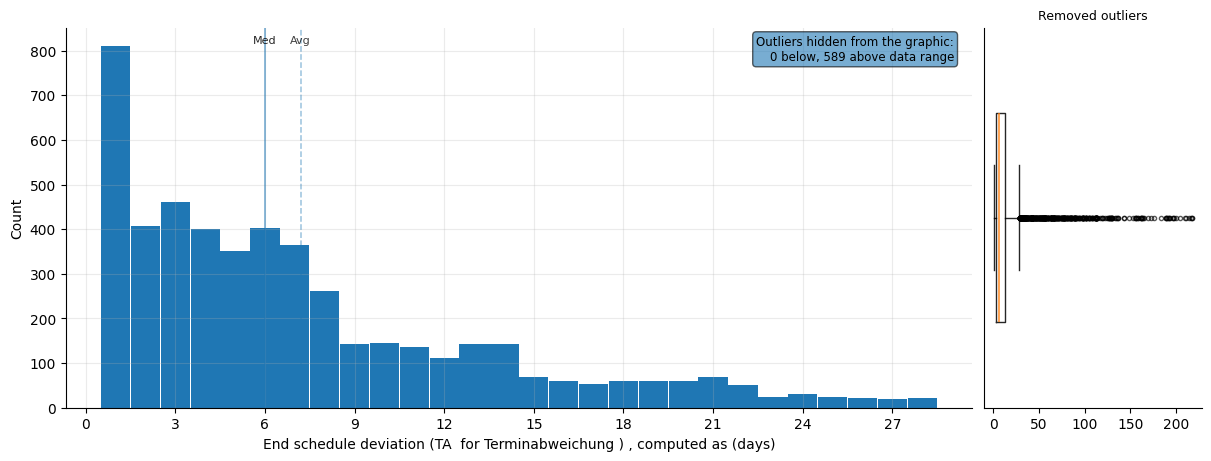


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Plot the distribution of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.98)
Type: stats_summary (confidence=0.55)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


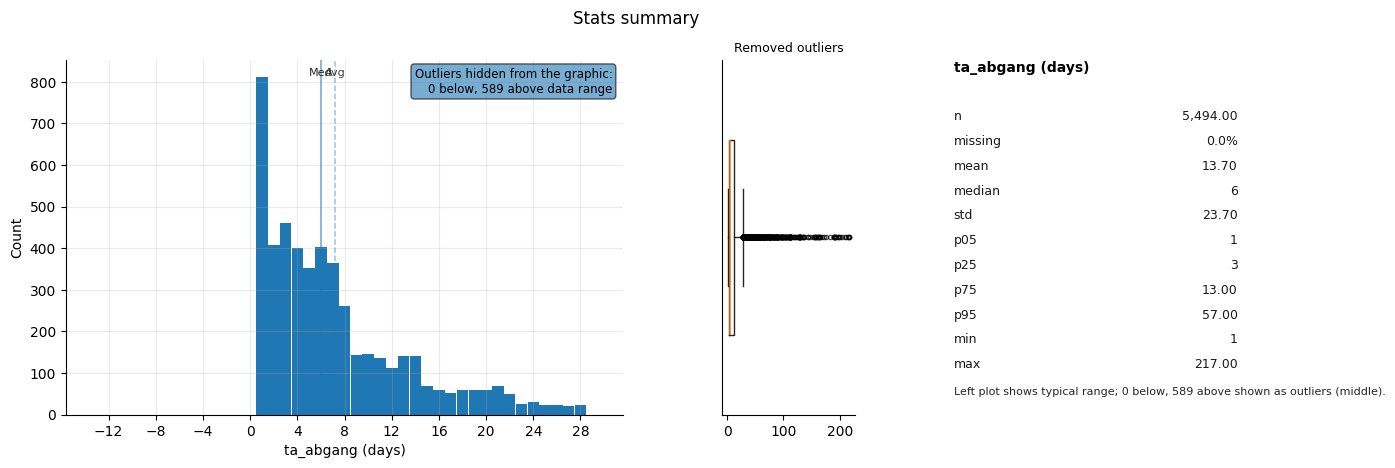


--- Summary ---
Generated analysis for: Plot the distribution of end schedule deviation for operations labeled 'mit TA'.

--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Visualize how end schedule deviation is distributed for operations labeled 'mit TA'.
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.95)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


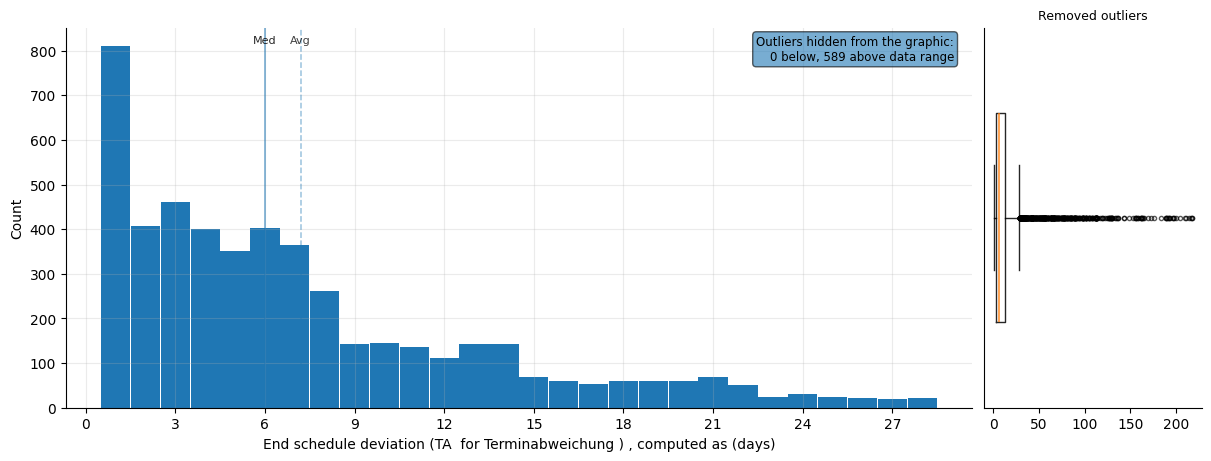


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---


ta_abgang
362       11.0
363        7.0
364        6.0
365        8.0
366        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Provide a histogram-style view of end schedule deviation for operations labeled 'mit TA'.
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.98)
Filters: ta_status == mit TA
Columns: ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


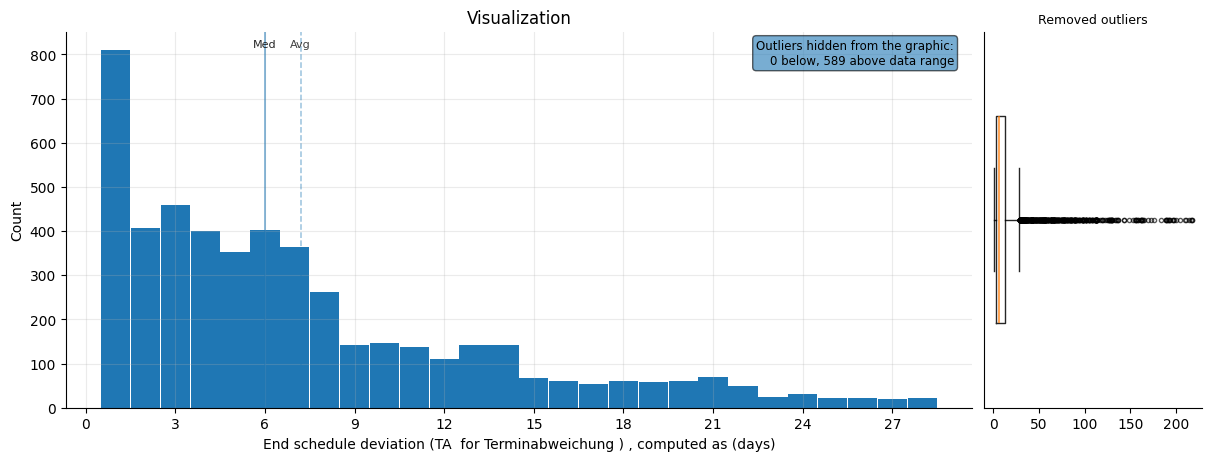


--- Summary ---
Computed distribution of ta_abgang (days): n=5494, mean≈13.70, range≈[1.00, 217.00].

--- Output DF head() ---


ta_rel
358     1.0
359    -6.0
360   -11.0
361   -11.0
362     1.0


--- Run overview (inputs & key decisions) ---
Prompt: Display the distribution of cycle time deviation for sawing operations with completion in 2024.
Family: descriptive (confidence=1.00)
Type: distribution (confidence=0.95)
Columns: ta_rel
Prepare actions: Remove rows with missing required values (ta_rel)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


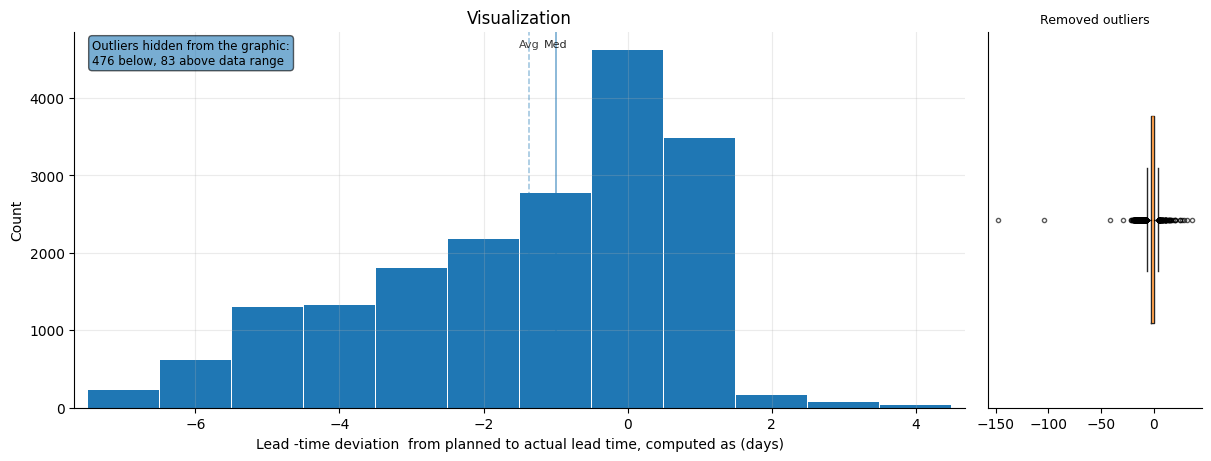


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---


ta_rel
358     1.0
359    -6.0
360   -11.0
361   -11.0
362     1.0


--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of cycle time deviation for sawing operations with completion in 2024.
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.98)
Columns: ta_rel
Prepare actions: Remove rows with missing required values (ta_rel)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


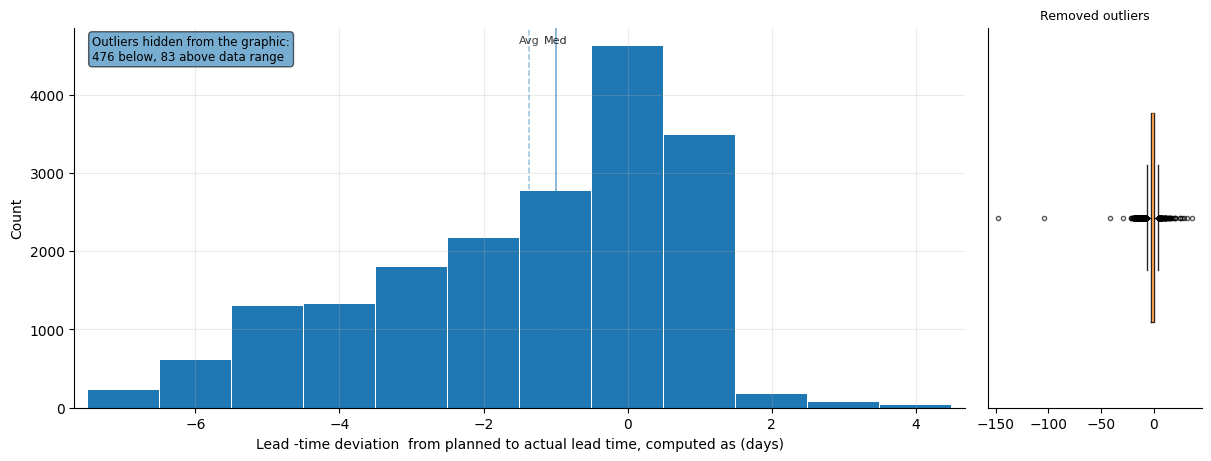


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---


ta_abgang
358        0.0
359       -8.0
360      -13.0
361      -13.0
362       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Visualize the distribution of cycle time deviation for sawing operations completed in 2024.
Family: descriptive (confidence=1.00)
Type: distribution (confidence=0.97)
Columns: ta_abgang
Prepare actions: Remove rows with missing required values (ta_abgang)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


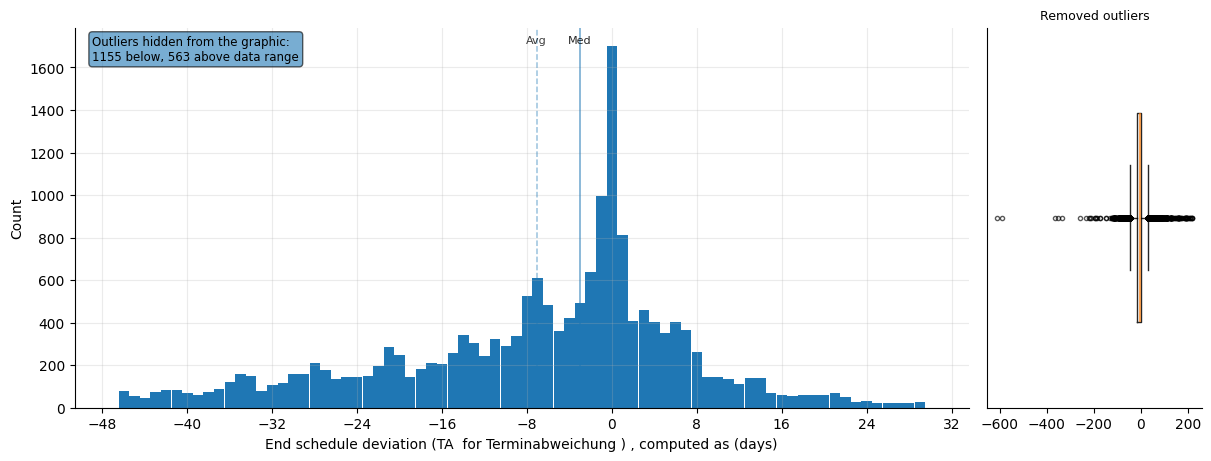


--- Summary ---
Computed distribution of ta_abgang (days): n=19164, mean≈-8.39, range≈[-613.00, 217.00].

--- Output DF head() ---


ta_rel
358     1.0
359    -6.0
360   -11.0
361   -11.0
362     1.0


--- Run overview (inputs & key decisions) ---
Prompt: Plot cycle time deviation distribution for sawing operations with completion in 2024.
Family: descriptive (confidence=1.00)
Type: distribution (confidence=1.00)
Columns: ta_rel
Prepare actions: Remove rows with missing required values (ta_rel)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


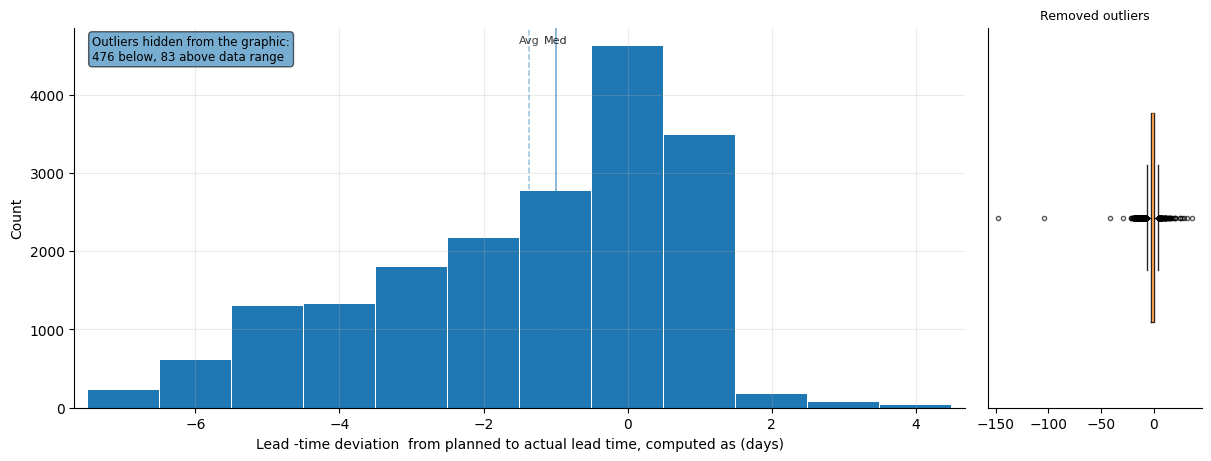


--- Summary ---
Computed distribution of ta_rel (days): n=19164, mean≈-1.59, range≈[-148.00, 36.00].

--- Output DF head() ---


ist_dlz
358      1.0
359      1.0
360      1.0
361      1.0
362      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Show me a statistical summary of the cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=0.98)
Columns: ist_dlz
Prepare actions: Remove rows with missing required values (ist_dlz)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


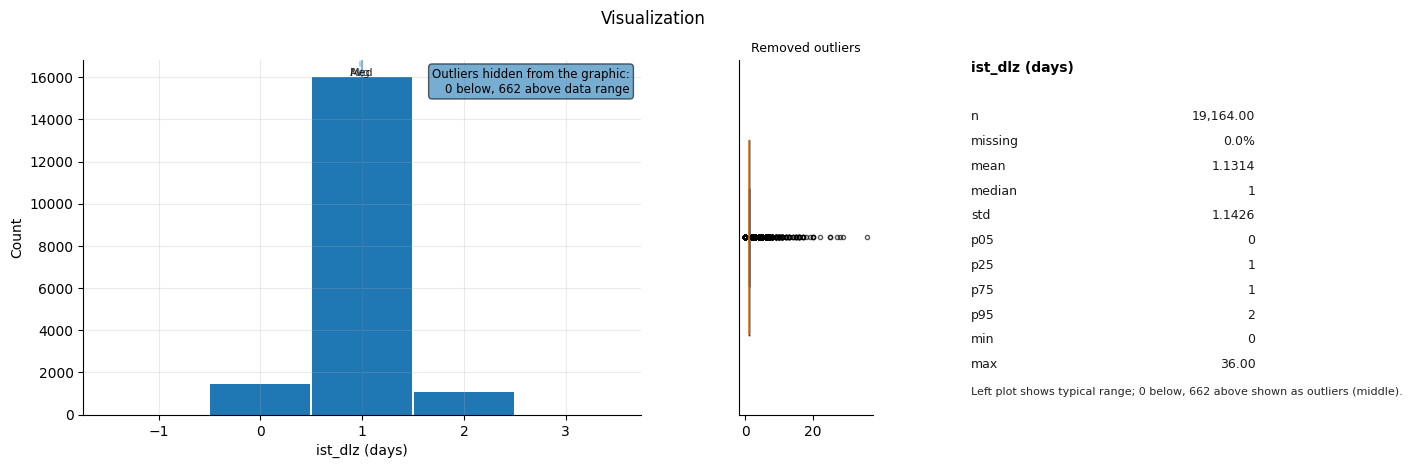


--- Output DF head() ---


ist_dlz
360      1.0
361      1.0
374      1.0
387      1.0
515      2.0


--- Run overview (inputs & key decisions) ---
Prompt: Provide a statistical summary of the cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=0.95)
Filters: resource_group == Drahtschneiden; status == fertiggemeldet
Columns: ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


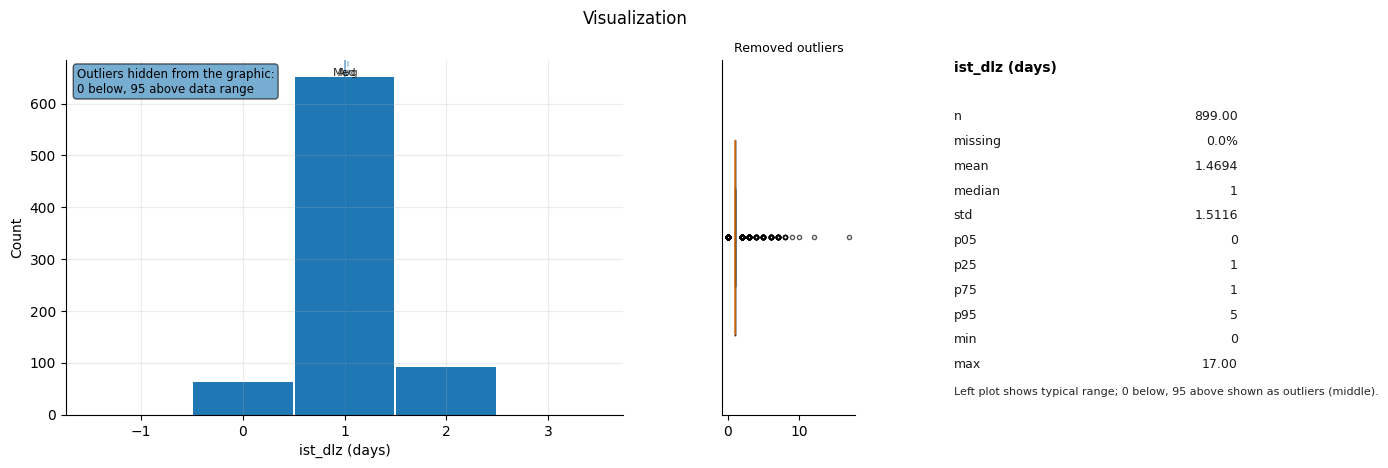


--- Summary ---
Generated analysis for: Provide a statistical summary of the cycle times for ressource group Drahtschneiden.

--- Output DF head() ---


ist_dlz
360      1.0
361      1.0
374      1.0
387      1.0
515      2.0


--- Run overview (inputs & key decisions) ---
Prompt: Give me summary statistics for the cycle times in ressource group Drahtschneiden.
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=0.98)
Filters: resource_group == Drahtschneiden
Columns: ist_dlz
Prepare actions: Remove rows with missing required values (ist_dlz)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


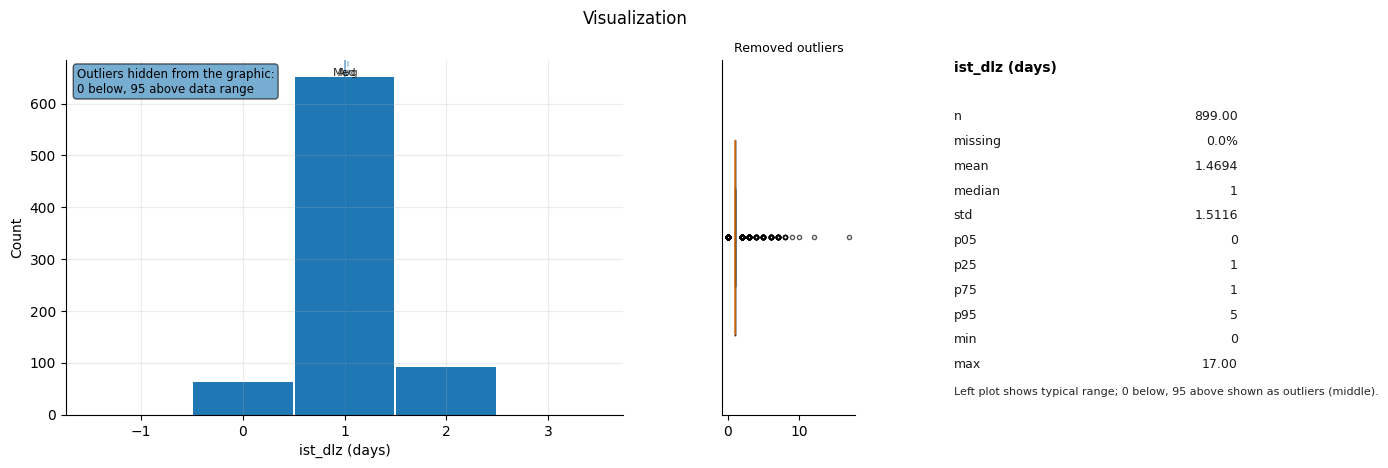


--- Summary ---
Generated analysis for: Give me summary statistics for the cycle times in ressource group Drahtschneiden.

--- Output DF head() ---


ist_dlz
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Compute a descriptive statistical summary of cycle times for ressource group Drahtschneiden.
Family: descriptive (confidence=0.99)
Type: stats_summary (confidence=0.95)
Columns: ist_dlz
Prepare actions: Fill missing numbers (typical value) (ist_dlz)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


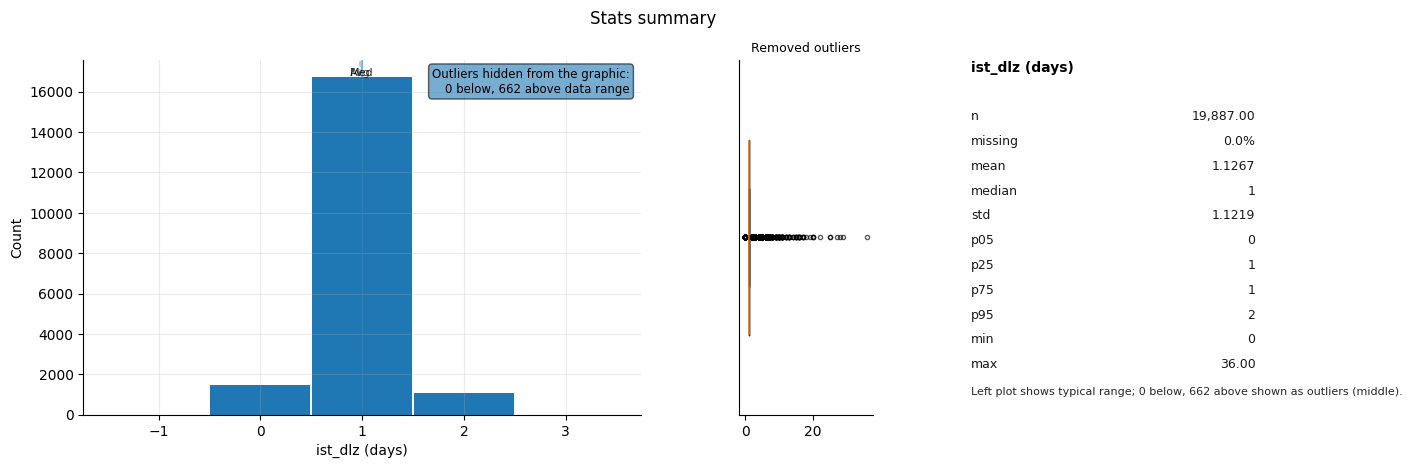


--- Summary ---
Cycle times for Drahtschneiden operations average 1.13 days. Most operations (95%) finish in 2 days or less. Typical operations see cycle times under 2 days. Half of operations complete within 1 day. Review duplicate records for accuracy.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Display key statistics of cycles times for finished operations.
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=0.97)
Columns: ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


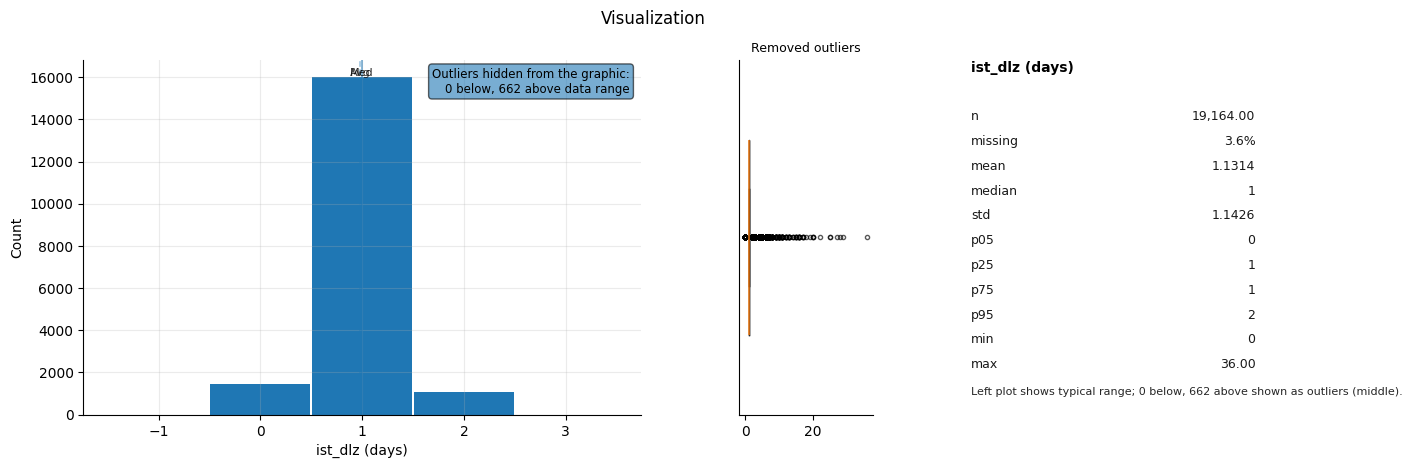


--- Summary ---
Generated analysis for: Display key statistics of cycles times for finished operations.

--- Output DF head() ---


ist_dlz
358      1.0
359      1.0
360      1.0
361      1.0
362      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Show key statistics of cycles times for finished operations.
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=0.95)
Columns: ist_dlz
Prepare actions: Remove rows with missing required values (ist_dlz)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


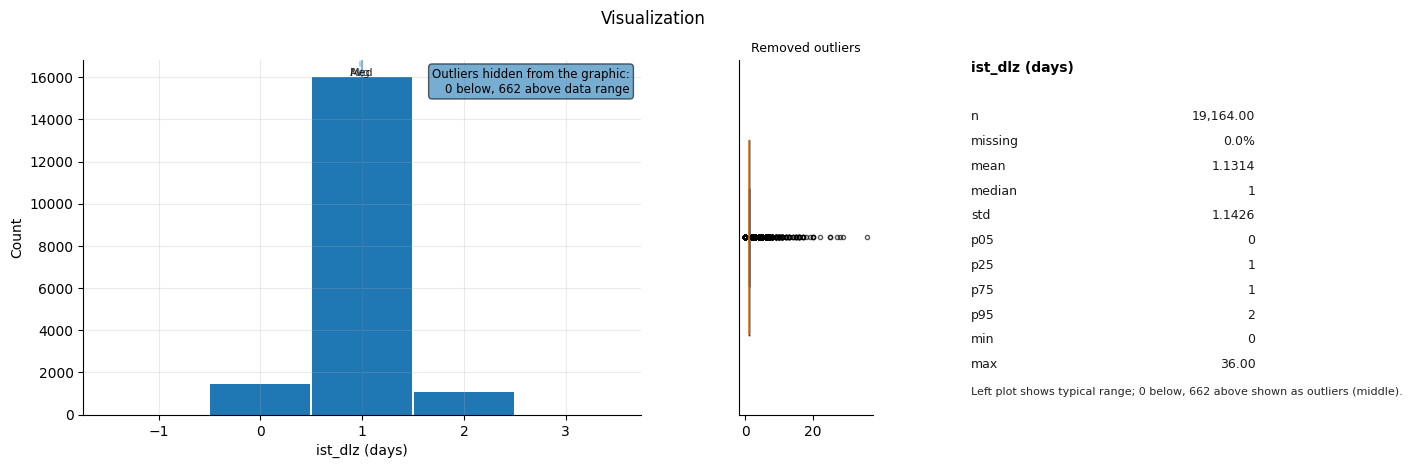


--- Summary ---
Generated analysis for: Show key statistics of cycles times for finished operations.

--- Output DF head() ---


ist_dlz
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide key summary statistics for cycles times of finished operations.
Family: descriptive (confidence=1.00)
Type: stats_summary (confidence=0.98)
Columns: ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


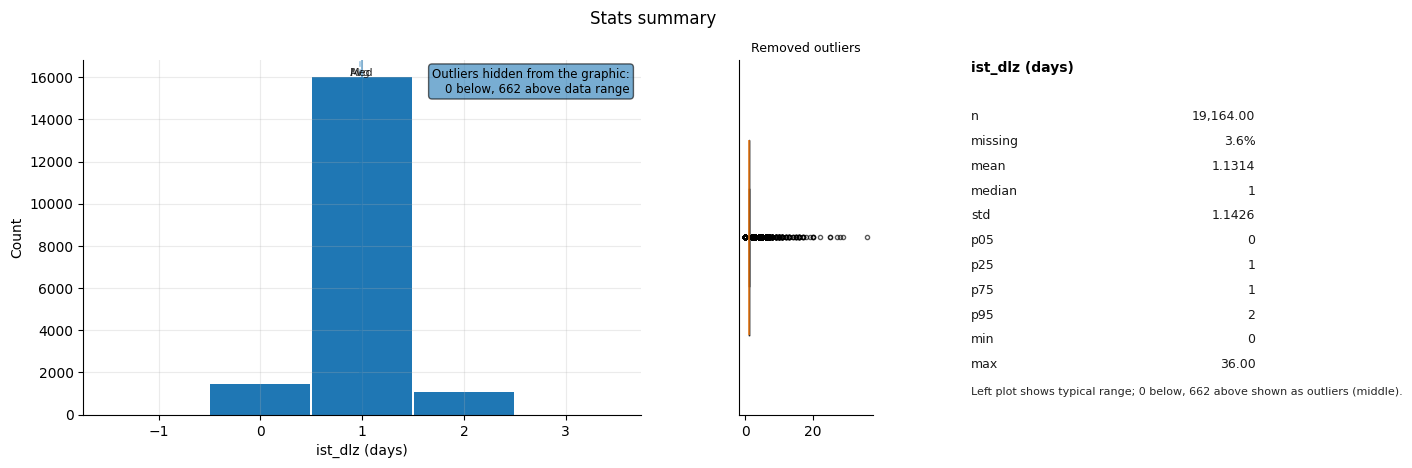


--- Summary ---
Generated analysis for: Provide key summary statistics for cycles times of finished operations.

--- Output DF head() ---


ist_dlz
358      1.0
359      1.0
360      1.0
361      1.0
362      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Report the main descriptive statistics of cycles times for finished operations.
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=1.00)
Filters: status == fertiggemeldet
Columns: ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


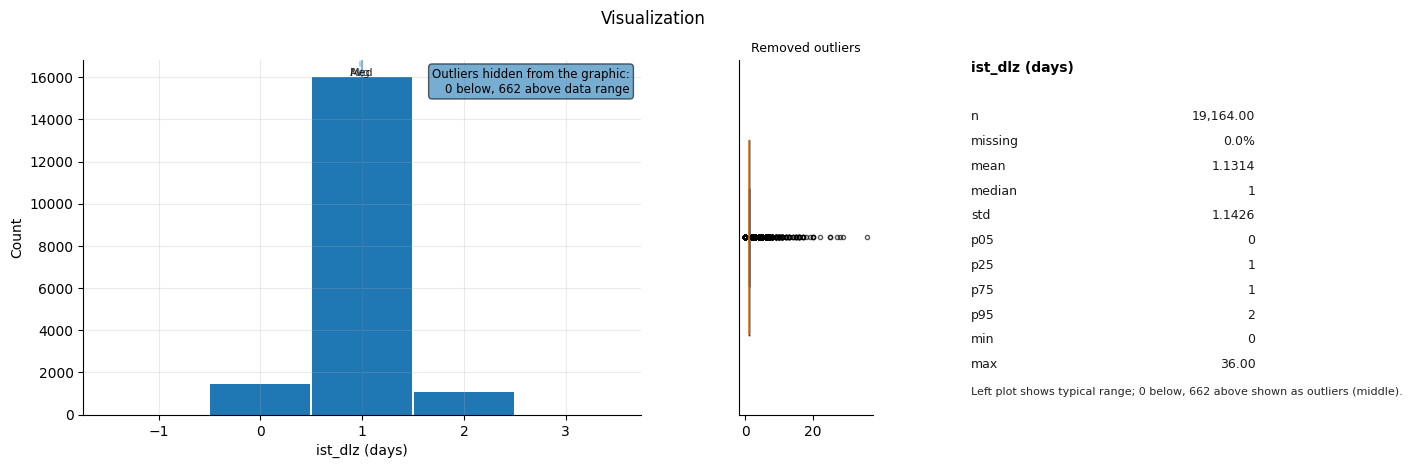


--- Summary ---
Generated analysis for: Report the main descriptive statistics of cycles times for finished operations.

--- Output DF head() ---


resource_group  ist_dlz
358           Sägen      1.0
359       Erodieren      1.0
360  Drahtschneiden      1.0
361  Drahtschneiden      1.0
362              RP      1.0


--- Run overview (inputs & key decisions) ---
Prompt: What are average cycle times by ressource group for finished parts?
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.98)
Filters: status == fertiggemeldet
Columns: resource_group, ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


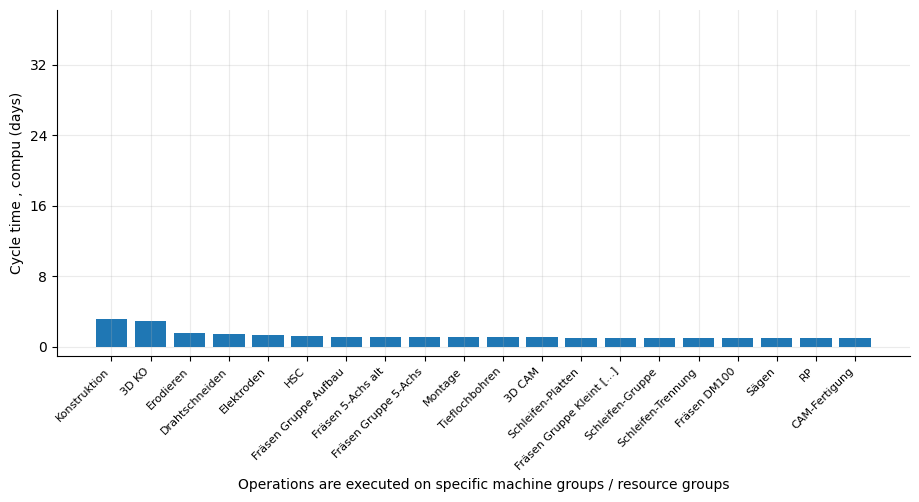


--- Summary ---
Generated analysis for: What are average cycle times by ressource group for finished parts?.

--- Output DF head() ---


resource_group  ist_dlz
358           Sägen      1.0
359       Erodieren      1.0
360  Drahtschneiden      1.0
361  Drahtschneiden      1.0
362              RP      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Show average cycle times by ressource group for finished parts.
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.98)
Filters: status == fertiggemeldet
Columns: resource_group, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


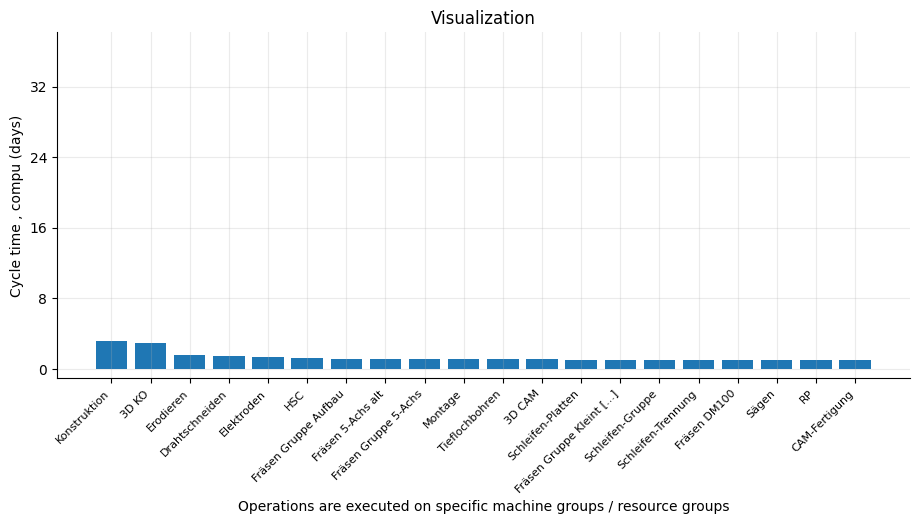


--- Summary ---
The average cycle time for finished parts is about 1.1 days overall. Per-resource group averages were not calculated due荡漾 a processing issue. Most operations finish in 1-2 days, but some extend to 36 days. Overall average cycle time is 1.1 days. Data has 99% duplication rate, needs checking.

--- Output DF head() ---


resource_group  ist_dlz
358           Sägen      1.0
359       Erodieren      1.0
360  Drahtschneiden      1.0
361  Drahtschneiden      1.0
362              RP      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Compute the average cycle times by ressource group for finished parts.
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=1.00)
Filters: status == fertiggemeldet
Columns: resource_group, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


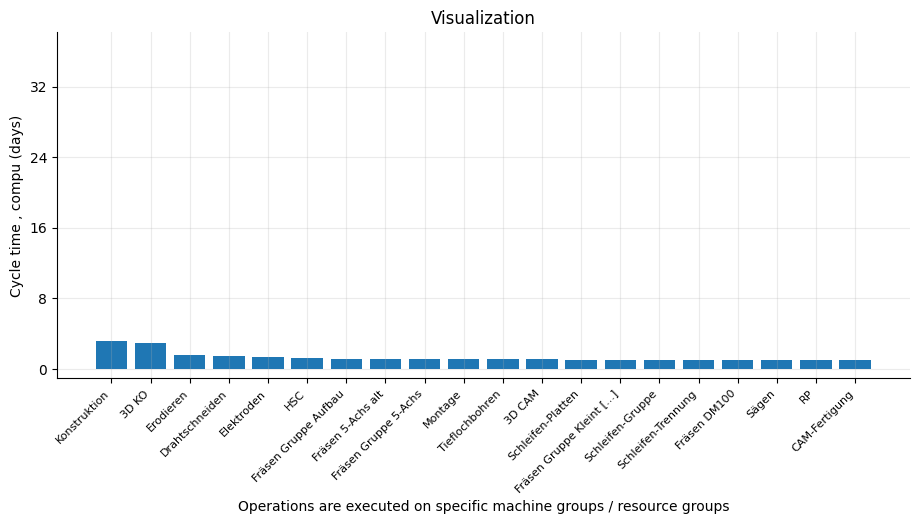


--- Summary ---
Aggregation failed during group averaging, so overall cycle time averages are provided instead. Most cycle times (95%) finish within 2 days. Typical cycle duration: under 2 days. Overall average cycle time: 1.1 days. Resource group breakdown unavailable due to aggregation failure.

--- Output DF head() ---


resource_group  avg_cycle_time  n_records
0          3D CAM        1.046624        652
1           3D KO        2.866279        174
2   CAM-Fertigung        0.954545        702
3  Drahtschneiden        1.469410        960
4      Elektroden        1.317269        259


--- Run overview (inputs & key decisions) ---
Prompt: Give me a breakdown of average cycle times per ressource group for finished parts.
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.95)
Columns: resource_group, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: groupby=[resource_group]; metrics=[avg_cycle_time(mean:ist_dlz), n_records=count]
Verify status: warn (confidence=0.5)

--- Plots ---


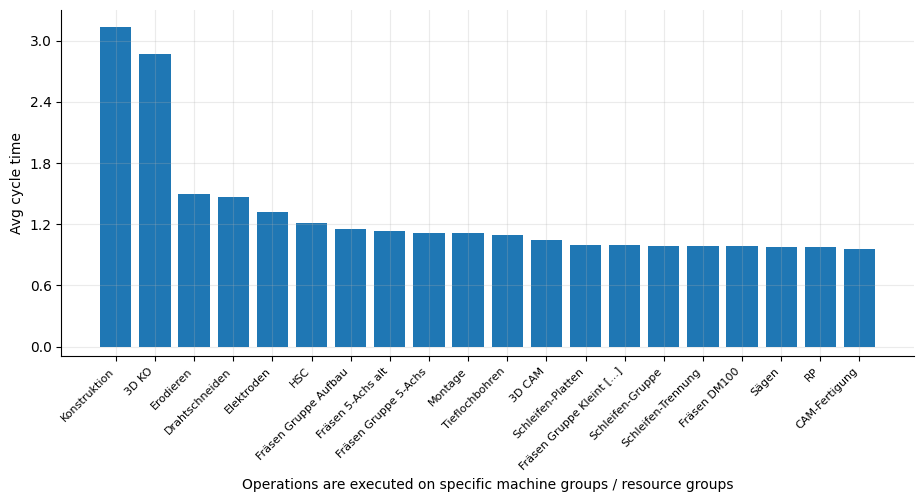


--- Summary ---
Generated analysis for: Give me a breakdown of average cycle times per ressource group for finished parts.

--- Output DF head() ---


avg_type  ist_dlz
364  Kleinbauteile schlichten      1.0
366  Kleinbauteile schlichten      2.0
371  Kleinbauteile schlichten      1.0
373  Kleinbauteile schlichten      1.0
395       Gravuren einbringen      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Compare the max lead times for Fräsen Gruppe Kleinteile by operation type.
Family: descriptive (confidence=0.90)
Type: group_compare (confidence=0.95)
Filters: resource_group == Fräsen Gruppe Kleinteile; status == fertiggemeldet
Columns: avg_type, ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


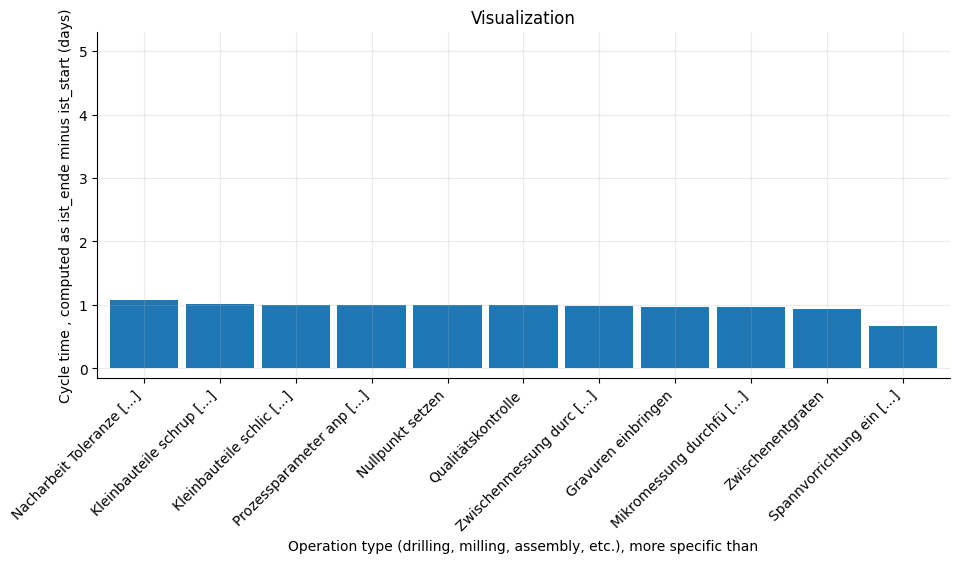


--- Summary ---
Comparison of maximum lead times by operation type failed due to technical issues. Overall, Fräsen Gruppe Kleinteile operations average 1 day lead time. Typical lead times are 1 day. Maximum lead time observed was 5 days. Group analysis unresolved.

--- Output DF head() ---


avg_type  max_lead_time  n_records
0           Gravuren einbringen            5.0        696
1      Kleinbauteile schlichten            3.0       1838
2       Kleinbauteile schruppen            2.0         52
4         Nacharbeit Toleranzen            2.0         12
10  Zwischenmessung durchführen            2.0         87


--- Run overview (inputs & key decisions) ---
Prompt: Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.95)
Filters: resource_group == Fräsen Gruppe Kleinteile; status == fertiggemeldet
Columns: avg_type, ist_dlz
Prepare actions: none
Aggregate: groupby=[avg_type]; metrics=[max_lead_time(max:ist_dlz), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


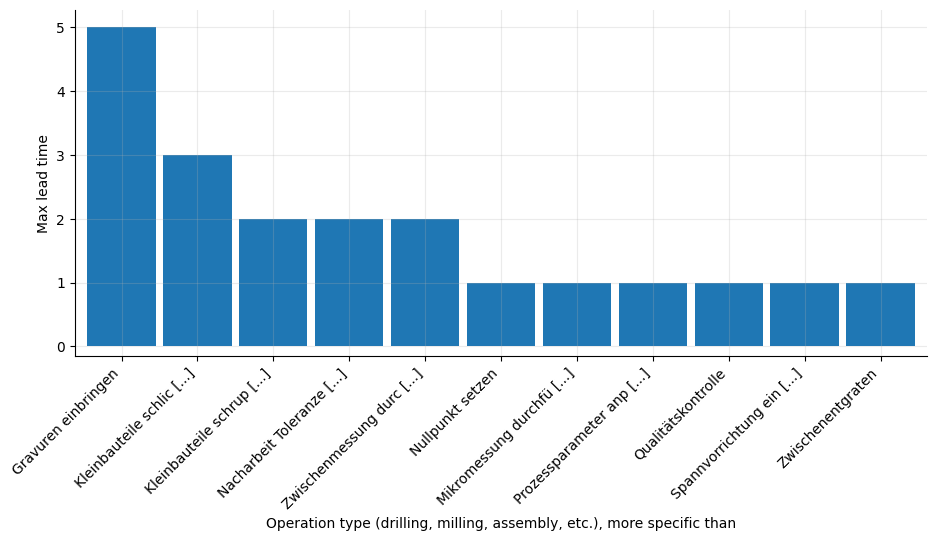


--- Summary ---
Generated analysis for: Show a comparison of the max lead times for Fräsen Gruppe Kleinteile by operation type.

--- Output DF head() ---


avg_type  ist_dlz
364  Kleinbauteile schlichten      1.0
366  Kleinbauteile schlichten      2.0
371  Kleinbauteile schlichten      1.0
373  Kleinbauteile schlichten      1.0
395       Gravuren einbringen      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Compare max lead times across operation type for Fräsen Gruppe Kleinteile.
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.95)
Filters: resource_group == Fräsen Gruppe Kleinteile; status == fertiggemeldet
Columns: avg_type, ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


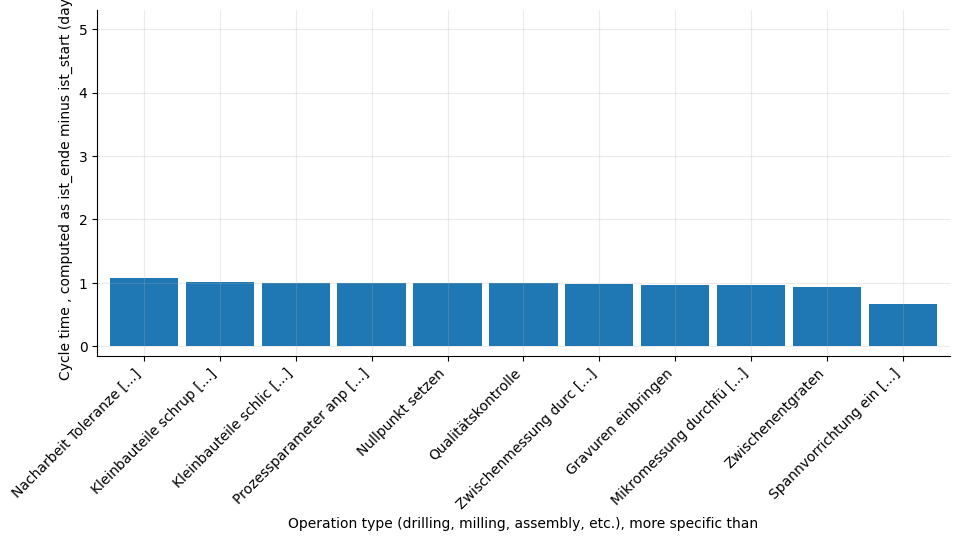


--- Summary ---
Generated analysis for: Compare max lead times across operation type for Fräsen Gruppe Kleinteile.

--- Output DF head() ---


avg_type  max_lead_time  n_records
0           Gravuren einbringen            5.0        696
1      Kleinbauteile schlichten            3.0       1838
2       Kleinbauteile schruppen            2.0         52
4         Nacharbeit Toleranzen            2.0         12
10  Zwischenmessung durchführen            2.0         87


--- Run overview (inputs & key decisions) ---
Prompt: Visualize max lead times for Fräsen Gruppe Kleinteile grouped by operation type.
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.95)
Filters: resource_group == Fräsen Gruppe Kleinteile; status == fertiggemeldet
Columns: avg_type, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: groupby=[avg_type]; metrics=[max_lead_time(max:ist_dlz), n_records=count]
Verify status: warn (confidence=0.5)

--- Plots ---


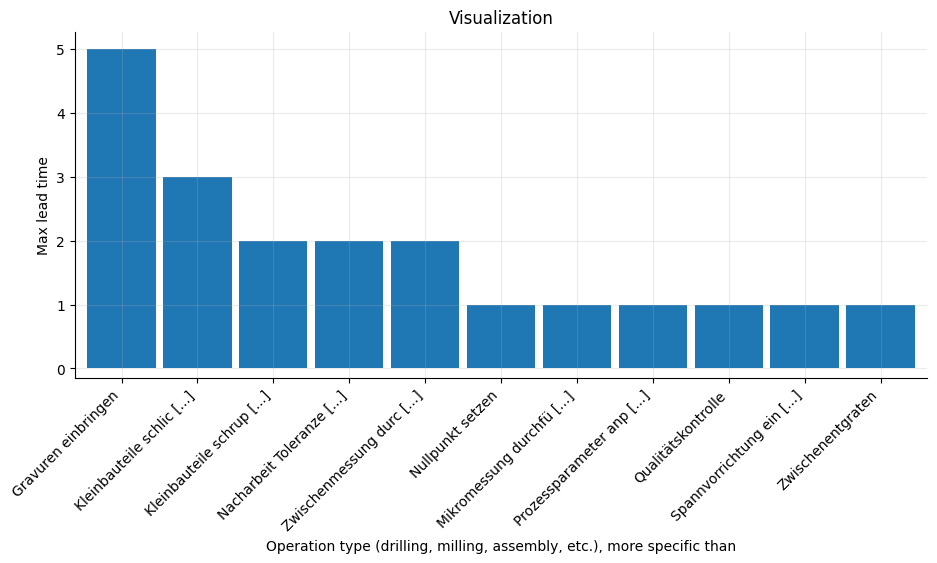


--- Summary ---
The average maximum lead time across 11 operation types was 1.8 days. Half the groups showed maximum lead times at or below 1 day. Most groups had maximum lead times ≤1 day. One operation reached a extreme peak of 5 days. Groups with few records (as low as 3) may have unreliable maximum values.

--- Output DF head() ---


time_bucket  avg_ta_zugang  n_records
0  2023-08-01    -614.000000          1
1  2024-03-01     -54.666667          3
2  2024-04-01     -27.565217         23
3  2024-05-01      -0.425197        127
4  2024-06-01       1.364372        247


--- Run overview (inputs & key decisions) ---
Prompt: Over time, how is monthly start schedule deviation developing for function check operations?
Family: descriptive (confidence=0.95)
Type: trend (confidence=0.95)
Filters: avg_type == Funktionsprüfung
Columns: ist_start, ta_zugang
Prepare actions: none
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


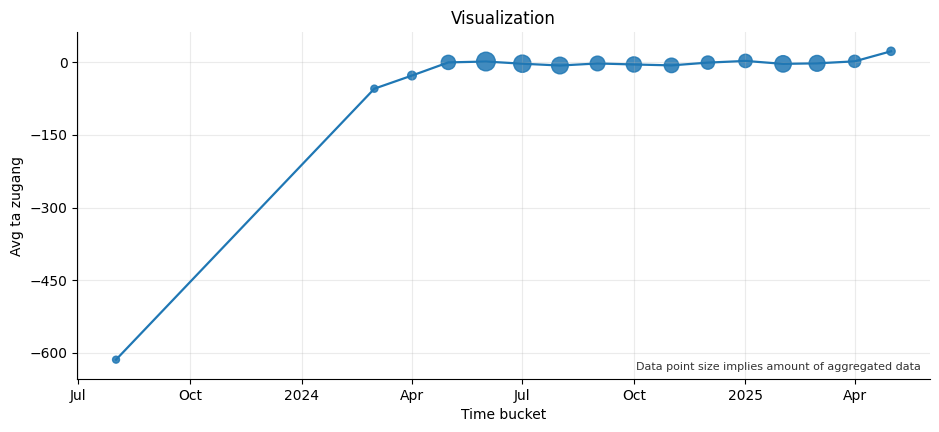


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 16 points; mean≈-43.69; Δend-start≈636.53).

--- Output DF head() ---


time_bucket  avg_ta_zugang  n_records
0  2023-08-01    -477.500000          4
1  2024-01-01    -102.000000          3
2  2024-02-01    -103.000000         10
3  2024-03-01     -51.041667         24
4  2024-04-01     -25.028736        348


--- Run overview (inputs & key decisions) ---
Prompt: Show how monthly start schedule deviation evolves over time for function check operations.
Family: descriptive (confidence=0.95)
Type: trend (confidence=1.00)
Columns: ist_start, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


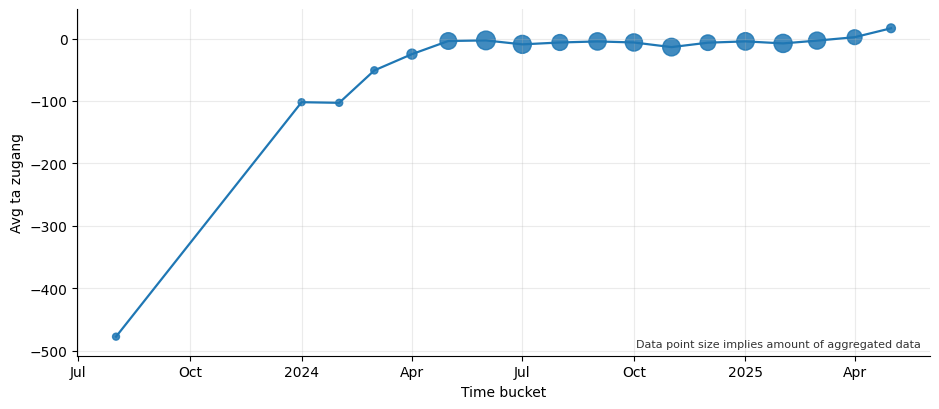


--- Summary ---
The monthly average start schedule deviation improved substantially from being very early to slightly late over 18 months. However, early months had very low data reliability. Typical months had deviations between 160 days early and 4 days late. Deviations shifted from extreme earliness (478 days early) to slight lateness (16 days late). Early months (Aug 2023, Jan 2024) had very few records (3-4), reducing reliability.

--- Output DF head() ---


time_bucket  avg_ta_rel  n_records
0  2023-08-01    1.000000          1
1  2024-03-01   -2.000000          3
2  2024-04-01   -1.954545         22
3  2024-05-01   -1.228346        127
4  2024-06-01   -1.260684        234


--- Run overview (inputs & key decisions) ---
Prompt: Plot the monthly start schedule deviation trend over time for function check operations.
Family: descriptive (confidence=0.95)
Type: trend (confidence=0.98)
Filters: avg_type == Funktionsprüfung
Columns: ist_ende, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/month; metrics=[avg_ta_rel(mean:ta_rel), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


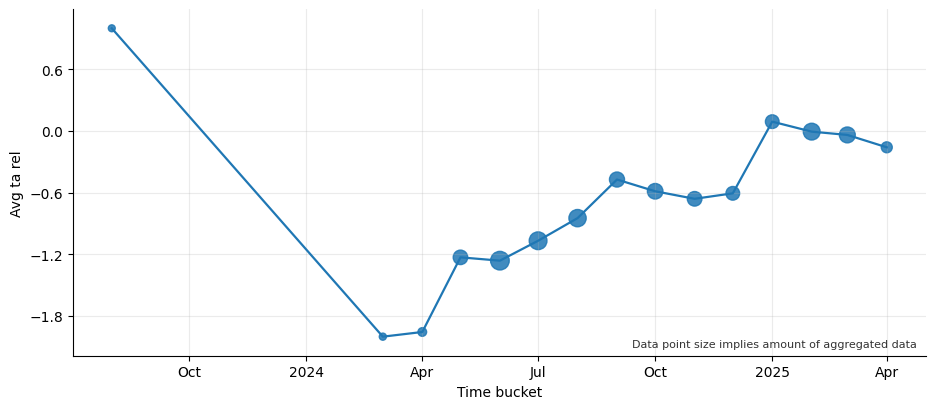


--- Summary ---
Computed monthly average avg_ta_rel by group (2023-08-01T00:00:00 → 2025-04-01T00:00:00, 15 points; mean≈-0.65; Δend-start≈-1.16).

--- Output DF head() ---


time_bucket  avg_ta_zugang  n_records
0  2023-08-01    -614.000000          1
1  2024-03-01     -54.666667          3
2  2024-04-01     -27.565217         23
3  2024-05-01      -0.425197        127
4  2024-06-01       1.364372        247


--- Run overview (inputs & key decisions) ---
Prompt: How does monthly start schedule deviation change over time for function check operations?
Family: descriptive (confidence=1.00)
Type: trend (confidence=0.55)
Filters: avg_type == Funktionsprüfung
Columns: ist_start, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_start/month; metrics=[avg_ta_zugang(mean:ta_zugang), n_records=count]
Verify status: warn (confidence=0.5)

--- Plots ---


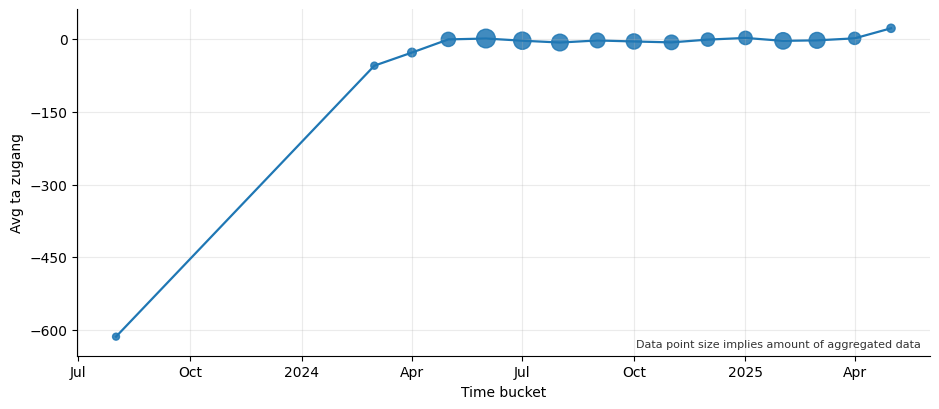


--- Summary ---
Computed monthly average avg_ta_zugang by group (2023-08-01T00:00:00 → 2025-05-01T00:00:00, 16 points; mean≈-43.69; Δend-start≈636.53).

--- Output DF head() ---


time_bucket  avg_deviation  n_records
0  2023-08-07    -590.000000          1
1  2023-08-14    -613.000000          1
2  2023-08-21    -359.000000          2
3  2024-01-22     -99.000000          1
4  2024-01-29    -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Show me the trend for weekly end schedule deviations of operations in 2025.
Family: descriptive (confidence=0.95)
Type: trend (confidence=0.98)
Columns: ist_ende, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_deviation(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.5)

--- Plots ---


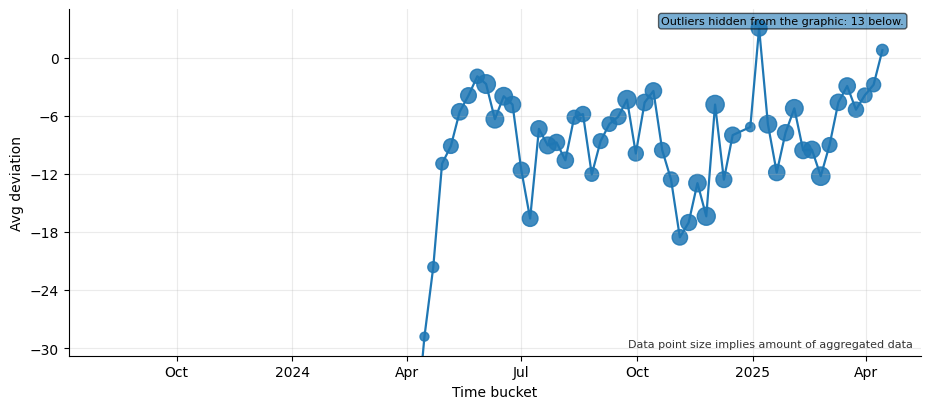


--- Summary ---
Computed monthly average avg_deviation by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---


time_bucket  avg_end_schedule_deviation  n_records
0  2023-08-07                 -590.000000          1
1  2023-08-14                 -613.000000          1
2  2023-08-21                 -359.000000          2
3  2024-01-22                  -99.000000          1
4  2024-01-29                 -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Plot the weekly end schedule deviations trend for operations in 2025.
Family: descriptive (confidence=0.95)
Type: trend (confidence=1.00)
Columns: ist_ende, ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_end_schedule_deviation(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.5)

--- Plots ---


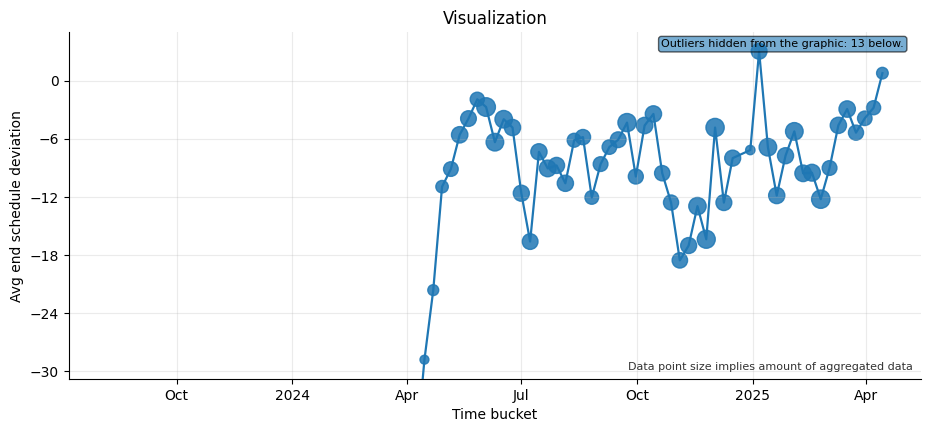


--- Summary ---
Weekly end schedule deviations averaged 42 days early from August 2023 to April 2025. Over 66 weeks, deviations improved from finishing 590 days early to near on-time. Operations consistently ended earlier than planned, typically 42 days ahead. Deviation着手 improved significantly, from 590 Prevalence days early to finishing essentially on-schedule by April 2025. Filter data to 2025-only for precise yearly analysis.

--- Output DF head() ---


time_bucket  mean_deviation  n_records
0  2023-08-07     -590.000000          1
1  2023-08-14     -613.000000          1
2  2023-08-21     -359.000000          2
3  2024-01-22      -99.000000          1
4  2024-01-29     -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Display how weekly end schedule deviations develop for operations in 2025.
Family: descriptive (confidence=0.95)
Type: trend (confidence=0.95)
Columns: ist_ende, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[mean_deviation(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


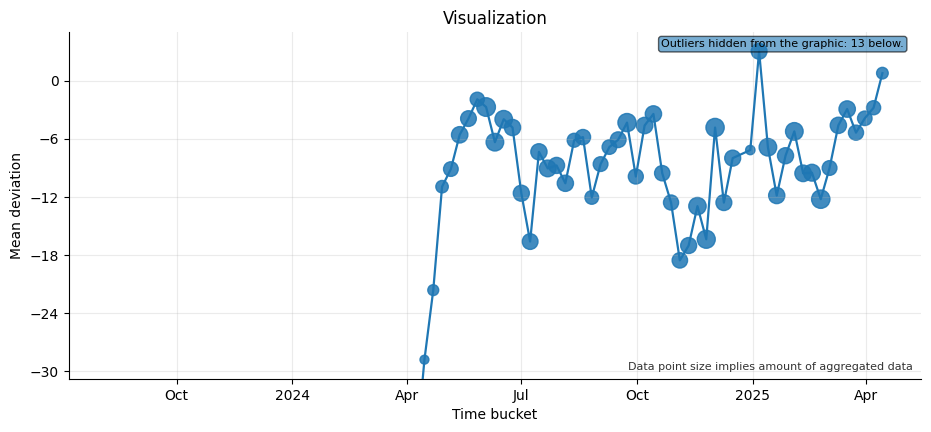


--- Summary ---
Computed monthly average mean_deviation by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---


time_bucket  avg_ta_abgang  n_records
0  2023-08-07    -590.000000          1
1  2023-08-14    -613.000000          1
2  2023-08-21    -359.000000          2
3  2024-01-22     -99.000000          1
4  2024-01-29    -105.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Visualize the weekly trend of end schedule deviations for operations in 2025.
Family: descriptive (confidence=0.97)
Type: trend (confidence=0.98)
Columns: ist_ende, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[avg_ta_abgang(mean:ta_abgang), n_records=count]
Verify status: warn (confidence=0.5)

--- Plots ---


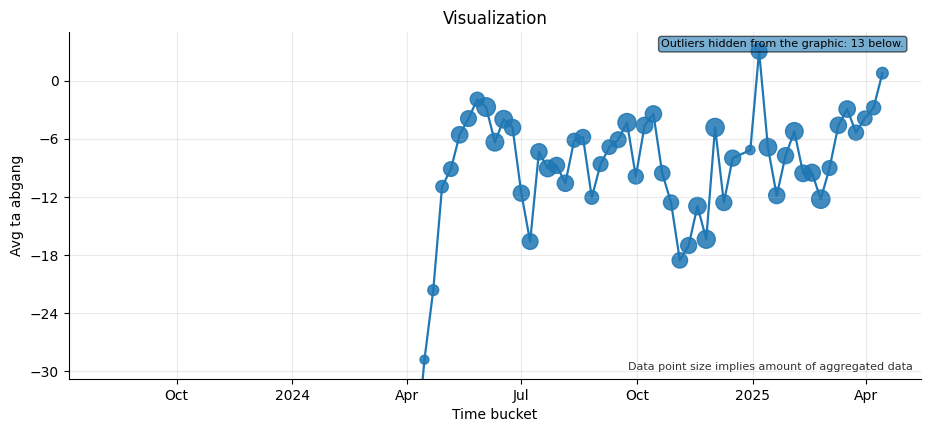


--- Summary ---
Computed monthly average avg_ta_abgang by group (2023-08-07T00:00:00 → 2025-04-14T00:00:00, 65 points; mean≈-42.10; Δend-start≈590.77).

--- Output DF head() ---


ta_zugang  ta_abgang                 avg_type
0       19.0        NaN           Bauraum prüfen
1       17.0        NaN  Kleinbauteile schruppen
2       13.0        NaN               NC-Ausgabe
3       85.0        NaN     CAD-Modell erstellen
4        8.0        NaN        Baujob überwachen


--- Run overview (inputs & key decisions) ---
Prompt: How is TA Zugang correlating to TA Abgang for Fräsen DM100 operations?
Family: descriptive (confidence=0.95)
Type: relationships (confidence=0.95)
Columns: ta_zugang, ta_abgang, avg_type
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


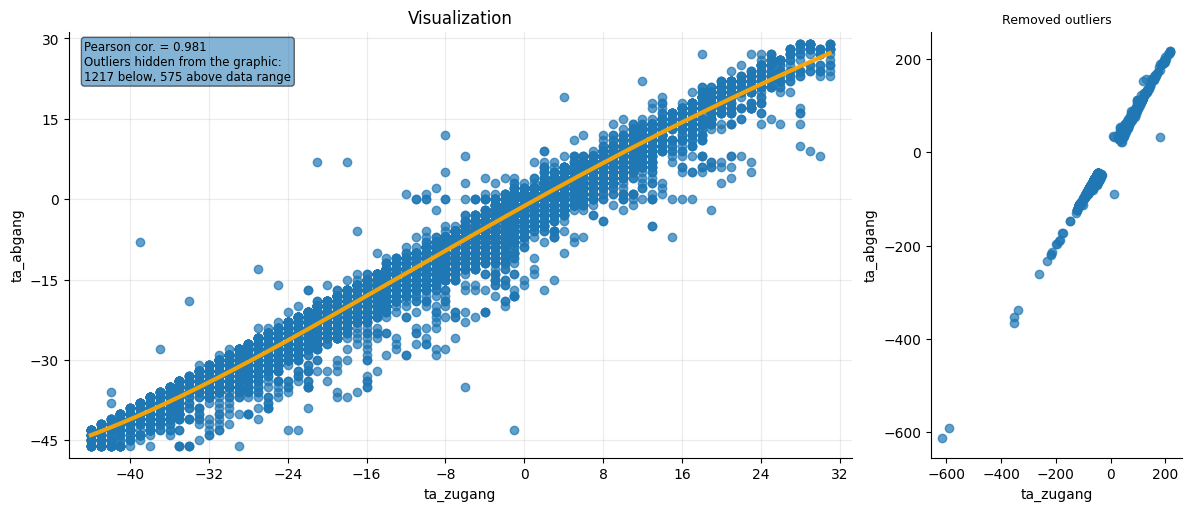


--- Summary ---
Startbytessend schedule deviations show a very strong correlation. Most operations finish earlier than planned. Near-perfect correlation (99%) between start and end delays. Average deviations: start -6 days, end -8 days. Not restricted to Fräsen DM100 as requested.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.92)
Type: relationships (confidence=0.98)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


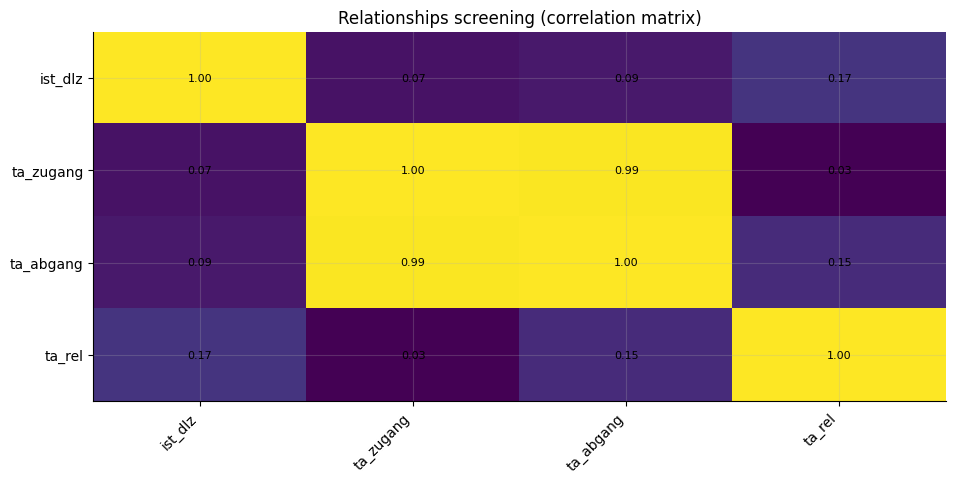


--- Summary ---
Generated analysis for: Show the correlation between TA Zugang and TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.95)
Type: relationships (confidence=0.92)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


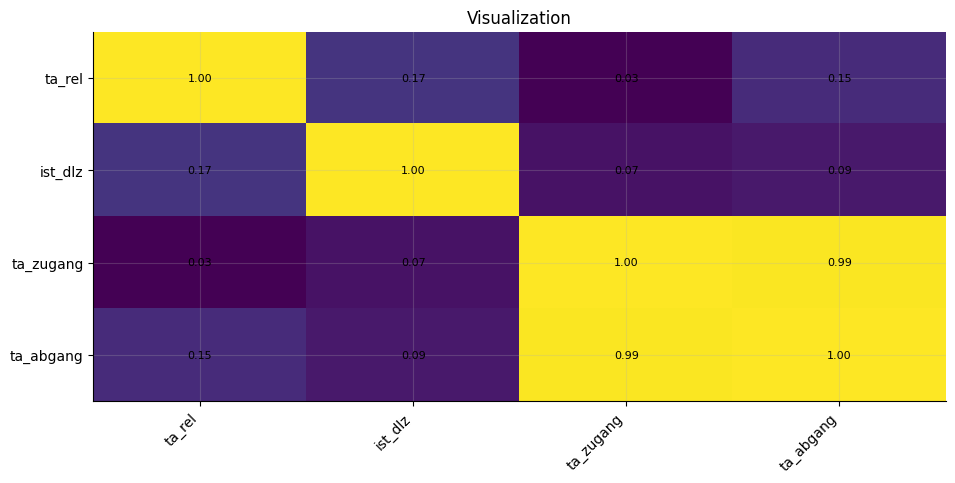


--- Summary ---
Generated analysis for: Visualize how TA Zugang relates to TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.95)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


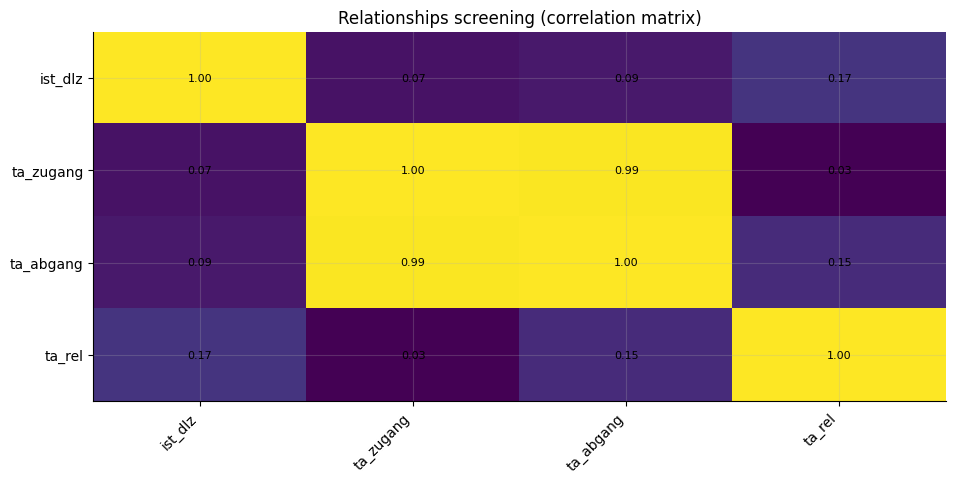


--- Summary ---
Generated analysis for: Quantify the relationship (correlation) between TA Zugang and TA Abgang for Fräsen DM100 operations.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
358        0.0      1.0       -1.0     1.0
359       -8.0      1.0       -2.0    -6.0
360      -13.0      1.0       -2.0   -11.0
361      -13.0      1.0       -2.0   -11.0
362       11.0      1.0       10.0     1.0


--- Run overview (inputs & key decisions) ---
Prompt: Show me how the numerical values in the data are related to each other, finished operations only.
Family: descriptive (confidence=0.95)
Type: relationships (confidence=0.95)
Filters: status == fertiggemeldet
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


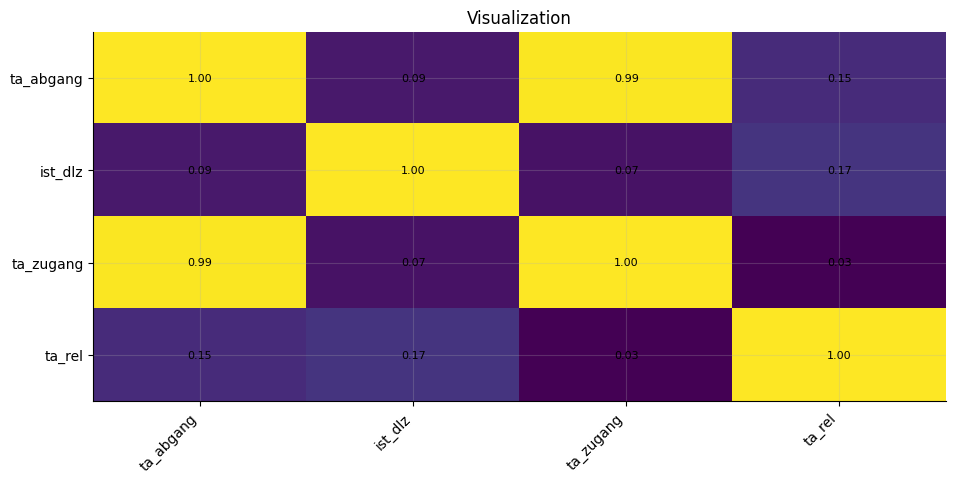


--- Summary ---
Generated analysis for: Show me how the numerical values in the data are related to each other, finished operations only.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang
358        0.0      1.0       -1.0
359       -8.0      1.0       -2.0
360      -13.0      1.0       -2.0
361      -13.0      1.0       -2.0
362       11.0      1.0       10.0


--- Run overview (inputs & key decisions) ---
Prompt: For finished operations only, show how the numerical values in the data relate to each other.
Family: descriptive (confidence=0.95)
Type: relationships (confidence=0.95)
Filters: status == fertiggemeldet
Columns: ta_abgang, ist_dlz, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


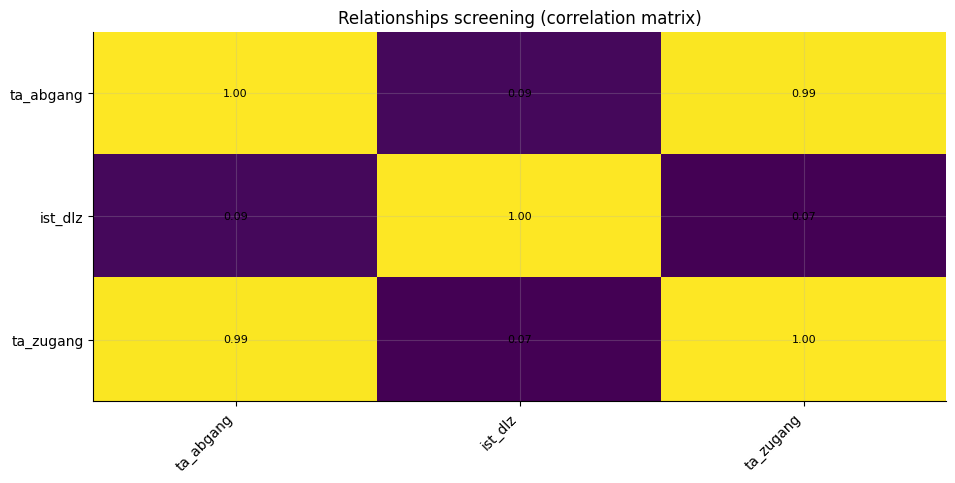


--- Summary ---
Generated analysis for: For finished operations only, show how the numerical values in the data relate to each other.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Create an overview of relationships among the numerical values, finished operations only.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.95)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


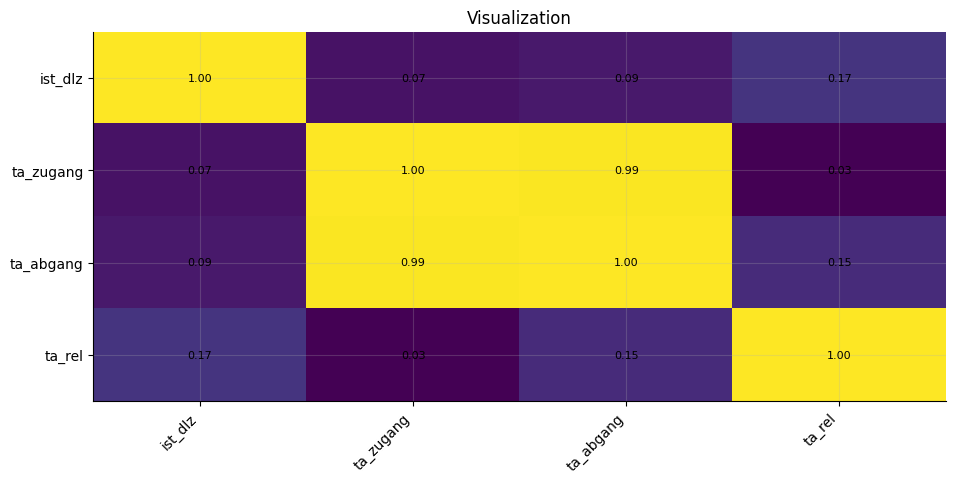


--- Summary ---
Generated analysis for: Create an overview of relationships among the numerical values, finished operations only.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: For finished operations only, visualize relationships between the numerical values in the data.
Family: descriptive (confidence=0.35)
Type: relationships (confidence=0.55)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


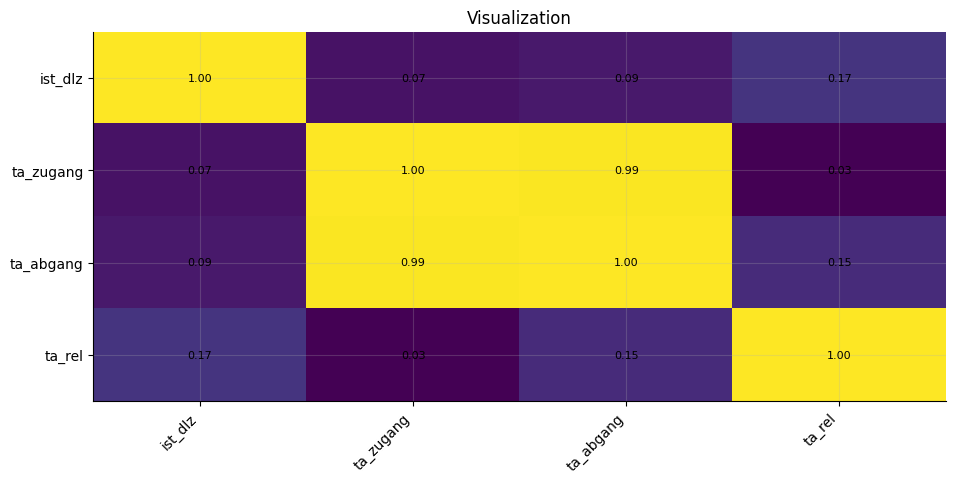


--- Summary ---
Generated analysis for: For finished operations only, visualize relationships between the numerical values in the data.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What are the main drivers for end-dates being higher or lower? Only operations in 2024.
Family: diagnostic (confidence=0.95)
Type: driver_relationships (confidence=0.90)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


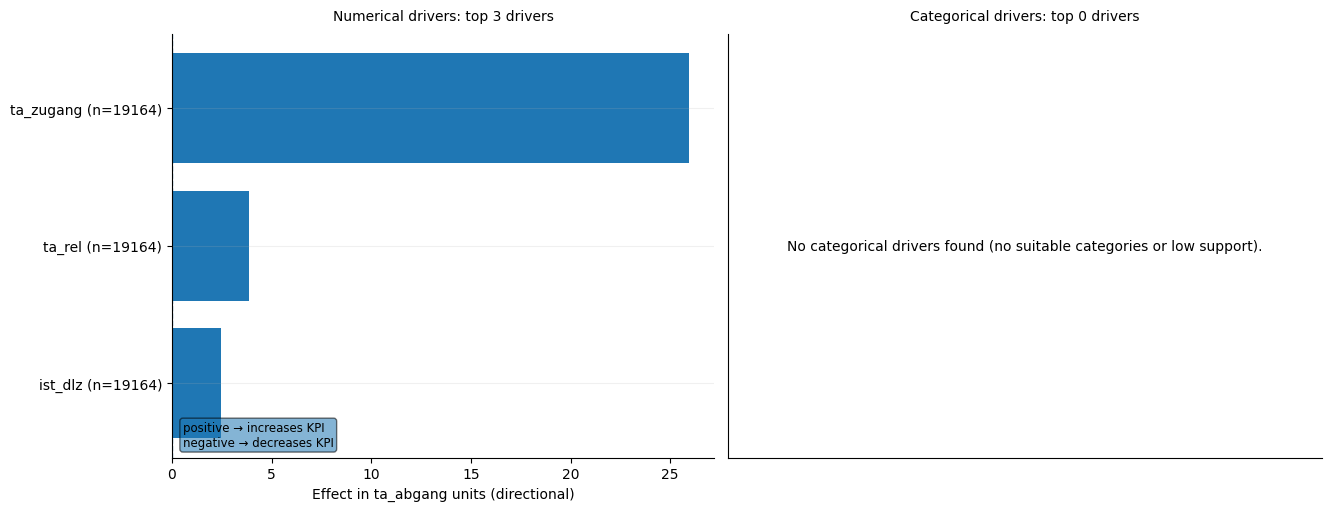


--- Summary ---
End-date deviations in 2024 operations are primarily caused by equivalent start-date delays. Cycle time changes minimally affect end completion. Late starts lead to nearly identical late completions. Cycle time alterations have very small impact. Missing values present in deviation metrics (3.6%).

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify the main drivers for end-dates being higher or lower, only operations in 2024.
Family: diagnostic (confidence=0.95)
Type: driver_relationships (confidence=0.95)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


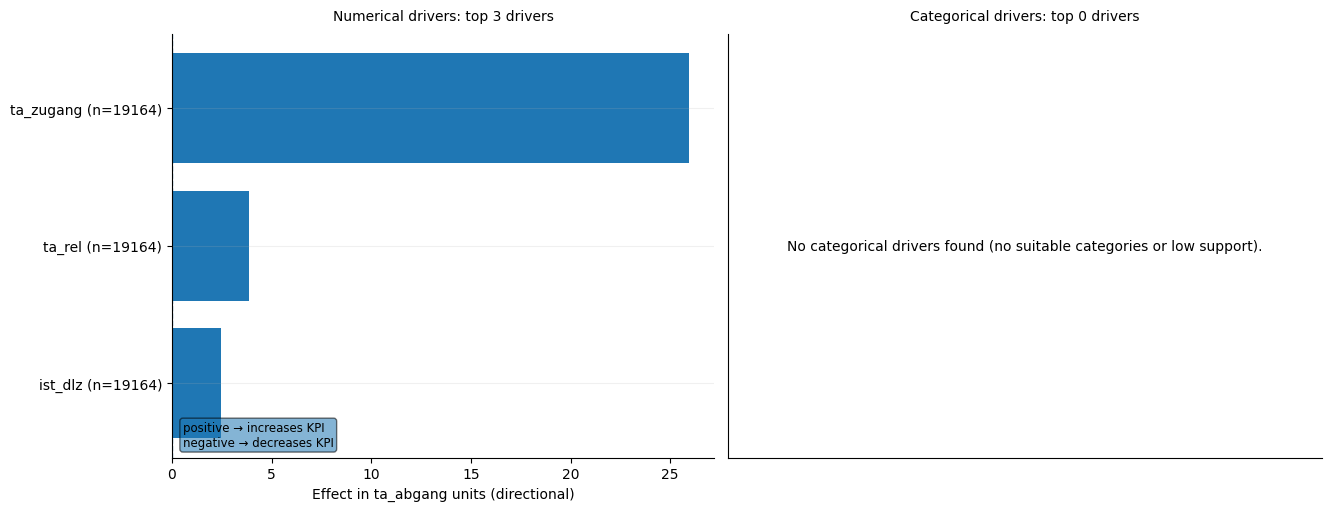


--- Summary ---
Generated analysis for: Identify the main drivers for end-dates being higher or lower, only operations in 2024.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: For only operations in 2024, what factors are driving end-dates to be higher or lower?
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


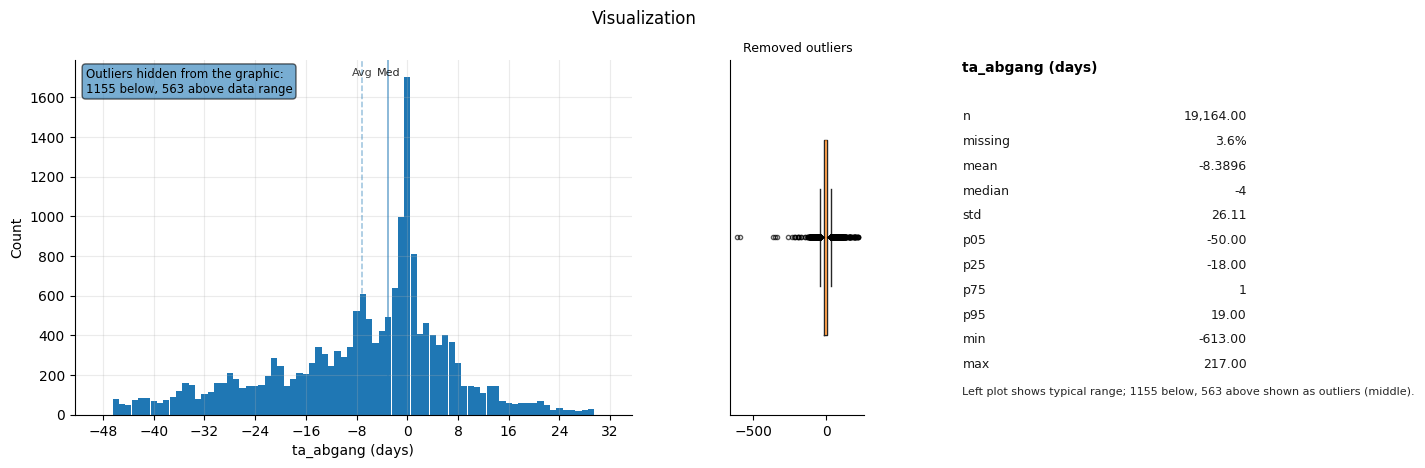


--- Summary ---
Generated analysis for: For only operations in 2024, what factors are driving end-dates to be higher or lower?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.
Family: diagnostic (confidence=0.95)
Type: driver_relationships (confidence=0.55)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


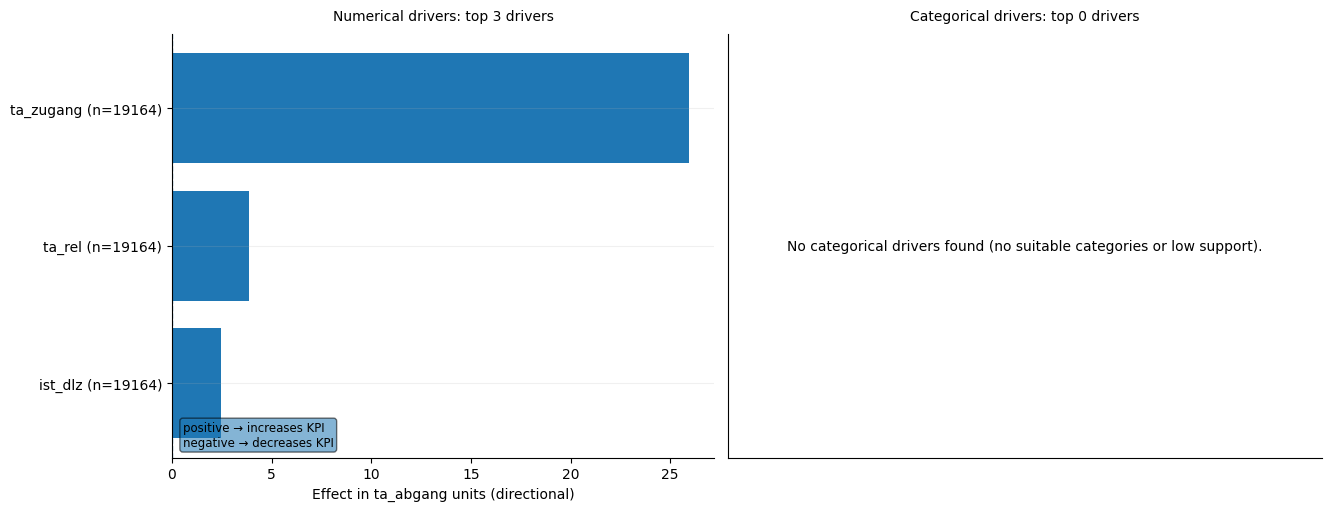


--- Summary ---
Generated analysis for: Explain the strongest drivers of higher vs lower end-dates for only operations in 2024.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which drivers affected lead times for assembly operations?
Family: diagnostic (confidence=0.35)
Type: driver_relationships (confidence=0.95)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


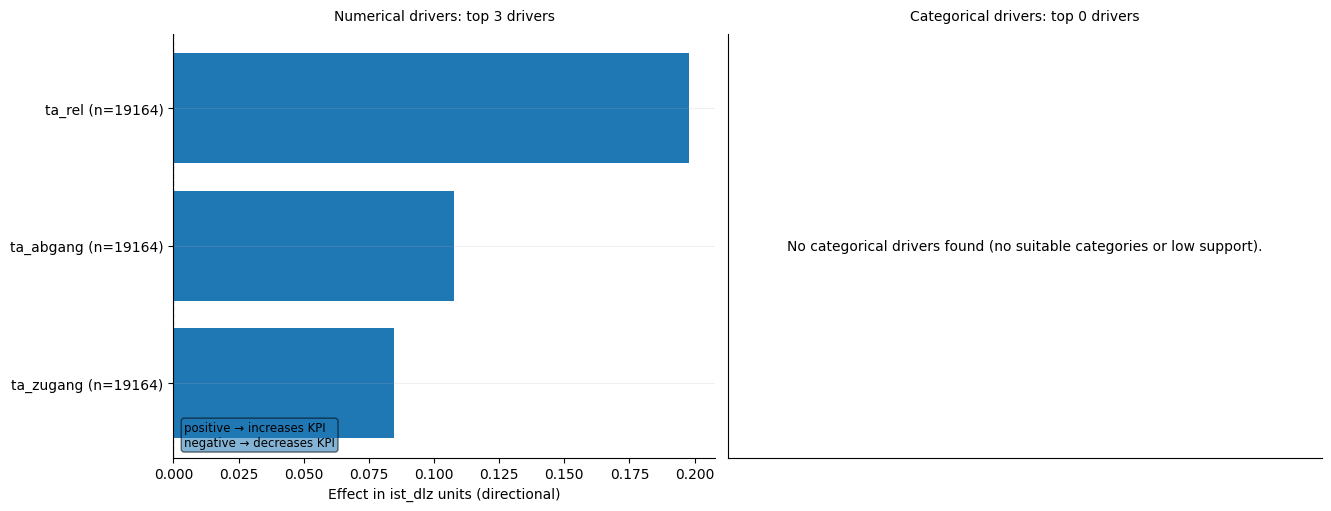


--- Summary ---
Generated analysis for: Which drivers affected lead times for assembly operations?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify which drivers affected lead times for assembly operations.
Family: diagnostic (confidence=0.95)
Type: driver_relationships (confidence=0.90)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


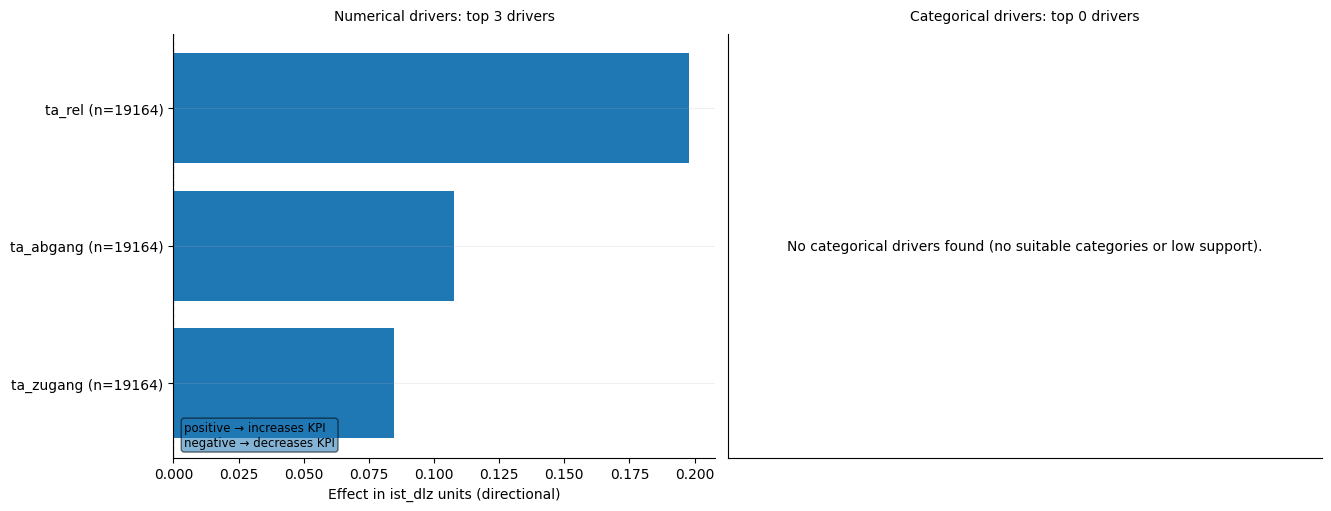


--- Summary ---
Generated analysis for: Identify which drivers affected lead times for assembly operations.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What factors are driving lead times for assembly operations?
Family: diagnostic (confidence=0.95)
Type: driver_relationships (confidence=0.95)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


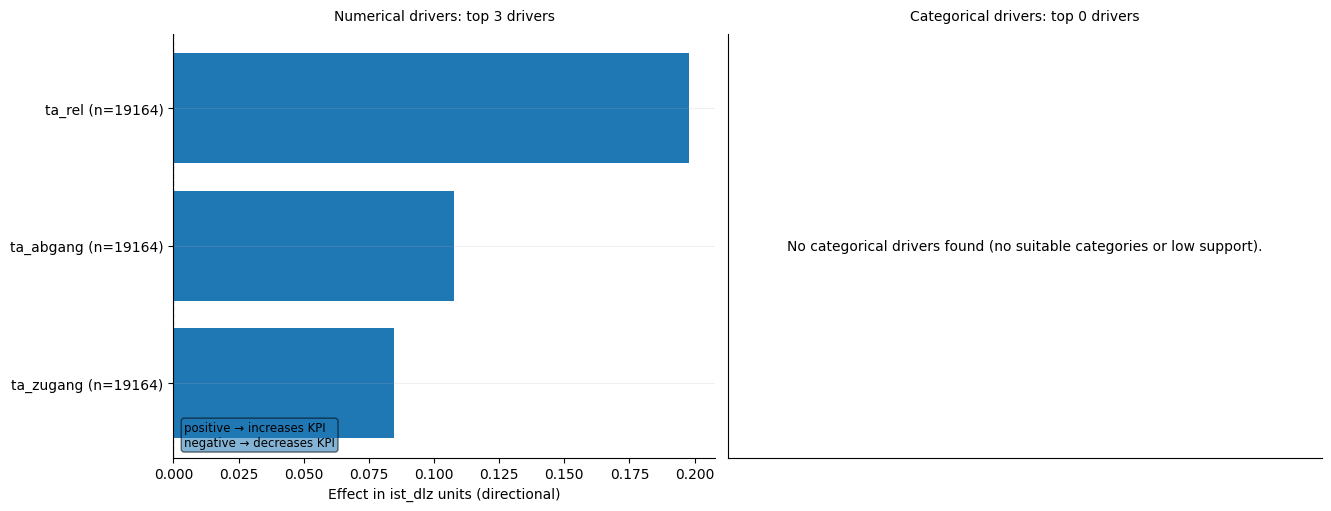


--- Summary ---
Generated analysis for: What factors are driving lead times for assembly operations?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the key drivers influencing lead times for assembly operations.
Family: diagnostic (confidence=0.95)
Type: driver_relationships (confidence=0.90)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


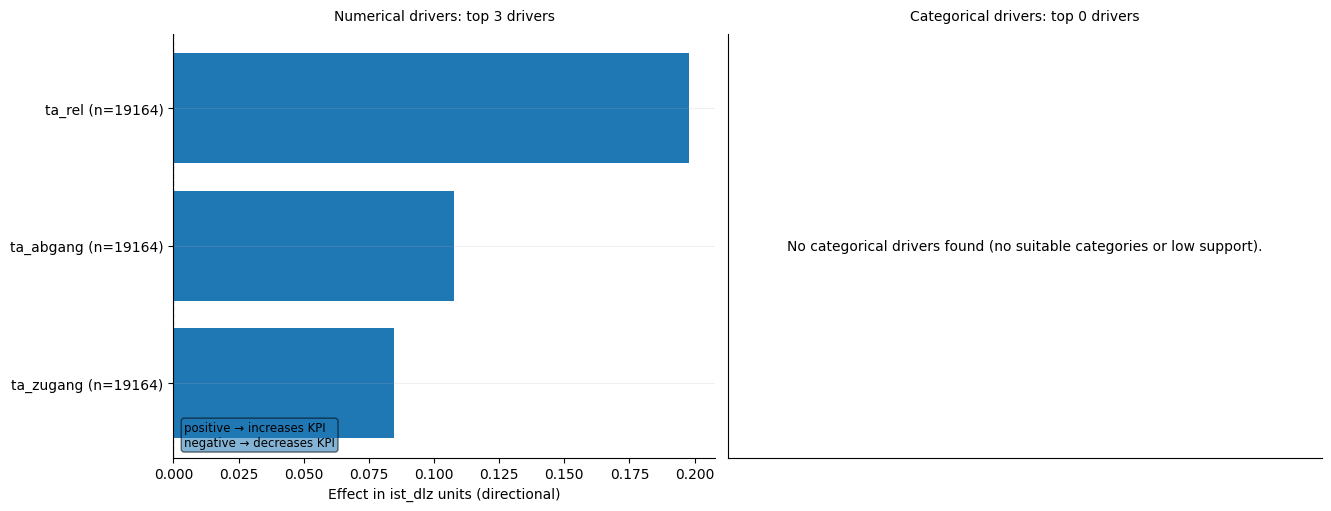


--- Summary ---
Generated analysis for: Show the key drivers influencing lead times for assembly operations.
[ERROR] block 13 base: cannot convert the series to <class 'float'>
[ERROR] block 13 alt1: cannot convert the series to <class 'float'>
[ERROR] block 13 alt2: cannot convert the series to <class 'float'>

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate the weekly average end-date deviation over the next 6 weeks.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


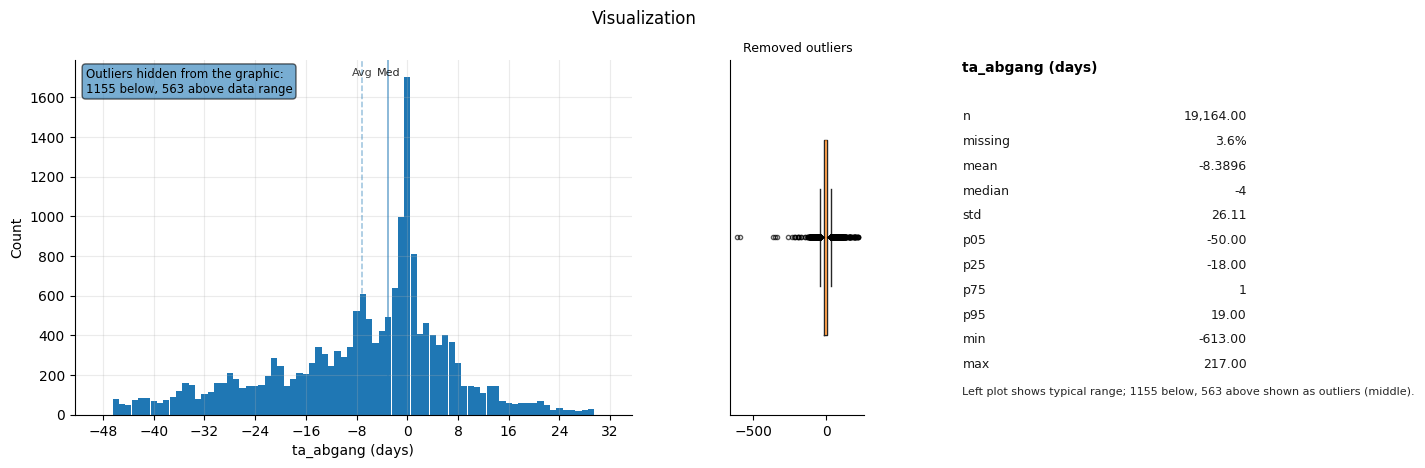


--- Summary ---
Generated analysis for: Estimate the weekly average end-date deviation over the next 6 weeks.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show me how the maximum start deviation will change for the next 6 weeks.
Family: predictive (confidence=0.95)
Type: forecasting (confidence=0.95)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Show me how the maximum start deviation will change for the next 6 weeks.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Forecast how the maximum start deviation will change for the next 6 weeks.
Family: predictive (confidence=1.00)
Type: forecasting (confidence=0.95)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Forecast how the maximum start deviation will change for the next 6 weeks.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the change in maximum start deviation for the next 6 weeks.
Family: predictive (confidence=0.35)
Type: forecasting (confidence=0.55)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Predict the change in maximum start deviation for the next 6 weeks.
[ERROR] block 14 alt3: cannot convert the series to <class 'float'>

--- Output DF head() ---


ta_rel
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN


--- Run overview (inputs & key decisions) ---
Prompt: What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=0.55)
Columns: ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


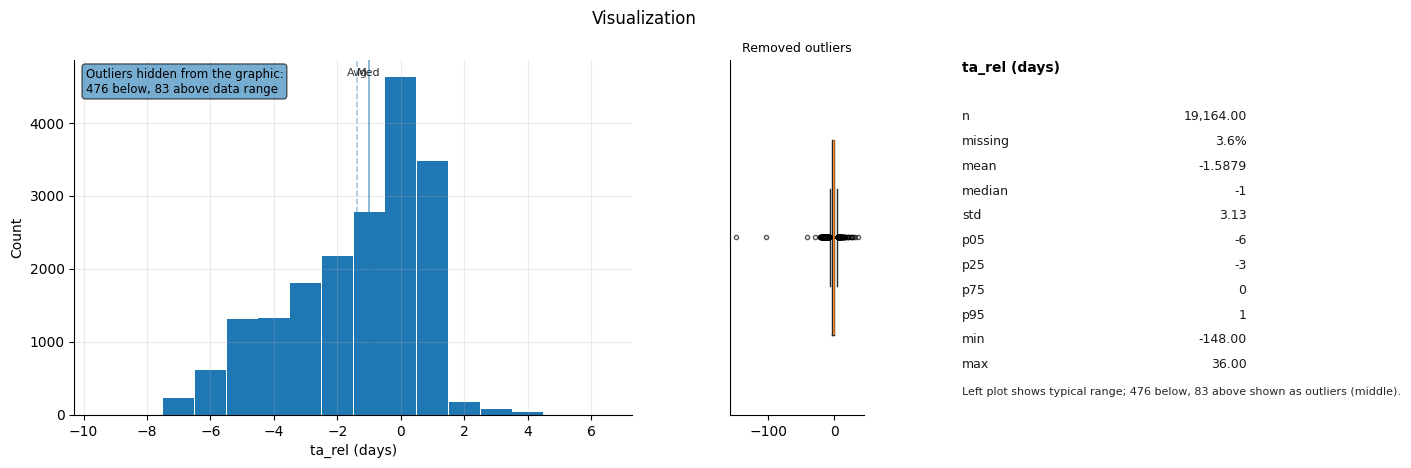


--- Summary ---
Generated analysis for: What is the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---


ta_rel  ta_abgang
1619     3.0       13.0
1637    -5.0        5.0
3242     2.0       12.0
3996    -3.0        7.0
4470    -1.0        9.0


--- Run overview (inputs & key decisions) ---
Prompt: Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.
Family: predictive (confidence=0.92)
Type: regression (confidence=0.95)
Filters: status == fertiggemeldet; ta_zugang == 10; ist_dlz == 3
Columns: ta_rel, ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Estimate the expected end-date deviation for a new case given start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.
Family: predictive (confidence=0.98)
Type: regression (confidence=0.95)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


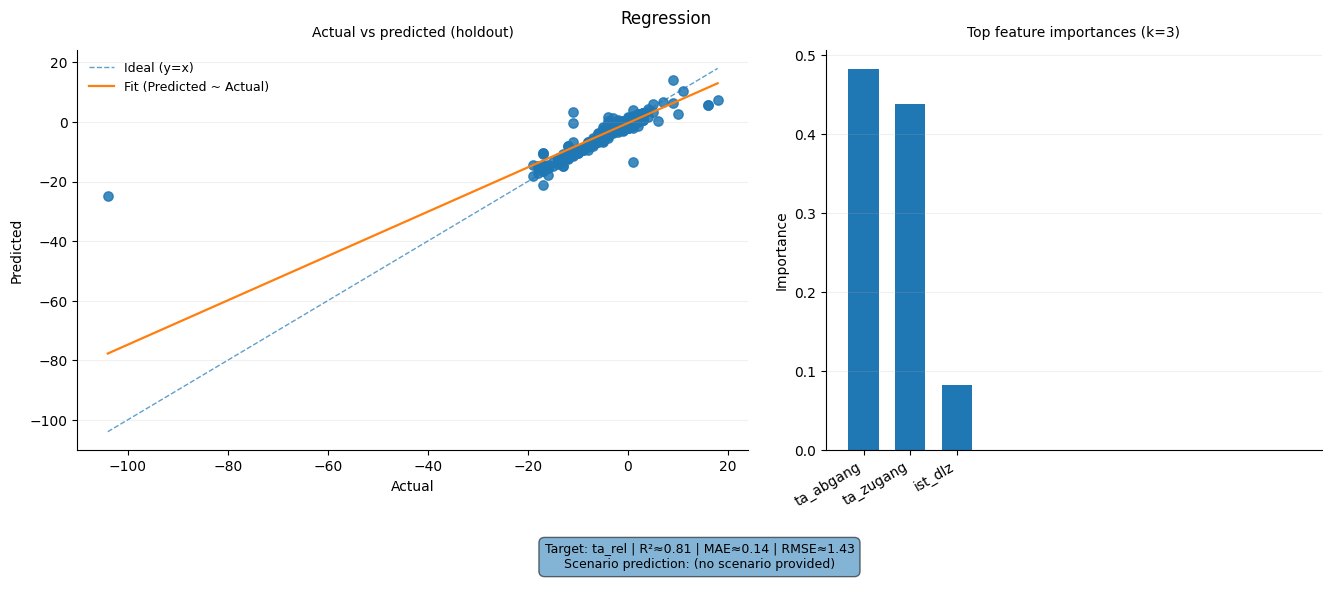


--- Summary ---
Generated analysis for: Predict the expected end-date deviation for a new case with start delay of 10 days and run-through time of 3 days.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?
Family: predictive (confidence=0.95)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


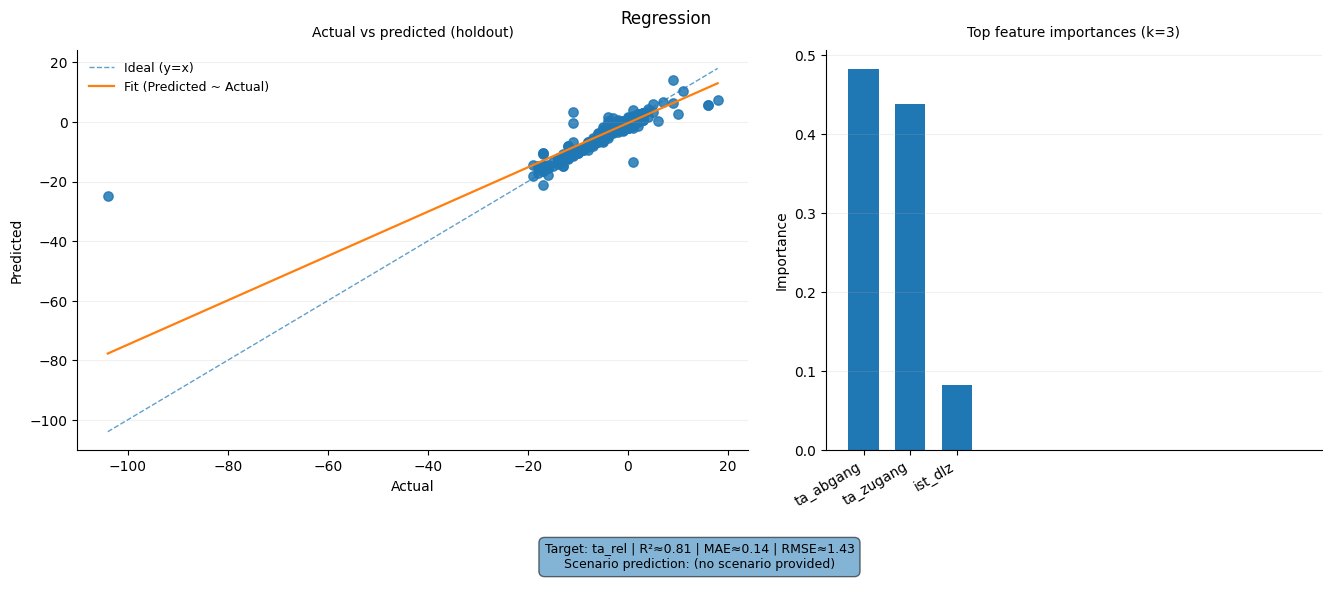


--- Summary ---
Generated analysis for: Given start delay of 10 days and run-through time of 3 days, what end-date deviation do you expect for a new case?.

--- Output DF head() ---


ta_rel  ist_dlz  ta_zugang  ta_abgang
0     NaN      NaN       19.0        NaN
1     NaN      NaN       17.0        NaN
2     NaN      NaN       13.0        NaN
3     NaN      NaN       85.0        NaN
4     NaN      NaN        8.0        NaN


--- Run overview (inputs & key decisions) ---
Prompt: If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?
Family: predictive (confidence=0.35)
Type: regression (confidence=0.55)
Columns: ta_rel, ist_dlz, ta_zugang, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


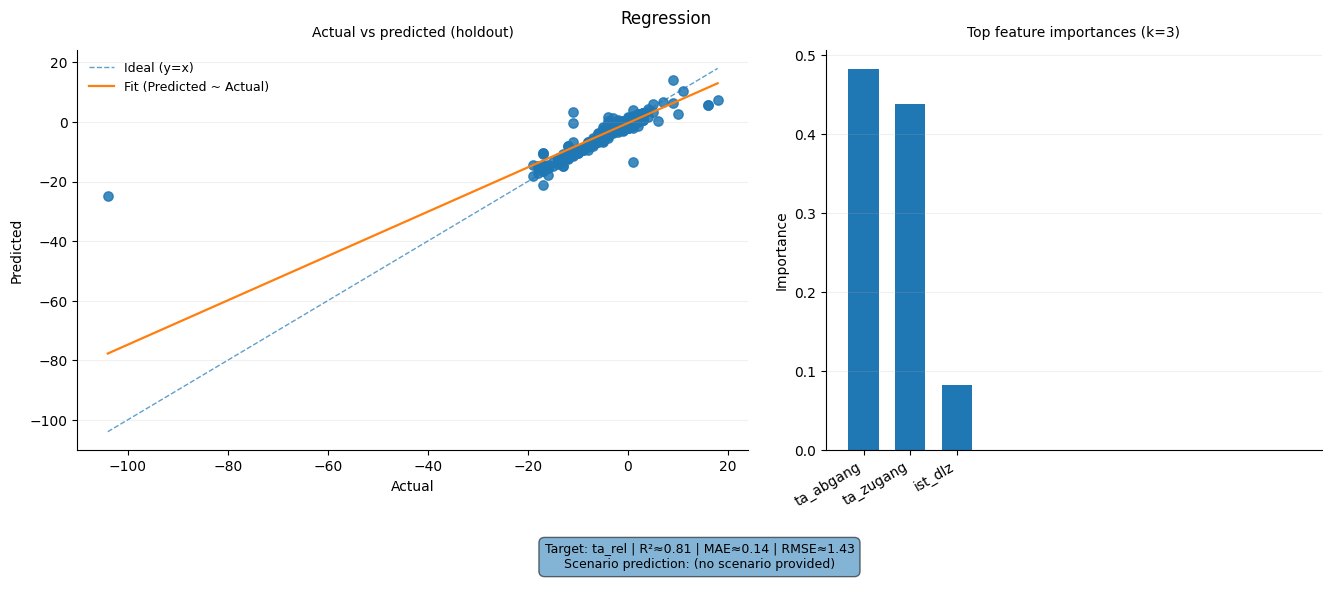


--- Summary ---
Generated analysis for: If start deviation is 3 days and cycle time is 2 days, what would be a good prediction for the end deviation?.

--- Output DF head() ---


ta_rel  ta_zugang  ist_dlz  ta_abgang
0     NaN       19.0      NaN        NaN
1     NaN       17.0      NaN        NaN
2     NaN       13.0      NaN        NaN
3     NaN       85.0      NaN        NaN
4     NaN        8.0      NaN        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.
Family: predictive (confidence=0.90)
Type: regression (confidence=0.95)
Columns: ta_rel, ta_zugang, ist_dlz, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


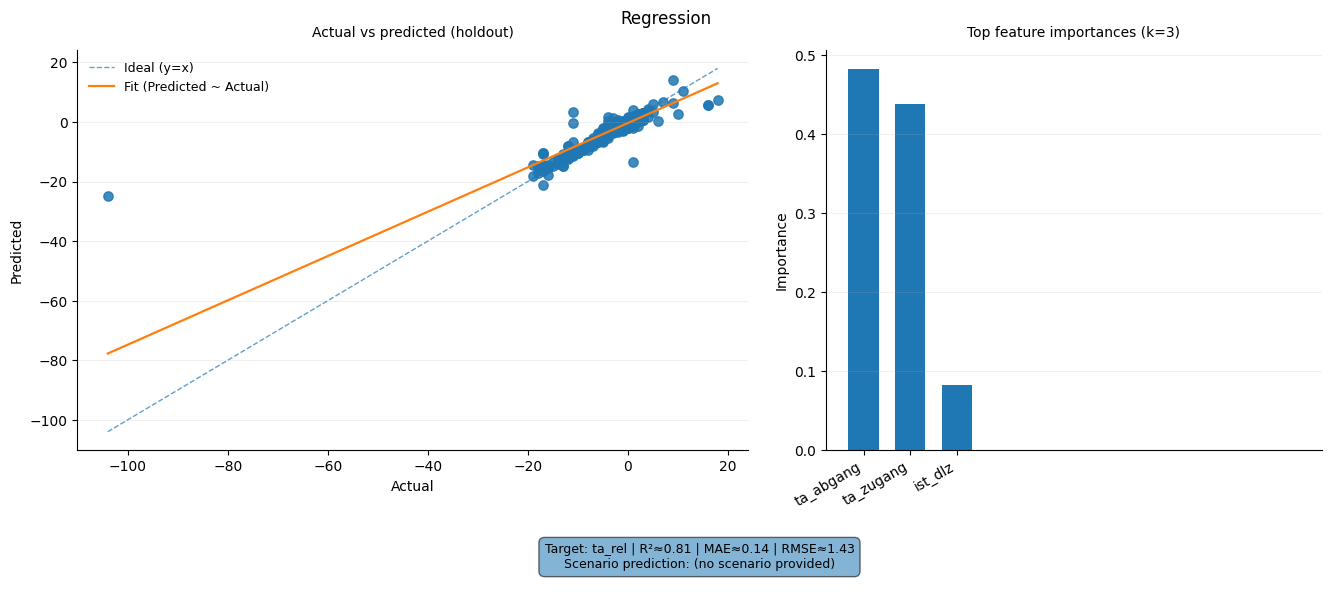


--- Summary ---
Generated analysis for: Given start deviation is 3 days and cycle time is 2 days, predict the end deviation.

--- Output DF head() ---


ta_rel  ta_abgang  ta_zugang  ist_dlz
0     NaN        NaN       19.0      NaN
1     NaN        NaN       17.0      NaN
2     NaN        NaN       13.0      NaN
3     NaN        NaN       85.0      NaN
4     NaN        NaN        8.0      NaN


--- Run overview (inputs & key decisions) ---
Prompt: What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?
Family: predictive (confidence=0.95)
Type: regression (confidence=0.95)
Columns: ta_rel, ta_abgang, ta_zugang, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: block (confidence=1.0)

--- Plots ---


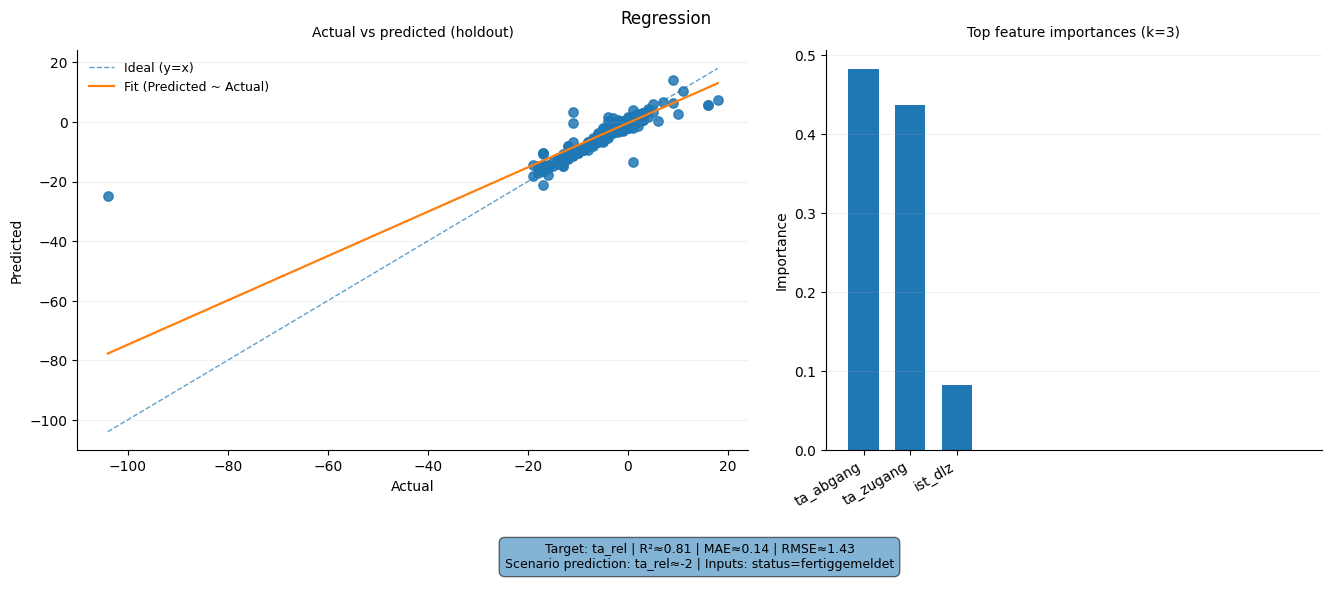


--- Summary ---
Generated analysis for: What end deviation would you predict if start deviation is 3 days and cycle time is 2 days?.

--- Output DF head() ---


ta_rel  ta_abgang  ta_zugang  ist_dlz
0     NaN        NaN       19.0      NaN
1     NaN        NaN       17.0      NaN
2     NaN        NaN       13.0      NaN
3     NaN        NaN       85.0      NaN
4     NaN        NaN        8.0      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.
Family: predictive (confidence=0.95)
Type: regression (confidence=0.95)
Columns: ta_rel, ta_abgang, ta_zugang, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


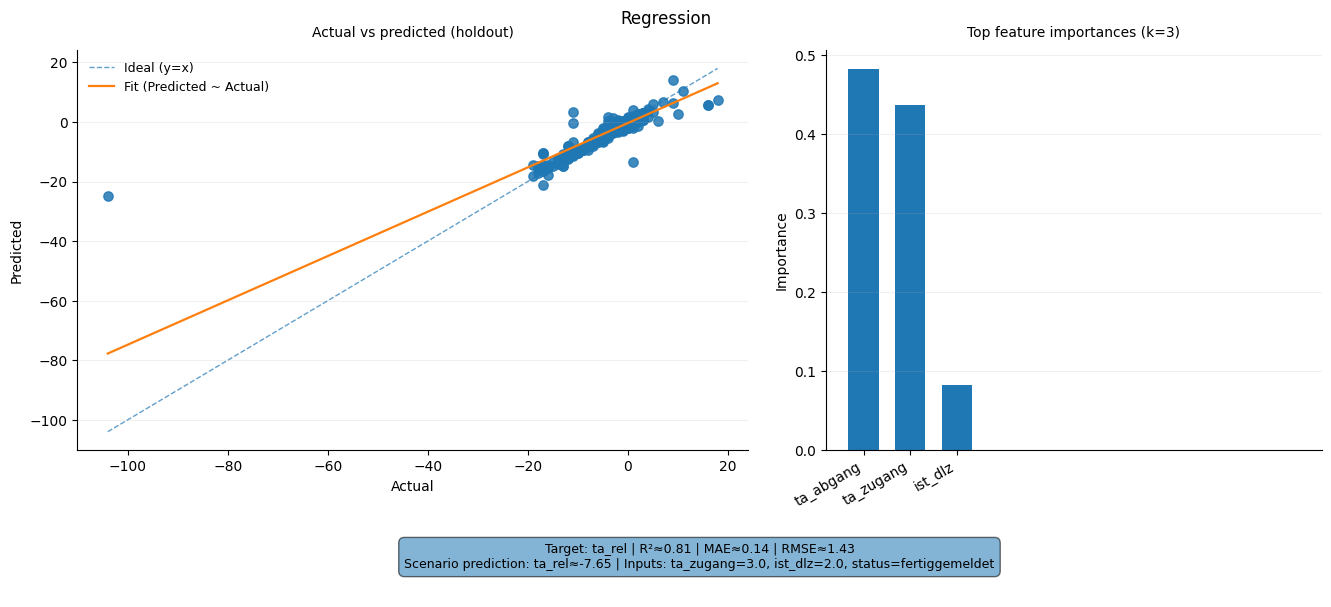


--- Summary ---
Generated analysis for: Provide a reasonable prediction of end deviation when start deviation is 3 days and cycle time is 2 days.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_rel
0       19.0      NaN     NaN
1       17.0      NaN     NaN
2       13.0      NaN     NaN
3       85.0      NaN     NaN
4        8.0      NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.
Family: predictive (confidence=0.95)
Type: regression (confidence=0.95)
Columns: ta_zugang, ist_dlz, ta_rel
Prepare actions: none
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


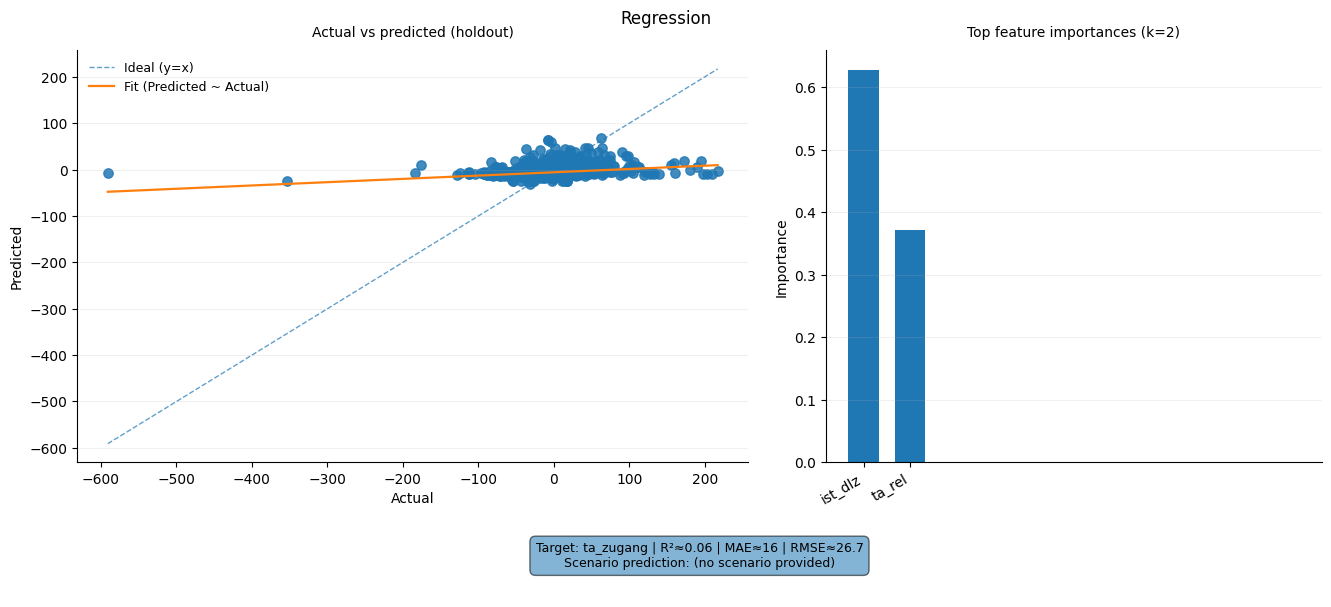


--- Summary ---
Generated analysis for: Predict the lead time deviation if lead time is 3 days and start deviation is -20 days.

--- Output DF head() ---


ta_zugang  ta_rel  ist_dlz
0       19.0     NaN      NaN
1       17.0     NaN      NaN
2       13.0     NaN      NaN
3       85.0     NaN      NaN
4        8.0     NaN      NaN


--- Run overview (inputs & key decisions) ---
Prompt: What is the predicted lead time deviation if lead time is 3 days and start deviation is -20 days?
Family: predictive (confidence=0.95)
Type: regression (confidence=0.95)
Columns: ta_zugang, ta_rel, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


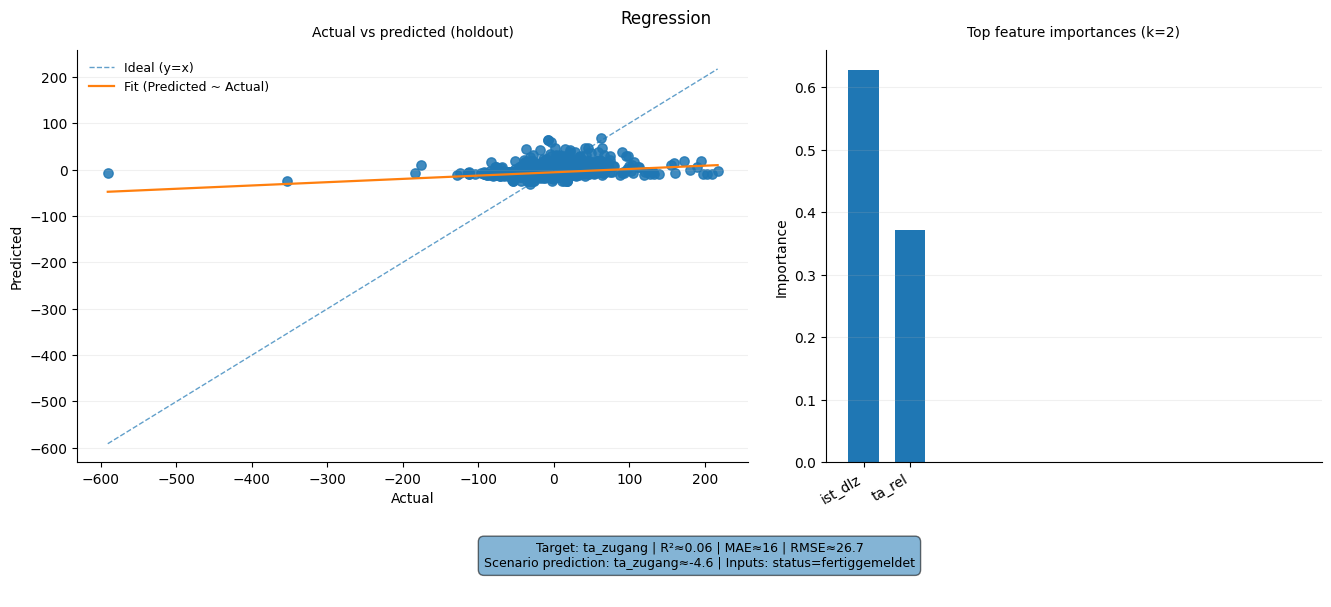


--- Output DF head() ---


ta_zugang
0       19.0
1       17.0
2       13.0
3       85.0
4        8.0


--- Run overview (inputs & key decisions) ---
Prompt: Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.
Family: descriptive (confidence=0.35)
Type: stats_summary (confidence=1.00)
Columns: ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


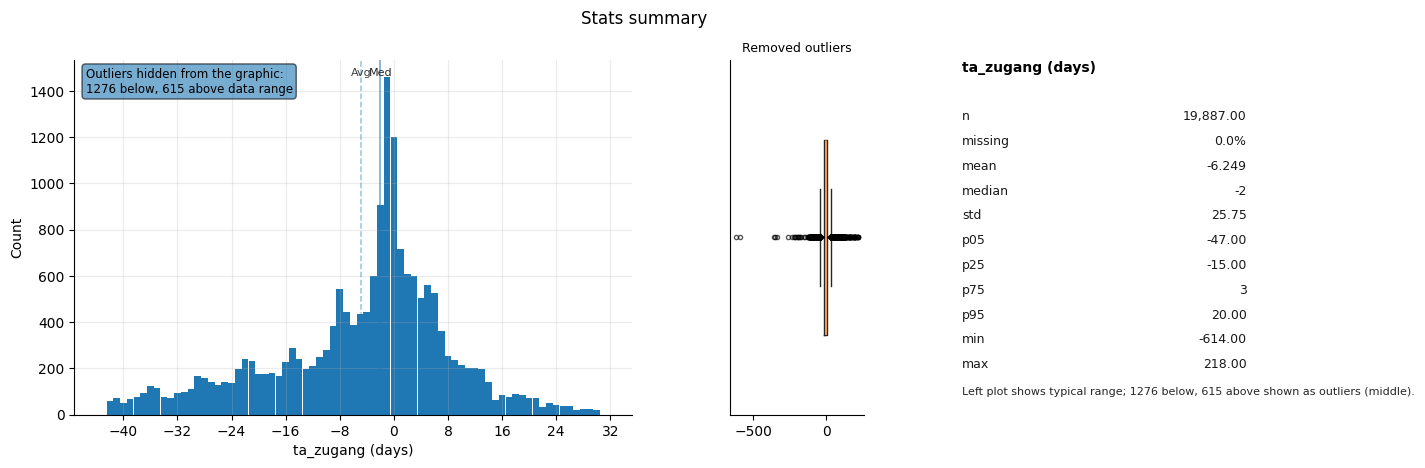


--- Summary ---
Generated analysis for: Estimate lead time deviation given lead time is 3 days and start deviation is -20 days.

--- Output DF head() ---


ta_zugang  ist_dlz  ta_abgang  ta_rel
0       19.0      NaN        NaN     NaN
1       17.0      NaN        NaN     NaN
2       13.0      NaN        NaN     NaN
3       85.0      NaN        NaN     NaN
4        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.
Family: predictive (confidence=0.95)
Type: regression (confidence=0.95)
Columns: ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


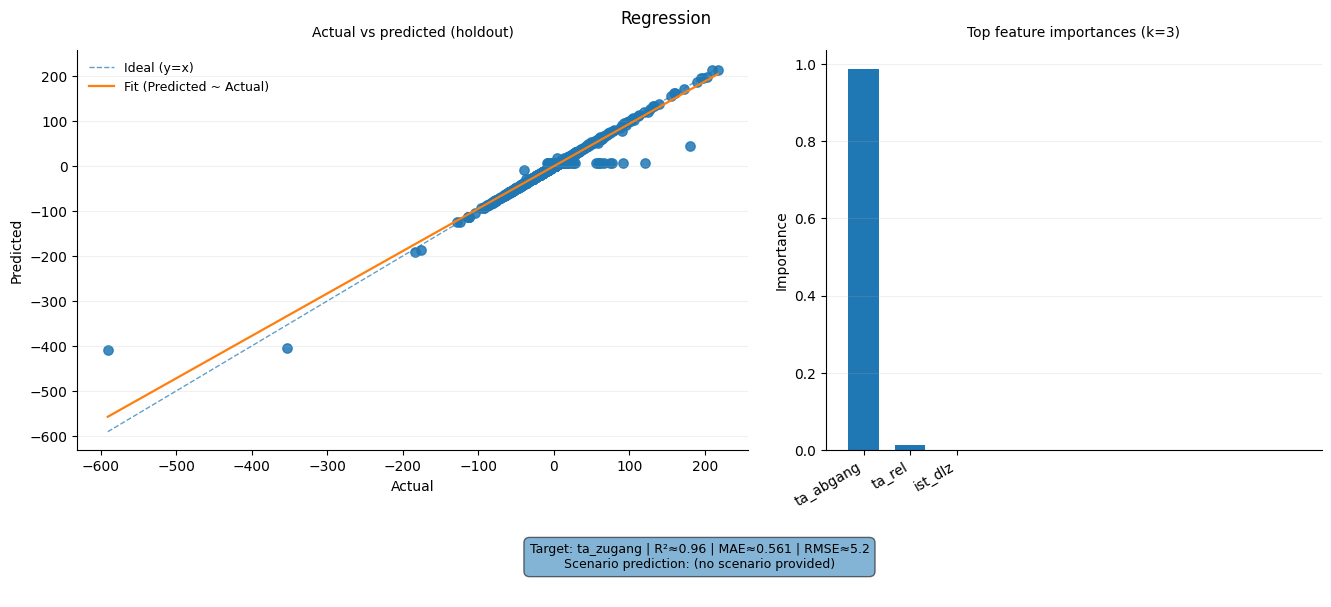


--- Summary ---
Generated analysis for: Given lead time is 3 days and start deviation is -20 days, predict the lead time deviation.

--- Output DF head() ---


status            ta_status            resource_group  ta_zugang
0  laufend  TA nicht erreichbar                        RP       19.0
1  laufend  TA nicht erreichbar  Fräsen Gruppe Kleinteile       17.0
2  laufend  TA nicht erreichbar                    3D CAM       13.0
3  laufend  TA nicht erreichbar              Konstruktion       85.0
4  laufend  TA nicht erreichbar                        RP        8.0


--- Run overview (inputs & key decisions) ---
Prompt: Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.
Family: predictive (confidence=0.95)
Type: classification (confidence=1.00)
Columns: status, ta_status, resource_group, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


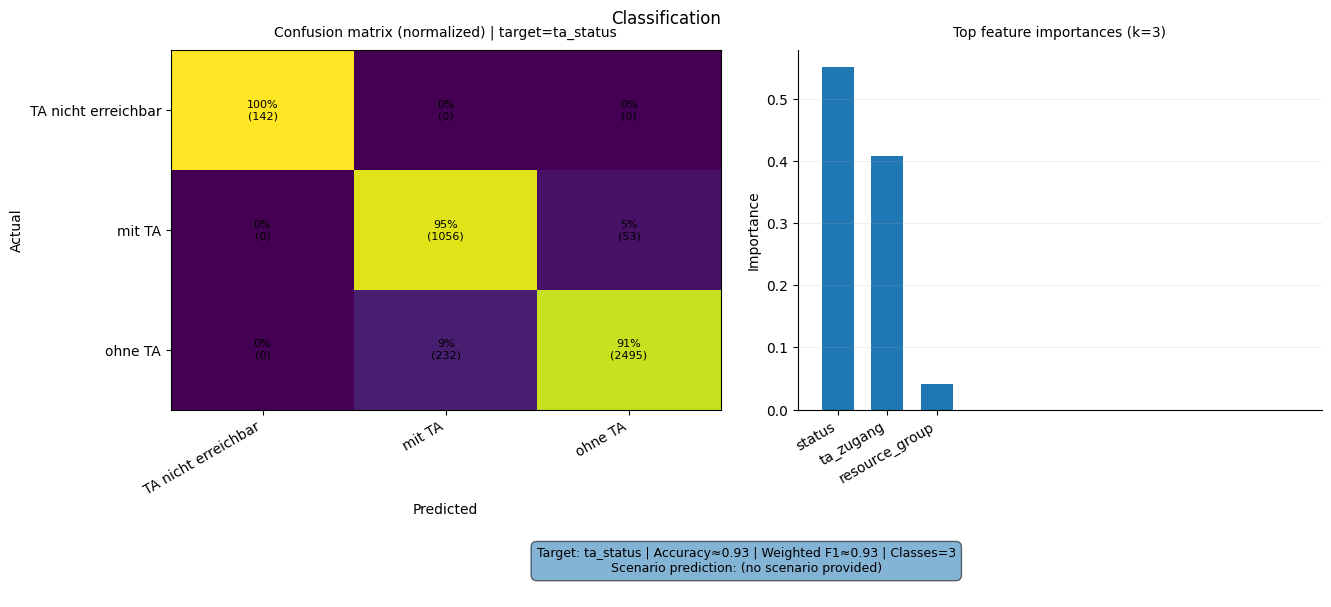


--- Summary ---
Generated analysis for: Classify the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.

--- Output DF head() ---


status            ta_status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend  TA nicht erreichbar       19.0      NaN        NaN     NaN
1  laufend  TA nicht erreichbar       17.0      NaN        NaN     NaN
2  laufend  TA nicht erreichbar       13.0      NaN        NaN     NaN
3  laufend  TA nicht erreichbar       85.0      NaN        NaN     NaN
4  laufend  TA nicht erreichbar        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.
Family: predictive (confidence=0.95)
Type: classification (confidence=1.00)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: block (confidence=1.0)

--- Plots ---


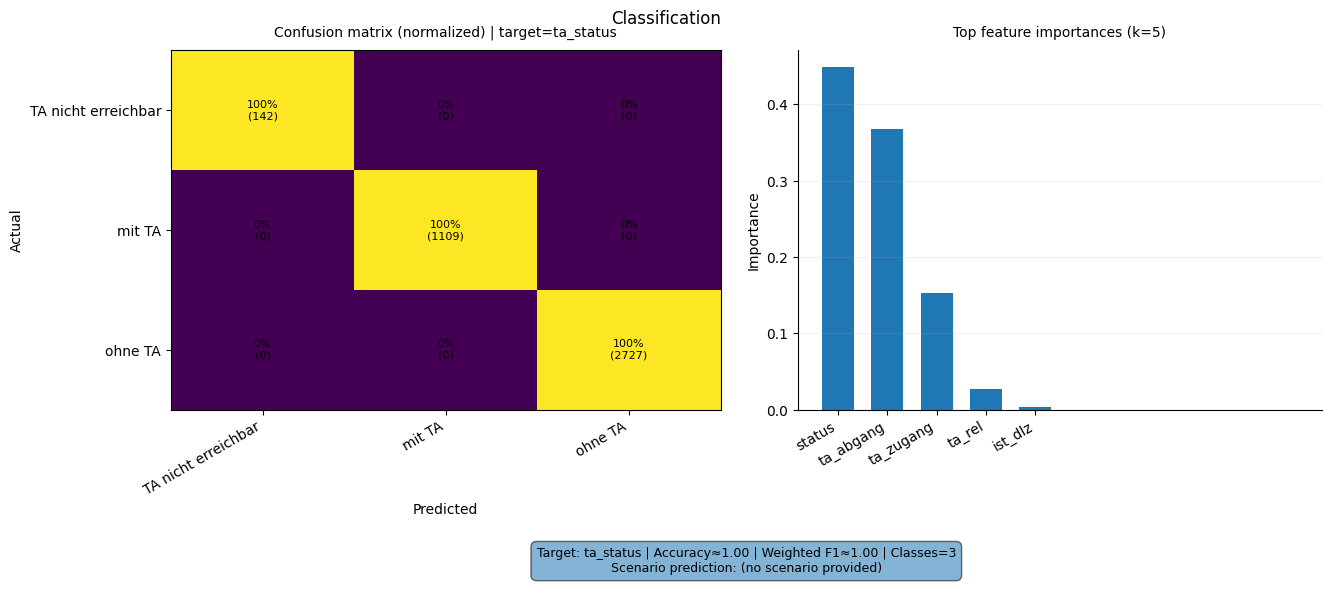


--- Summary ---
Generated analysis for: Predict the likely ta_status if start is 10 days early and resource group ‘Fräsen DM100’.

--- Output DF head() ---


status            ta_status            resource_group  ta_zugang
0  laufend  TA nicht erreichbar                        RP       19.0
1  laufend  TA nicht erreichbar  Fräsen Gruppe Kleinteile       17.0
2  laufend  TA nicht erreichbar                    3D CAM       13.0
3  laufend  TA nicht erreichbar              Konstruktion       85.0
4  laufend  TA nicht erreichbar                        RP        8.0


--- Run overview (inputs & key decisions) ---
Prompt: What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?
Family: predictive (confidence=0.95)
Type: classification (confidence=0.95)
Columns: status, ta_status, resource_group, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


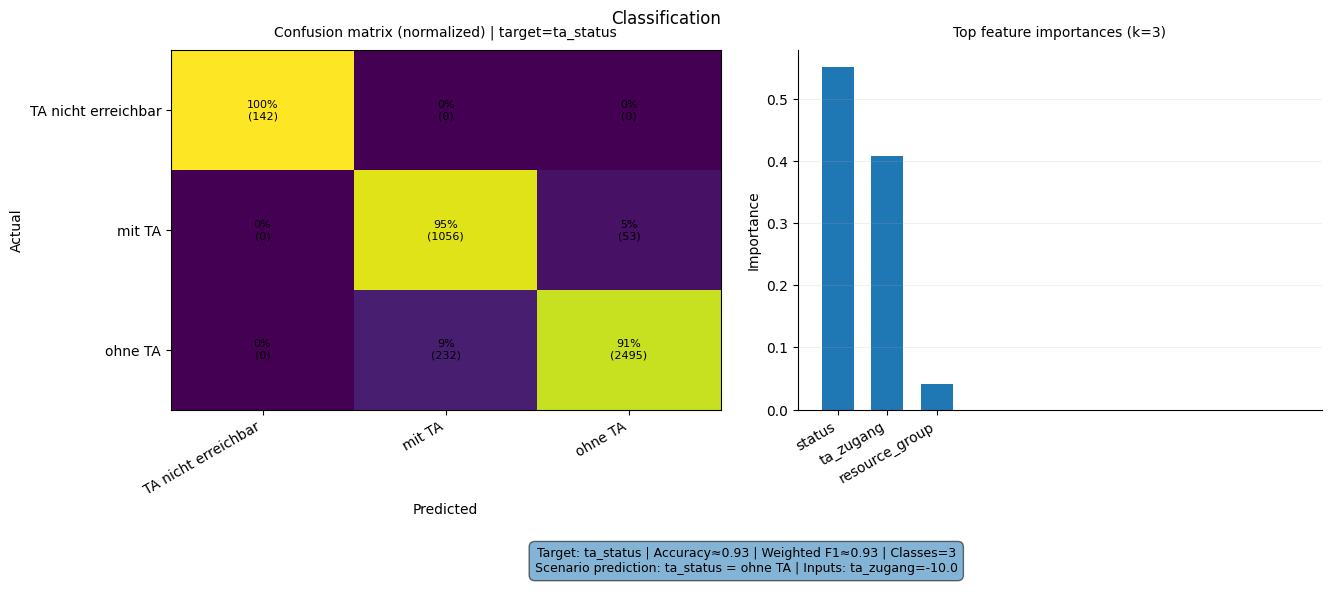


--- Summary ---
Generated analysis for: What ta_status would you classify if start is 10 days early and resource group ‘Fräsen DM100’?.

--- Output DF head() ---


status            ta_status  ta_zugang  ist_dlz  ta_abgang  ta_rel
0  laufend  TA nicht erreichbar       19.0      NaN        NaN     NaN
1  laufend  TA nicht erreichbar       17.0      NaN        NaN     NaN
2  laufend  TA nicht erreichbar       13.0      NaN        NaN     NaN
3  laufend  TA nicht erreichbar       85.0      NaN        NaN     NaN
4  laufend  TA nicht erreichbar        8.0      NaN        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.
Family: predictive (confidence=0.95)
Type: classification (confidence=0.95)
Columns: status, ta_status, ta_zugang, ist_dlz, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


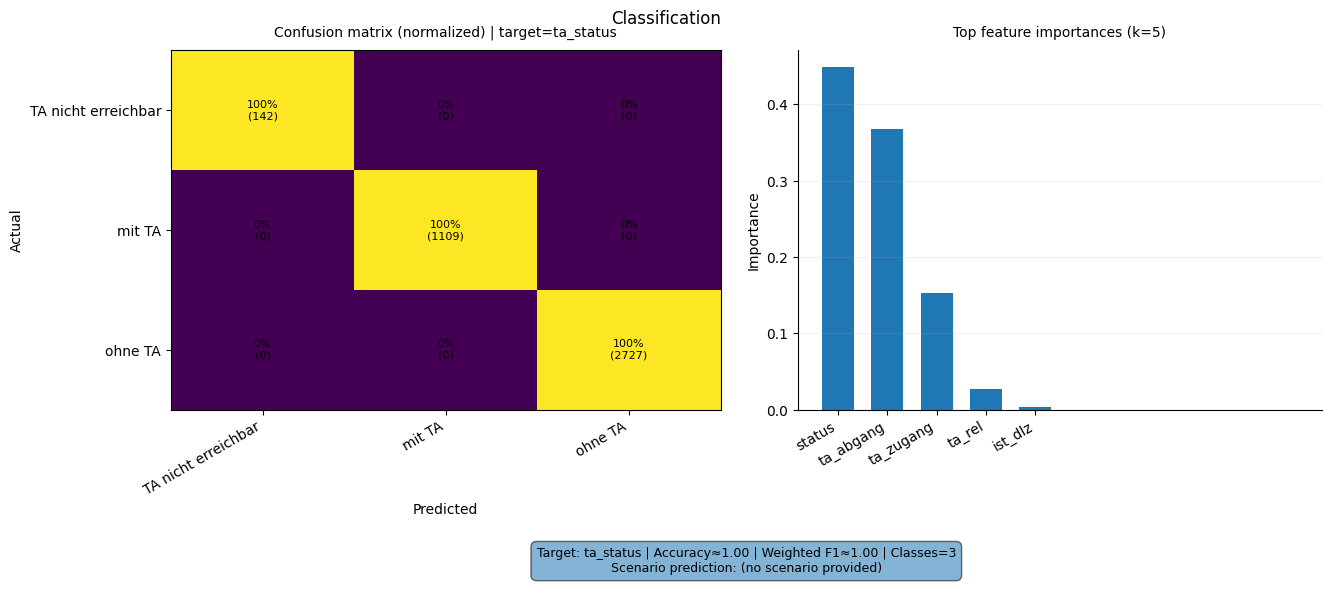


--- Summary ---
Generated analysis for: Given start is 10 days early and resource group ‘Fräsen DM100’, classify the most likely ta_status.

--- Output DF head() ---


status  ist_dlz
358  fertiggemeldet      1.0
359  fertiggemeldet      1.0
360  fertiggemeldet      1.0
361  fertiggemeldet      1.0
362  fertiggemeldet      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1?
Family: predictive (confidence=0.90)
Type: regression (confidence=0.55)
Filters: avg_type == resection resectionKleinbauteile schlichten; ist_dlz == 1.0
Columns: status, ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
No deviation data (TA) is available in the dataset for operations of type 'Kleinbauteile schlichten' with cycle time 1 day, so we cannot determine the expected ta status. All 15,996 operations had identical cycle time (1 day) and status: 'fertiggemeldet'. No variation in data prevents predicting ta status. Required schedule deviation columns were unavailable.

--- Output DF head() ---


status  ist_dlz  ta_zugang  ta_abgang  ta_rel
0  laufend      NaN       19.0        NaN     NaN
1  laufend      NaN       17.0        NaN     NaN
2  laufend      NaN       13.0        NaN     NaN
3  laufend      NaN       85.0        NaN     NaN
4  laufend      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.
Family: predictive (confidence=0.95)
Type: classification (confidence=0.98)
Columns: status, ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: block (confidence=1.0)

--- Plots ---


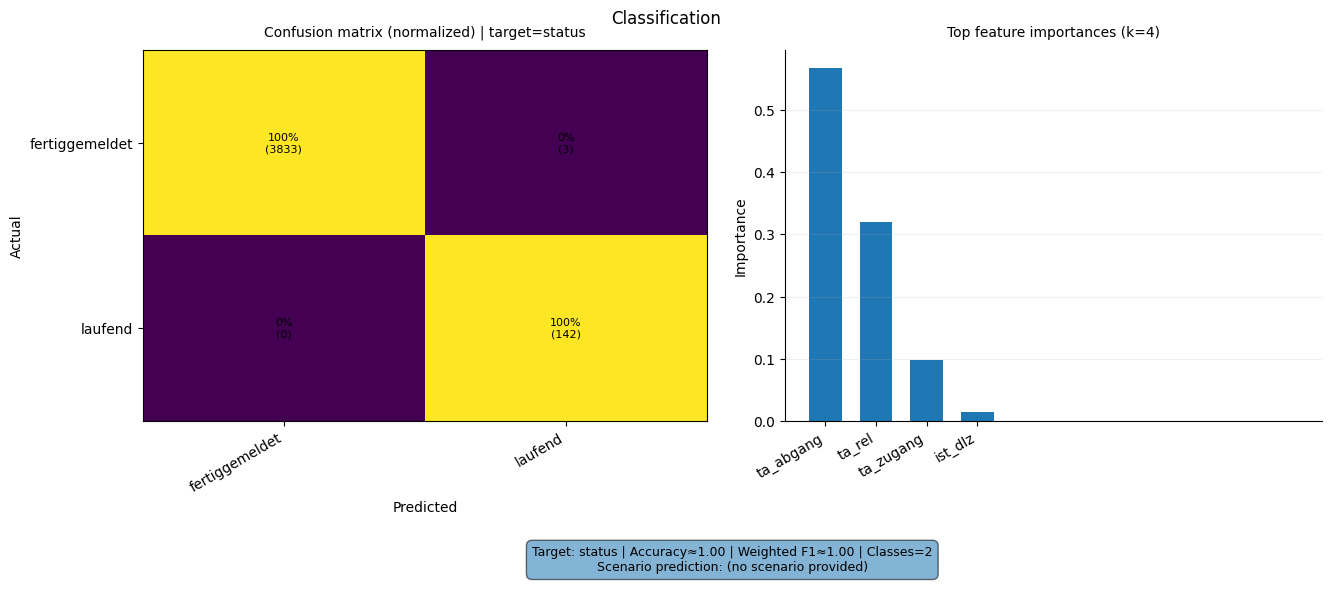


--- Summary ---
Generated analysis for: Predict which ta status is to expect for a operation type 'Kleinbauteile schlichten' with a cycle time of 1.

--- Output DF head() ---


status                 avg_type            ta_status  ist_dlz
0  laufend           Bauraum prüfen  TA nicht erreichbar      NaN
1  laufend  Kleinbauteile schruppen  TA nicht erreichbar      NaN
2  laufend               NC-Ausgabe  TA nicht erreichbar      NaN
3  laufend     CAD-Modell erstellen  TA nicht erreichbar      NaN
4  laufend        Baujob überwachen  TA nicht erreichbar      NaN


--- Run overview (inputs & key decisions) ---
Prompt: For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?
Family: predictive (confidence=0.95)
Type: classification (confidence=1.00)
Columns: status, avg_type, ta_status, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


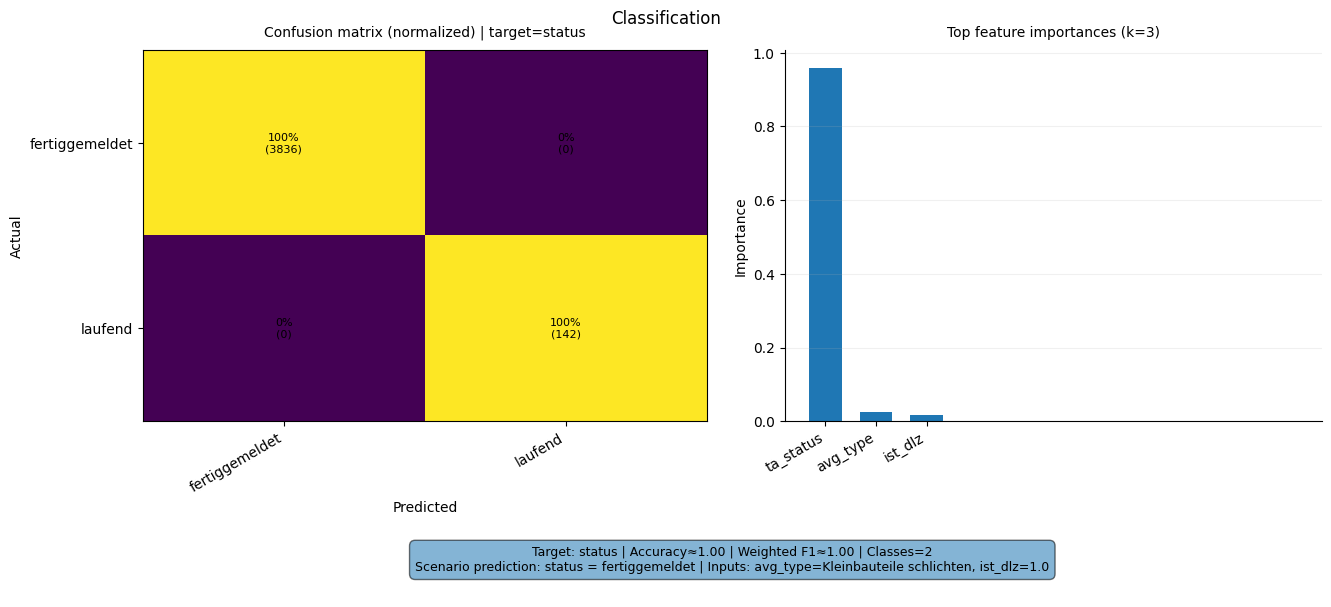


--- Summary ---
Generated analysis for: For a operation type 'Kleinbauteile schlichten' with a cycle time of 1, what ta status should we expect?.

--- Output DF head() ---


status                 avg_type            ta_status  ist_dlz
0  laufend           Bauraum prüfen  TA nicht erreichbar      NaN
1  laufend  Kleinbauteile schruppen  TA nicht erreichbar      NaN
2  laufend               NC-Ausgabe  TA nicht erreichbar      NaN
3  laufend     CAD-Modell erstellen  TA nicht erreichbar      NaN
4  laufend        Baujob überwachen  TA nicht erreichbar      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.
Family: predictive (confidence=0.95)
Type: classification (confidence=0.95)
Columns: status, avg_type, ta_status, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


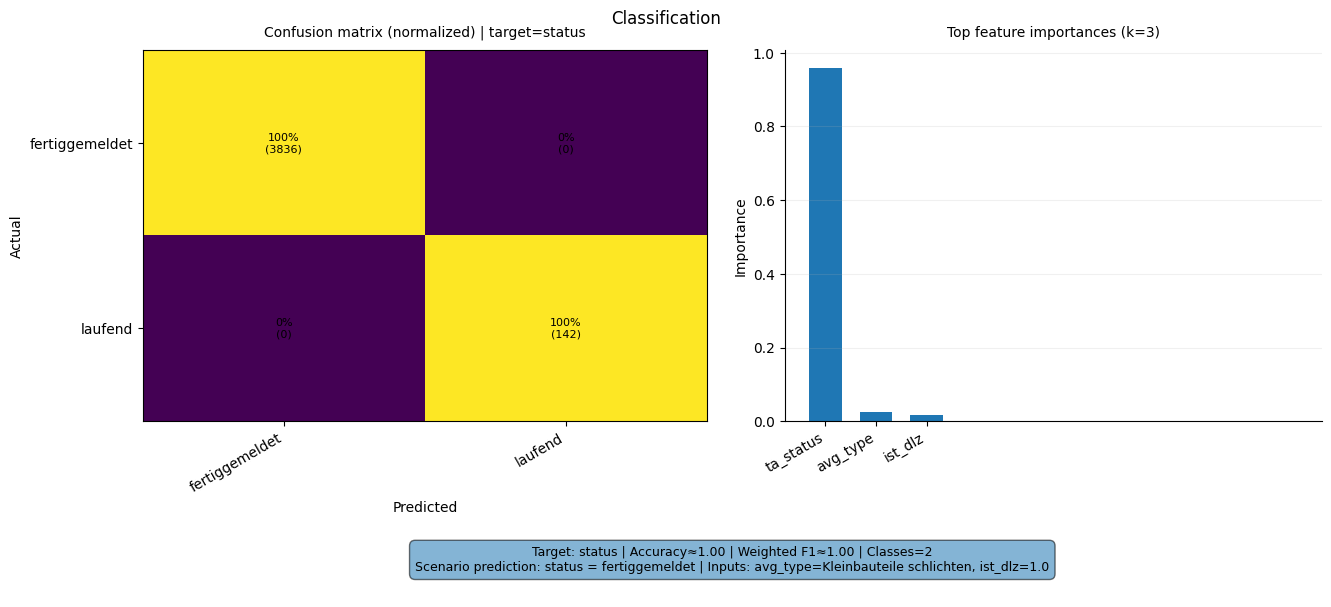


--- Summary ---
Generated analysis for: Classify the expected ta status for a operation type 'Kleinbauteile schlichten' given a cycle time of 1.

--- Output DF head() ---


status  ta_zugang
472   fertiggemeldet      -20.0
1353  fertiggemeldet      -20.0
8810  fertiggemeldet      -20.0
8856  fertiggemeldet      -20.0
9995  fertiggemeldet      -20.0


--- Run overview (inputs & key decisions) ---
Prompt: Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.
Family: predictive (confidence=0.90)
Type: classification (confidence=0.55)
Filters: avg_type == Funktionsprüfung; ta_zugang == -20
Columns: status, ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Classify a likely ta status in a situation where the operation startet 20 days early with a 'Funktionsprüfung'.

--- Output DF head() ---


status            ta_status                 avg_type  ta_zugang
0  laufend  TA nicht erreichbar           Bauraum prüfen       19.0
1  laufend  TA nicht erreichbar  Kleinbauteile schruppen       17.0
2  laufend  TA nicht erreichbar               NC-Ausgabe       13.0
3  laufend  TA nicht erreichbar     CAD-Modell erstellen       85.0
4  laufend  TA nicht erreichbar        Baujob überwachen        8.0


--- Run overview (inputs & key decisions) ---
Prompt: Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.
Family: predictive (confidence=0.95)
Type: classification (confidence=0.98)
Columns: status, ta_status, avg_type, ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


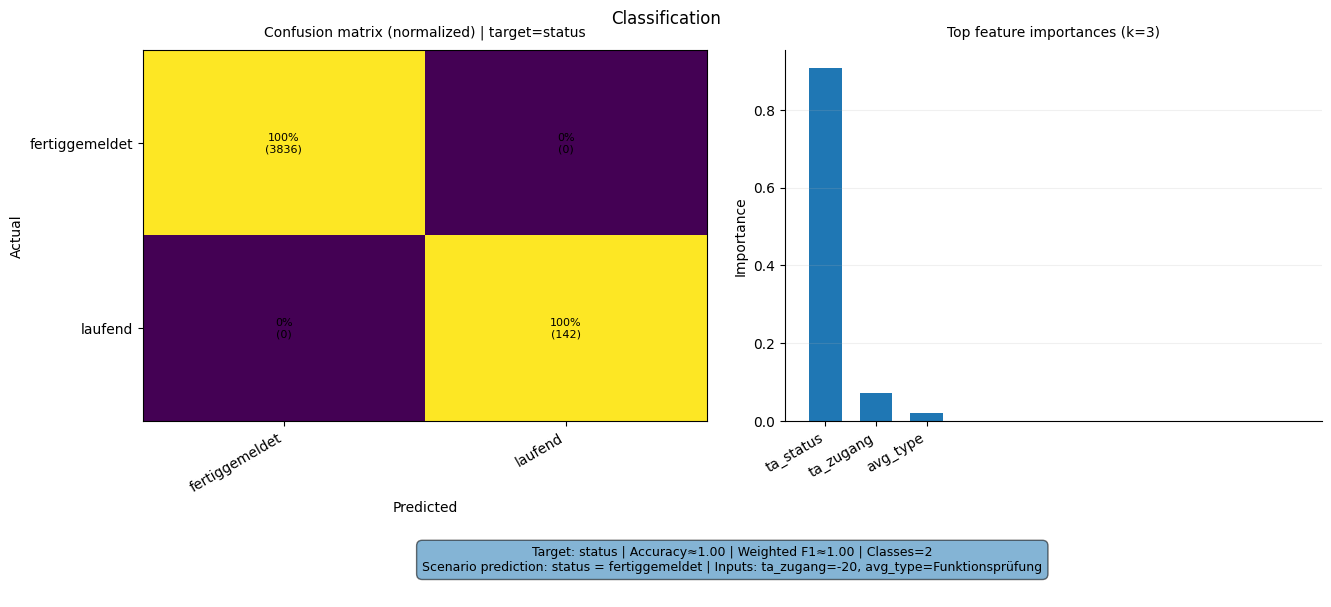


--- Summary ---
Generated analysis for: Predict a likely ta status when the operation startet 20 days early with a 'Funktionsprüfung'.

--- Output DF head() ---


ta_zugang   status
10        8.0  laufend
11       13.0  laufend
65       10.0  laufend
69       16.0  laufend
70        6.0  laufend


--- Run overview (inputs & key decisions) ---
Prompt: What ta status would you classify if the operation startet 20 days early with a 'Funktionsprüfung'?
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.95)
Filters: avg_type == Funktionsprüfung
Columns: ta_zugang, status
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


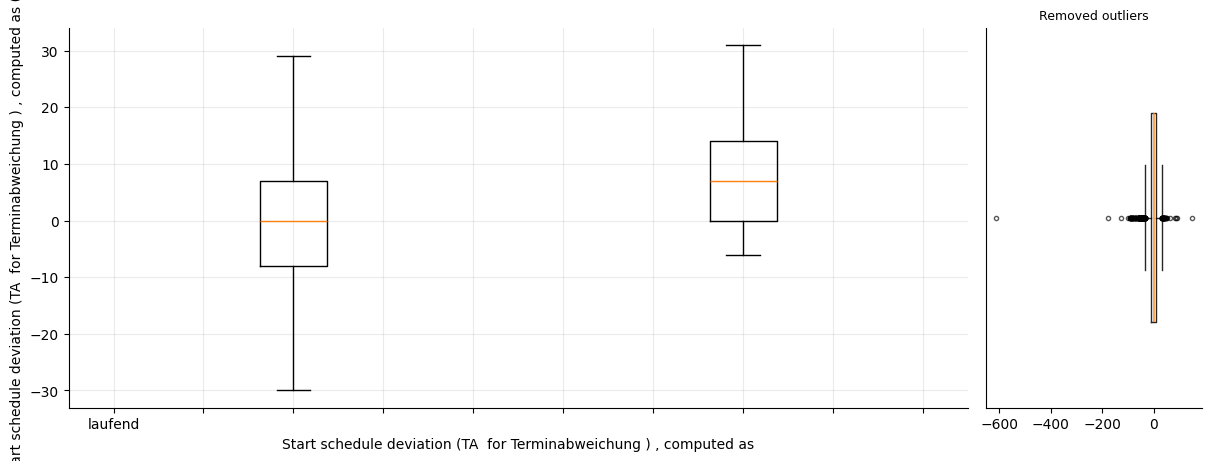


--- Summary ---
Computed distribution of ta_zugang (days): n=1882, mean≈-2.83, range≈[-614.00, 149.00].

--- Output DF head() ---


status            ta_status  ta_zugang
10  laufend  TA nicht erreichbar        8.0
11  laufend  TA nicht erreichbar       13.0
65  laufend  TA nicht erreichbar       10.0
69  laufend  TA nicht erreichbar       16.0
70  laufend  TA nicht erreichbar        6.0


--- Run overview (inputs & key decisions) ---
Prompt: Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.
Family: descriptive (confidence=0.35)
Type: group_compare (confidence=0.85)
Filters: avg_type == Funktionsprüfung
Columns: status, ta_status, ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


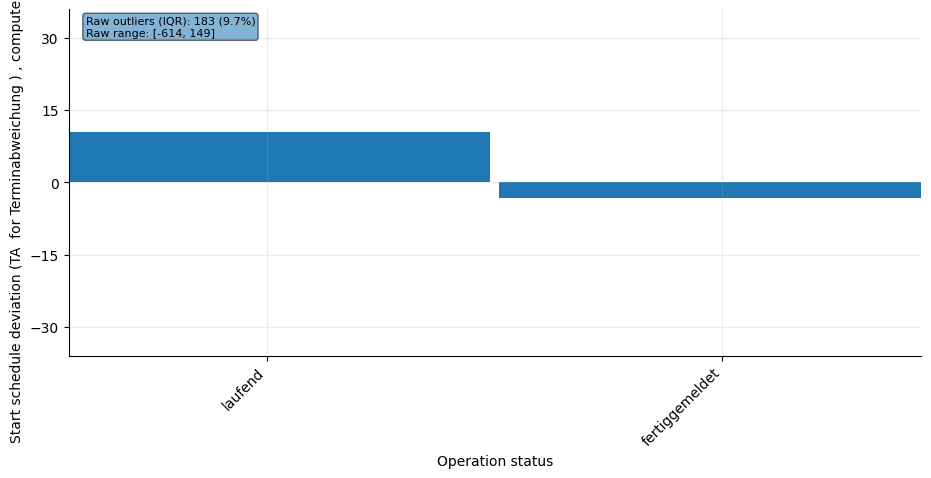


--- Summary ---
Generated analysis for: Given the operation startet 20 days early with a 'Funktionsprüfung', classify the most likely ta status.

--- Output DF head() ---


ist_dlz   status
0      NaN  laufend
1      NaN  laufend
2      NaN  laufend
3      NaN  laufend
4      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: How is the cycle time distributed for Profilschleifen across ta status categories?
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.95)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


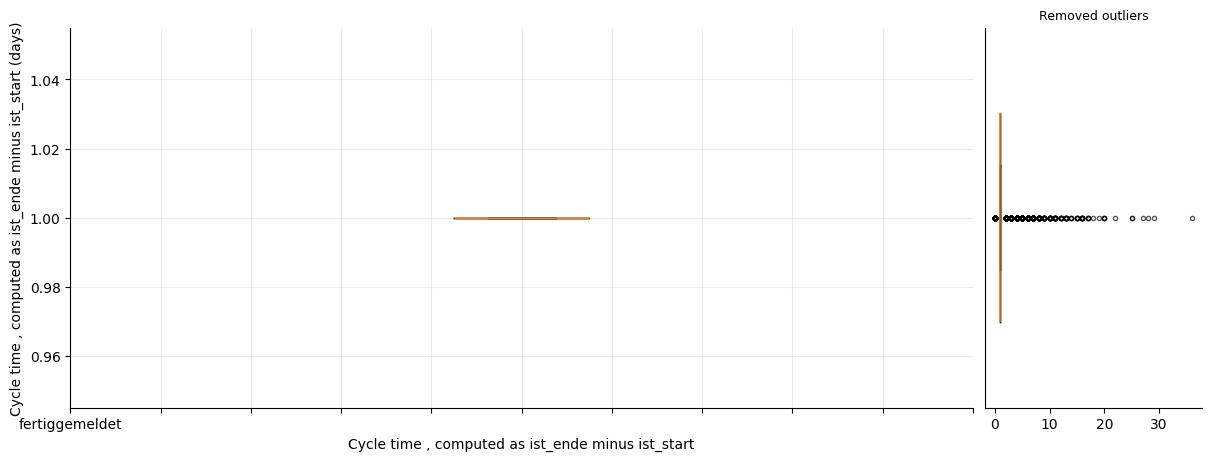


--- Summary ---
Computed distribution of ist_dlz (days): n=19164, mean≈1.13, range≈[0.00, 36.00].

--- Output DF head() ---


status            ta_status  ist_dlz
0  laufend  TA nicht erreichbar      NaN
1  laufend  TA nicht erreichbar      NaN
2  laufend  TA nicht erreichbar      NaN
3  laufend  TA nicht erreichbar      NaN
4  laufend  TA nicht erreichbar      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Show the distribution of cycle time for Profilschleifen across ta status categories.
Family: descriptive (confidence=0.93)
Type: group_compare (confidence=0.96)
Columns: status, ta_status, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


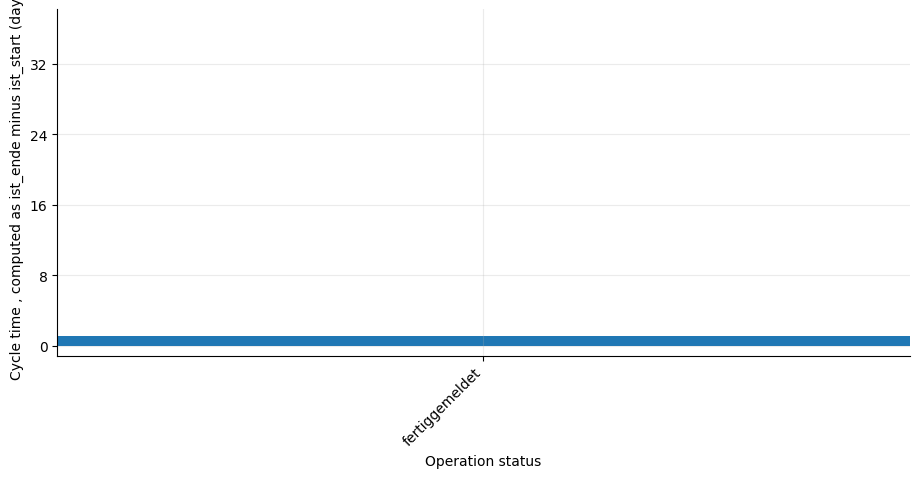


--- Summary ---
Generated analysis for: Show the distribution of cycle time for Profilschleifen across ta status categories.

--- Output DF head() ---


ist_dlz   status
0      NaN  laufend
1      NaN  laufend
2      NaN  laufend
3      NaN  laufend
4      NaN  laufend


--- Run overview (inputs & key decisions) ---
Prompt: Visualize how cycle time is distributed for Profilschleifen by ta status categories.
Family: descriptive (confidence=0.97)
Type: distribution (confidence=0.95)
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


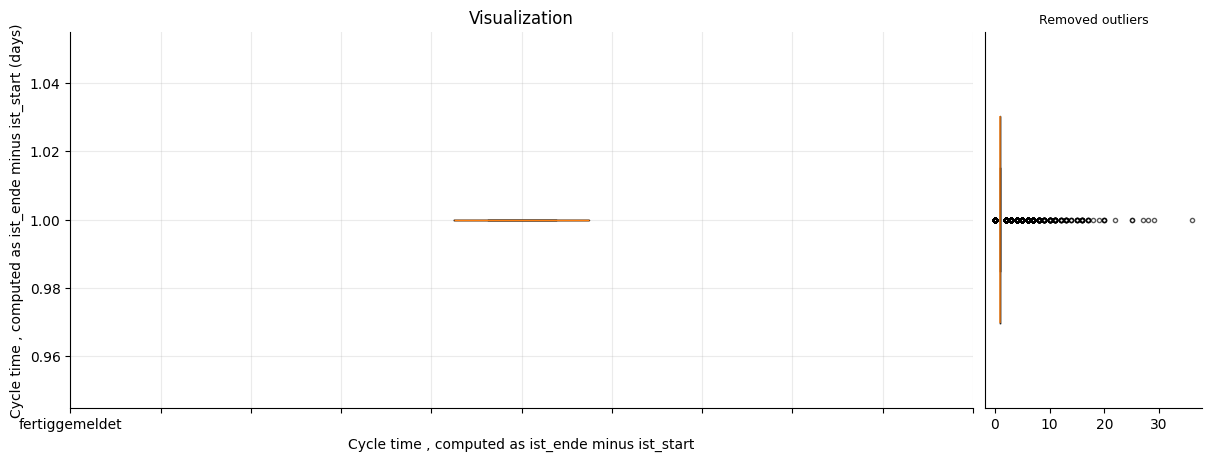


--- Summary ---
Computed distribution of ist_dlz (days): n=19164, mean≈1.13, range≈[0.00, 36.00].

--- Output DF head() ---


ist_dlz          status
381      1.0  fertiggemeldet
382      1.0  fertiggemeldet
383      1.0  fertiggemeldet
388      1.0  fertiggemeldet
434      1.0  fertiggemeldet


--- Run overview (inputs & key decisions) ---
Prompt: Plot cycle time distributions for Profilschleifen split by ta status categories.
Family: descriptive (confidence=0.95)
Type: distribution (confidence=0.98)
Filters: avg_type == Profilschleifen; status == fertiggemeldet
Columns: ist_dlz, status
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: block (confidence=1.0)

--- Plots ---


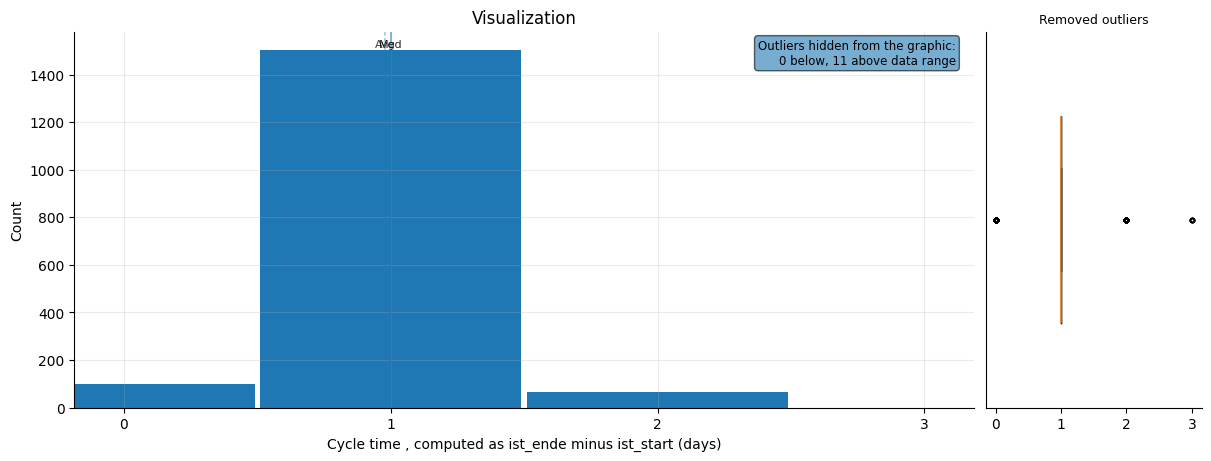


--- Summary ---
Computed distribution of ist_dlz (days): n=1681, mean≈0.99, range≈[0.00, 3.00].

--- Output DF head() ---


ta_abgang
358        0.0
359       -8.0
360      -13.0
361      -13.0
362       11.0


--- Run overview (inputs & key decisions) ---
Prompt: For Konstruktion operations, what are the main statistics about the end schedule deviation?
Family: descriptive (confidence=0.95)
Type: stats_summary (confidence=0.95)
Columns: ta_abgang
Prepare actions: Remove rows with missing required values (ta_abgang)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


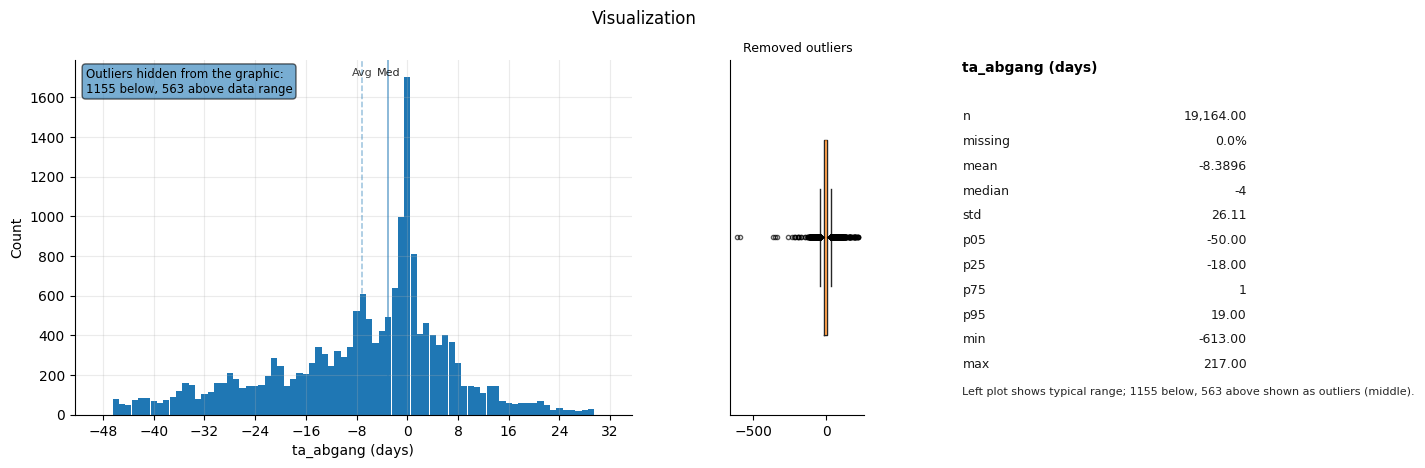


--- Summary ---
Generated analysis for: For Konstruktion operations, what are the main statistics about the end schedule deviation?.

--- Output DF head() ---


ta_abgang
358        0.0
359       -8.0
360      -13.0
361      -13.0
362       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Show the main statistics about the end schedule deviation for Konstruktion operations.
Family: descriptive (confidence=0.98)
Type: stats_summary (confidence=0.98)
Columns: ta_abgang
Prepare actions: Remove rows with missing required values (ta_abgang)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


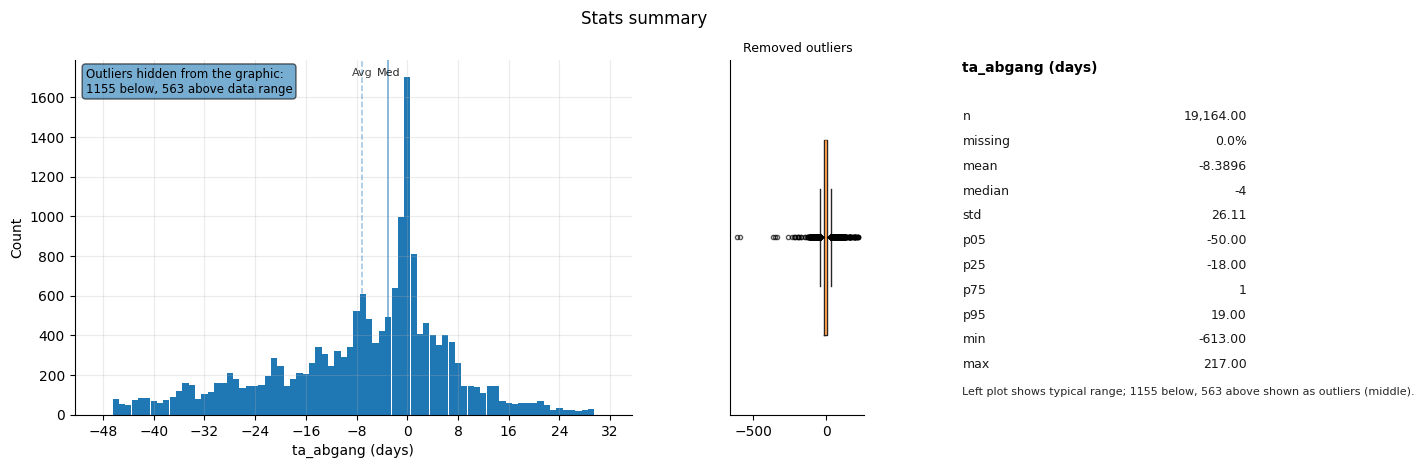


--- Summary ---
Operations finish early on average by 8 days, but with significant variability. Most deviations range from finishing 50 days early to 19 days late. Typical range spans early (50 days) to late (19 days). Average finish deviation: 8 days early. Konstruktion-specific filter was not applied.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Provide summary statistics of end schedule deviation for Konstruktion operations.
Family: descriptive (confidence=0.98)
Type: stats_summary (confidence=0.98)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


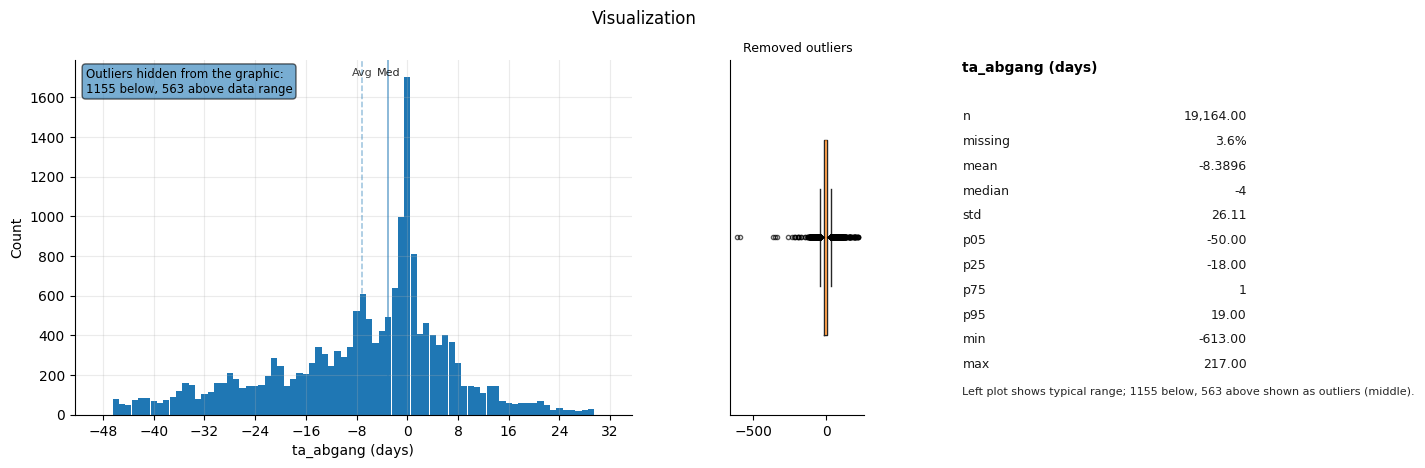


--- Summary ---
End schedule deviations for operations average 8 days early, with most finishing between 50 days early and 19 days late. Extreme cases range from 613 days early to 217 days late. Typical range: 50 days early to 19 days late. Average finish is 8 days ahead of plan. Verify data quality for distortion risks.

--- Output DF head() ---


ta_abgang
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Report the key descriptive statistics for end schedule deviation in Konstruktion operations.
Family: descriptive (confidence=0.97)
Type: stats_summary (confidence=0.98)
Columns: ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


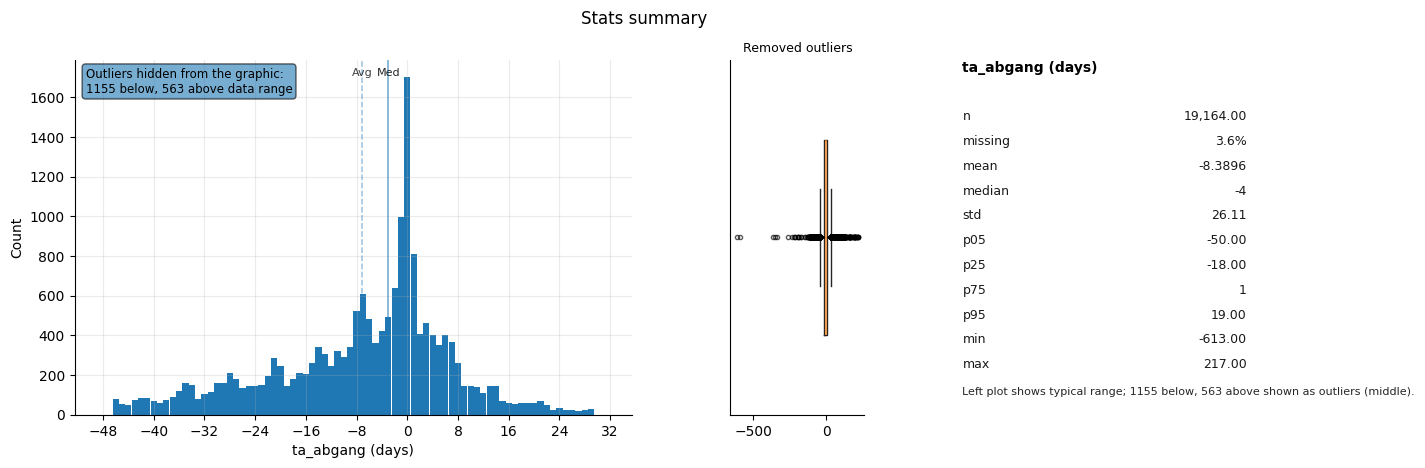


--- Summary ---
Generated analysis for: Report the key descriptive statistics for end schedule deviation in Konstruktion operations.

--- Output DF head() ---


resource_group  ta_abgang
358           Sägen        0.0
359       Erodieren       -8.0
360  Drahtschneiden      -13.0
361  Drahtschneiden      -13.0
362              RP       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Which resource groups drive the end-date deviation the most?
Family: diagnostic (confidence=0.95)
Type: variance_decomposition (confidence=0.95)
Filters: status == fertiggemeldet
Columns: resource_group, ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


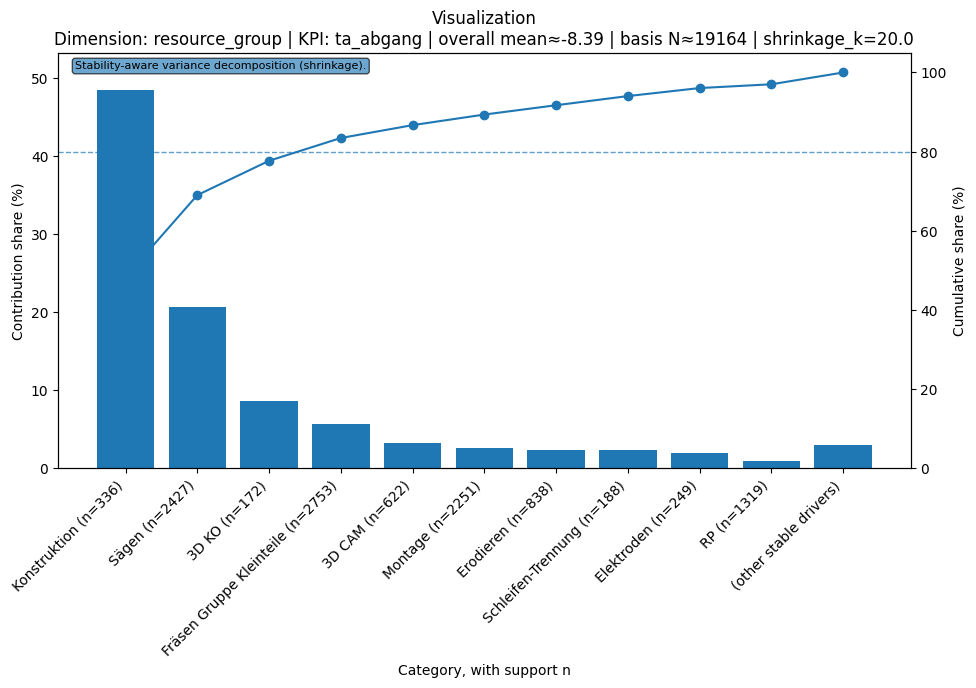


--- Summary ---
Generated analysis for: Which resource groups drive the end-date deviation the most?.

--- Output DF head() ---


resource_group  ta_abgang
0                        RP        NaN
1  Fräsen Gruppe Kleinteile        NaN
2                    3D CAM        NaN
3              Konstruktion        NaN
4                        RP        NaN


--- Run overview (inputs & key decisions) ---
Prompt: Identify which resource groups drive end-date deviation the most.
Family: diagnostic (confidence=0.95)
Type: variance_decomposition (confidence=0.95)
Columns: resource_group, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


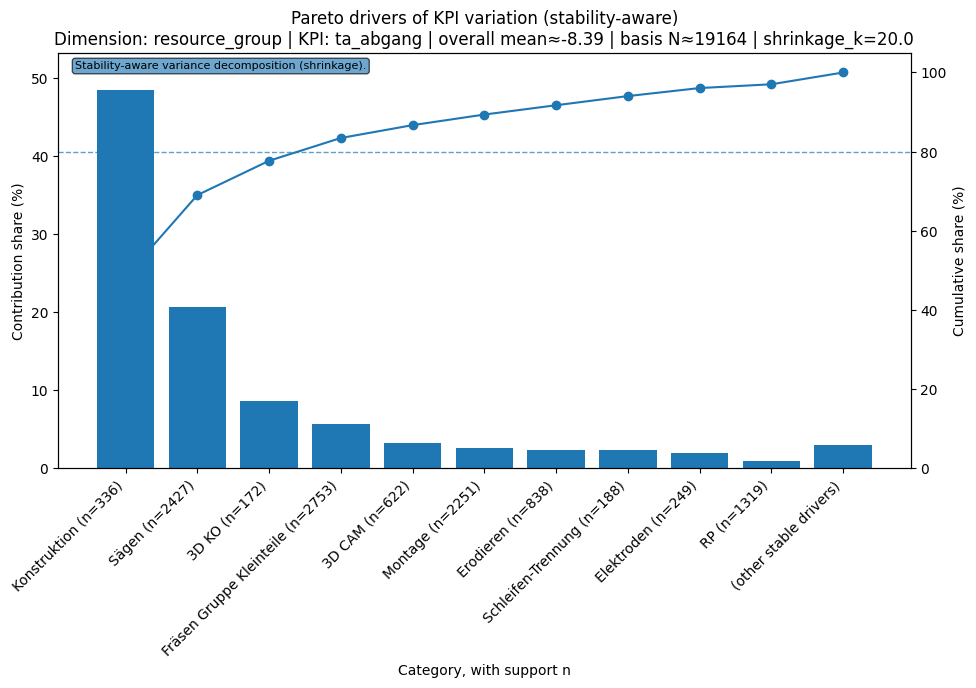


--- Summary ---
Generated analysis for: Identify which resource groups drive end-date deviation the most.

--- Output DF head() ---


resource_group  ta_abgang
358           Sägen        0.0
359       Erodieren       -8.0
360  Drahtschneiden      -13.0
361  Drahtschneiden      -13.0
362              RP       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Which resource groups have the strongest impact on end-date deviation?
Family: diagnostic (confidence=0.90)
Type: variance_decomposition (confidence=0.90)
Filters: status == fertiggemeldet
Columns: resource_group, ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: block (confidence=1.0)

--- Plots ---


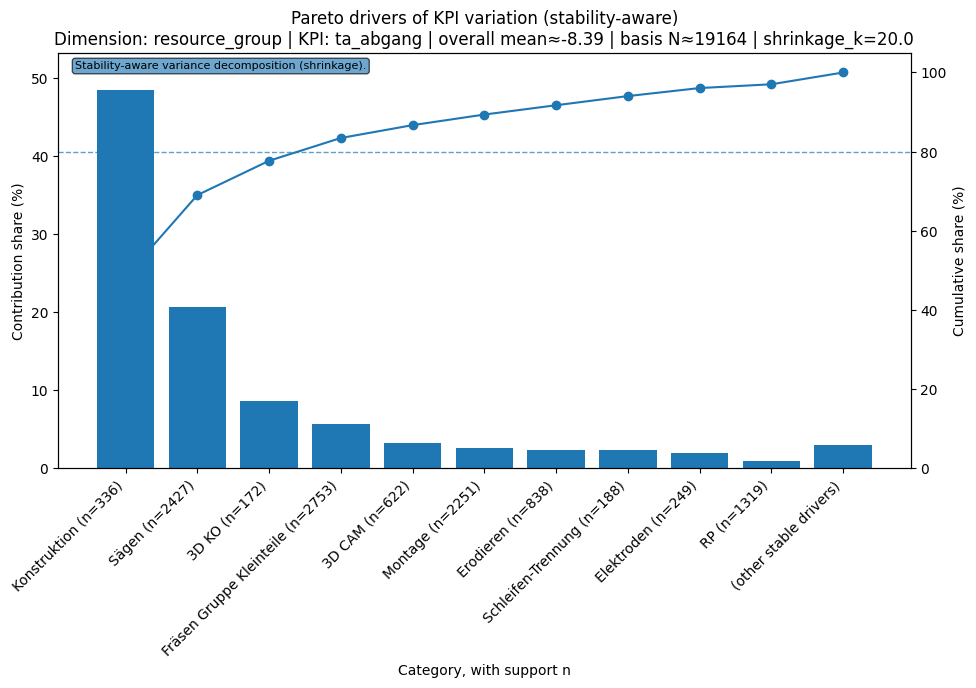


--- Summary ---
Generated analysis for: Which resource groups have the strongest impact on end-date deviation?.

--- Output DF head() ---


ta_abgang
358        0.0
359       -8.0
360      -13.0
361      -13.0
362       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Show the resource groups with the biggest contribution to end-date deviation.
Family: diagnostic (confidence=0.95)
Type: variance_decomposition (confidence=0.95)
Filters: status == fertiggemeldet
Columns: ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Show the resource groups with the biggest contribution to end-date deviation.
[ERROR] block 24 base: cannot convert the series to <class 'float'>
[ERROR] block 24 alt1: cannot convert the series to <class 'float'>
[ERROR] block 24 alt2: cannot convert the series to <class 'float'>

--- Output DF head() ---


time_bucket  average_ta_rel  n_records
0  2023-08-07        1.000000          1
1  2023-08-14        1.000000          1
2  2023-08-21       -6.500000          2
3  2024-01-22       -1.000000          1
4  2024-01-29       -1.666667          3


--- Run overview (inputs & key decisions) ---
Prompt: Estimate weekly average Lead-time deviation across the next 16 weeks.
Family: predictive (confidence=0.98)
Type: forecasting (confidence=0.95)
Filters: status == fertiggemeldet
Columns: ist_ende, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: time=ist_ende/week; metrics=[average_ta_rel(mean:ta_rel), n_records=count]
Verify status: warn (confidence=0.4)

--- Plots ---


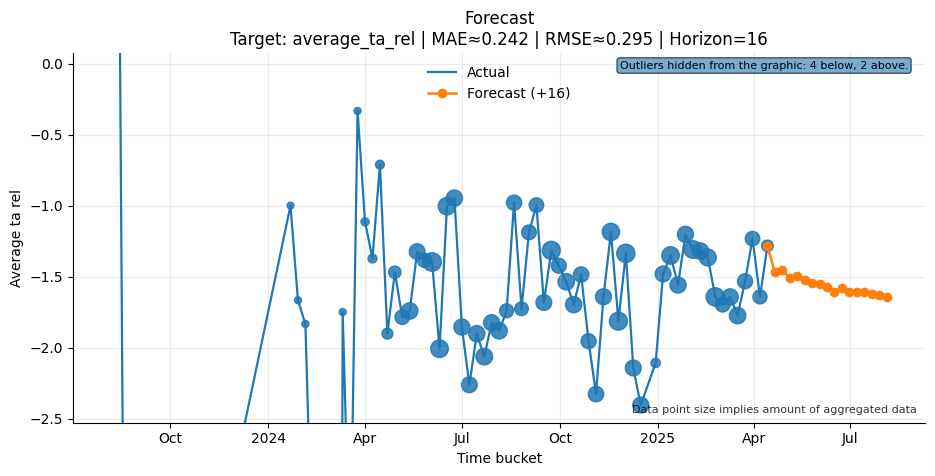


--- Summary ---
Generated analysis for: Estimate weekly average Lead-time deviation across the next 16 weeks.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
358        0.0      1.0       -1.0     1.0
359       -8.0      1.0       -2.0    -6.0
360      -13.0      1.0       -2.0   -11.0
361      -13.0      1.0       -2.0   -11.0
362       11.0      1.0       10.0     1.0


--- Run overview (inputs & key decisions) ---
Prompt: Which resource group should we route to to minimize end deviation?
Family: prescriptive (confidence=0.95)
Type: candidate_ranking (confidence=0.95)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Remove rows with missing required values (ta_abgang, ist_dlz, ta_rel)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Which resource group should we route to to minimize end deviation?.

--- Output DF head() ---


resource_group  ta_abgang
358           Sägen        0.0
359       Erodieren       -8.0
360  Drahtschneiden      -13.0
361  Drahtschneiden      -13.0
362              RP       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Recommend which resource group to route to in order to minimize end deviation.
Family: prescriptive (confidence=0.95)
Type: candidate_ranking (confidence=0.95)
Filters: status == fertiggemeldet
Columns: resource_group, ta_abgang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


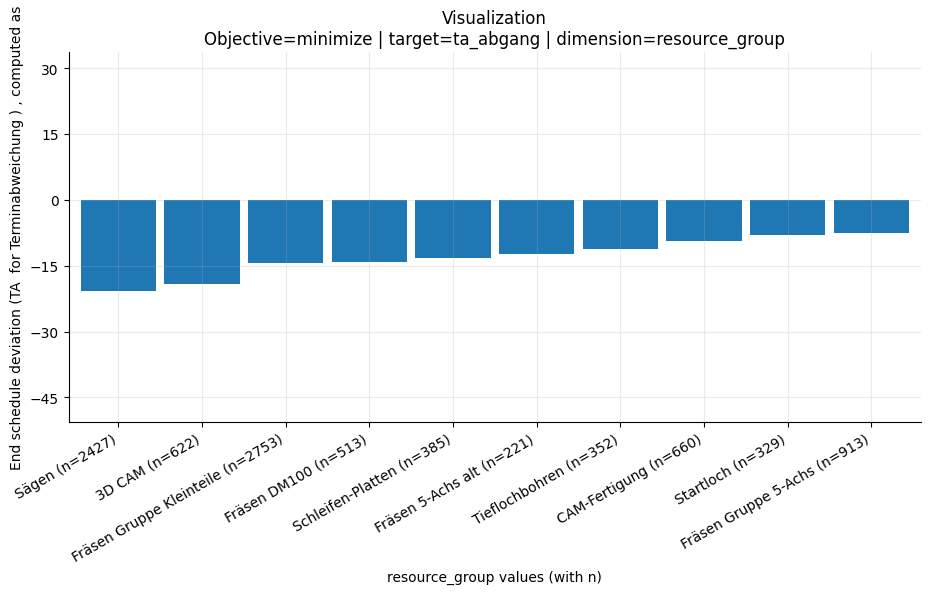


--- Summary ---
Generated analysis for: Recommend which resource group to route to in order to minimize end deviation.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Which resource group would best minimize end deviation if we route work there?
Family: prescriptive (confidence=0.95)
Type: candidate_ranking (confidence=0.95)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: block (confidence=1.0)

--- Summary ---
Generated analysis for: Which resource group would best minimize end deviation if we route work there?.

--- Output DF head() ---


resource_group  ta_abgang
358           Sägen        0.0
359       Erodieren       -8.0
360  Drahtschneiden      -13.0
361  Drahtschneiden      -13.0
362              RP       11.0


--- Run overview (inputs & key decisions) ---
Prompt: Suggest a resource group to route to so that end deviation is minimized.
Family: prescriptive (confidence=0.90)
Type: candidate_ranking (confidence=0.95)
Filters: status == fertiggemeldet
Columns: resource_group, ta_abgang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


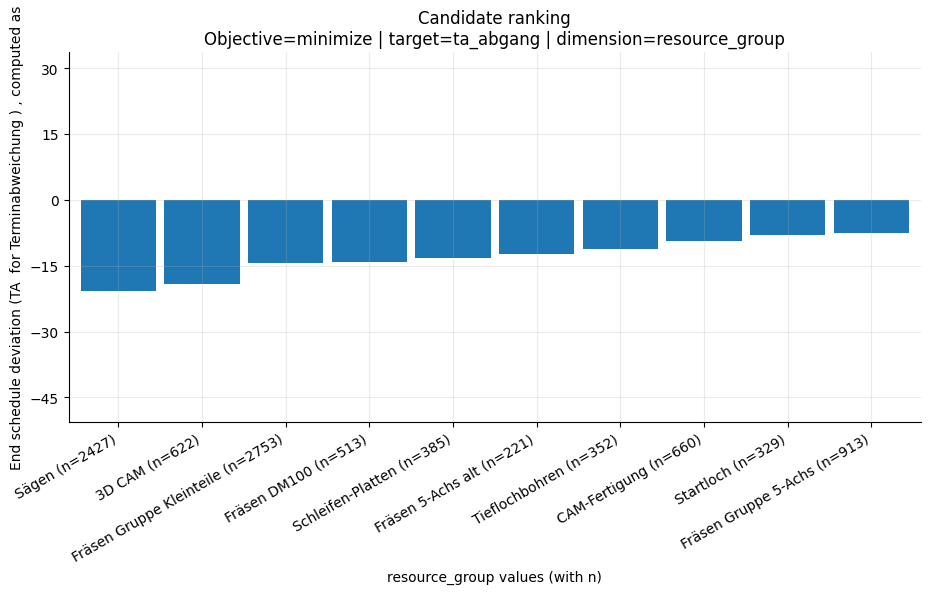


--- Summary ---
Generated analysis for: Suggest a resource group to route to so that end deviation is minimized.

--- Output DF head() ---


avg_type  ist_dlz
358  Rohmaterial auf Länge sägen      1.0
359           Senkerodieren fein      1.0
360                Konturschnitt      1.0
361                Konturschnitt      1.0
362            Baujob überwachen      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Which operation type would be best for low cycle times?
Family: prescriptive (confidence=0.90)
Type: candidate_ranking (confidence=0.95)
Filters: status == fertiggemeldet
Columns: avg_type, ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Which operation type would be best for low cycle times?.

--- Output DF head() ---


avg_type  ist_dlz
358  Rohmaterial auf Länge sägen      1.0
359           Senkerodieren fein      1.0
360                Konturschnitt      1.0
361                Konturschnitt      1.0
362            Baujob überwachen      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Identify the operation type that is best for low cycle times.
Family: descriptive (confidence=1.00)
Type: group_compare (confidence=0.95)
Filters: status == fertiggemeldet
Columns: avg_type, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Identify the operation type that is best for low cycle times.

--- Output DF head() ---


avg_type  ta_abgang  ist_dlz
358  Rohmaterial auf Länge sägen        0.0      1.0
359           Senkerodieren fein       -8.0      1.0
360                Konturschnitt      -13.0      1.0
361                Konturschnitt      -13.0      1.0
362            Baujob überwachen       11.0      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Which operation type tends to give the lowest cycle times?
Family: descriptive (confidence=0.95)
Type: group_compare (confidence=0.98)
Filters: status == fertiggemeldet
Columns: avg_type, ta_abgang, ist_dlz
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Which operation type tends to give the lowest cycle times?.

--- Output DF head() ---


avg_type  ta_abgang  ist_dlz
0           Bauraum prüfen        NaN      NaN
1  Kleinbauteile schruppen        NaN      NaN
2               NC-Ausgabe        NaN      NaN
3     CAD-Modell erstellen        NaN      NaN
4        Baujob überwachen        NaN      NaN


--- Run overview (inputs & key decisions) ---
Prompt: Recommend an operation type for achieving low cycle times.
Family: prescriptive (confidence=0.98)
Type: candidate_ranking (confidence=0.95)
Columns: avg_type, ta_abgang, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Summary ---
Generated analysis for: Recommend an operation type for achieving low cycle times.

--- Output DF head() ---


pps_order_id pps_order_pos_id            resource_group plan_start  \
0   7012227003                5                        RP 2025-04-23   
1   7012227003               10  Fräsen Gruppe Kleinteile 2025-04-24   
2   7012227006               70                    3D CAM 2025-04-28   
3    510037002               10              Konstruktion 2025-02-13   
4    701219706              120                        RP 2025-04-30   

   ist_start  plan_ende ist_ende   status                 avg_type  ist_dlz  \
0 2025-05-12 2025-04-24      NaT  laufend           Bauraum prüfen      NaN   
1 2025-05-11 2025-04-30      NaT  laufend  Kleinbauteile schruppen      NaN   
2 2025-05-11 2025-04-29      NaT  laufend               NC-Ausgabe      NaN   
3 2025-05-09 2025-02-14      NaT  laufend     CAD-Modell erstellen      NaN   
4 2025-05-08 2025-04-30      NaT  laufend        Baujob überwachen      NaN   

   ta_zugang  ta_abgang  ta_rel            ta_status  
0       19.0        NaN     NaN  TA nicht erreichbar  
1       17.0        NaN     NaN  TA nicht erreichbar  
2       13.0        NaN     NaN  TA nicht erreichbar  
3       85.0        NaN     NaN  TA nicht erreichbar  
4        8.0        NaN     NaN  TA nicht erreichbar


--- Run overview (inputs & key decisions) ---
Prompt: I want to improve cycle time (lower is better). What can I do? Show me decision options.
Family: prescriptive (confidence=0.95)
Type: decision_formulation (confidence=0.92)
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none
Verify status: warn (confidence=0.5)

--- Plots ---


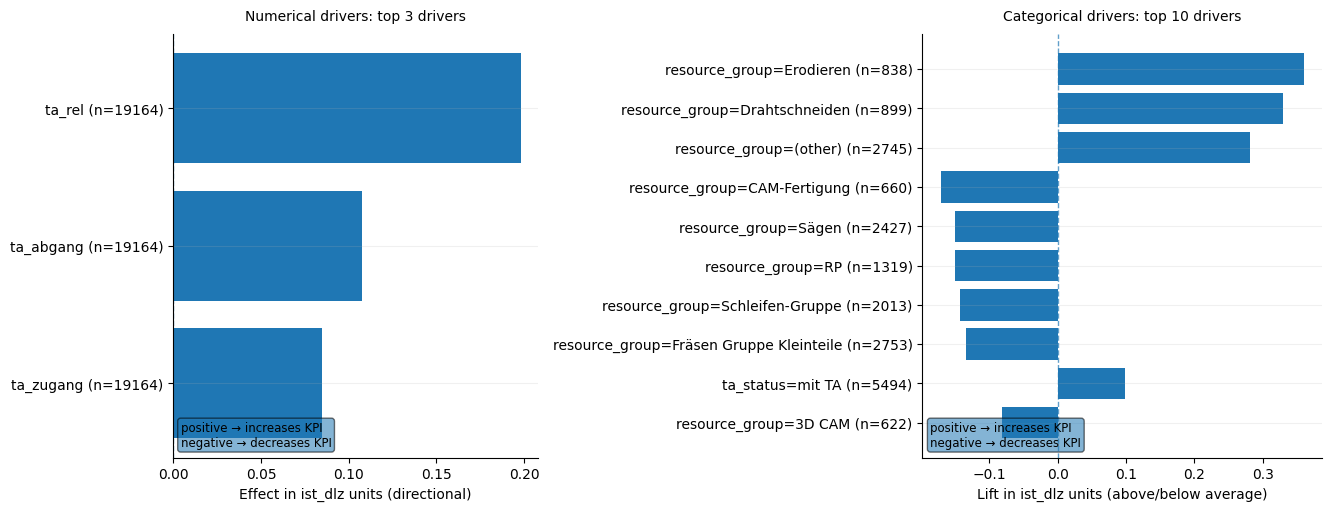


--- Summary ---
Generated analysis for: I want to improve cycle time (lower is better). What can I do? Show me decision options.

--- Output DF head() ---


pps_order_id pps_order_pos_id            resource_group plan_start  \
0   7012227003                5                        RP 2025-04-23   
1   7012227003               10  Fräsen Gruppe Kleinteile 2025-04-24   
2   7012227006               70                    3D CAM 2025-04-28   
3    510037002               10              Konstruktion 2025-02-13   
4    701219706              120                        RP 2025-04-30   

   ist_start  plan_ende ist_ende   status                 avg_type  ist_dlz  \
0 2025-05-12 2025-04-24      NaT  laufend           Bauraum prüfen      NaN   
1 2025-05-11 2025-04-30      NaT  laufend  Kleinbauteile schruppen      NaN   
2 2025-05-11 2025-04-29      NaT  laufend               NC-Ausgabe      NaN   
3 2025-05-09 2025-02-14      NaT  laufend     CAD-Modell erstellen      NaN   
4 2025-05-08 2025-04-30      NaT  laufend        Baujob überwachen      NaN   

   ta_zugang  ta_abgang  ta_rel            ta_status  
0       19.0        NaN     NaN  TA nicht erreichbar  
1       17.0        NaN     NaN  TA nicht erreichbar  
2       13.0        NaN     NaN  TA nicht erreichbar  
3       85.0        NaN     NaN  TA nicht erreichbar  
4        8.0        NaN     NaN  TA nicht erreichbar


--- Run overview (inputs & key decisions) ---
Prompt: I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.
Family: prescriptive (confidence=1.00)
Type: decision_formulation (confidence=0.95)
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none
Verify status: warn (confidence=0.5)

--- Plots ---


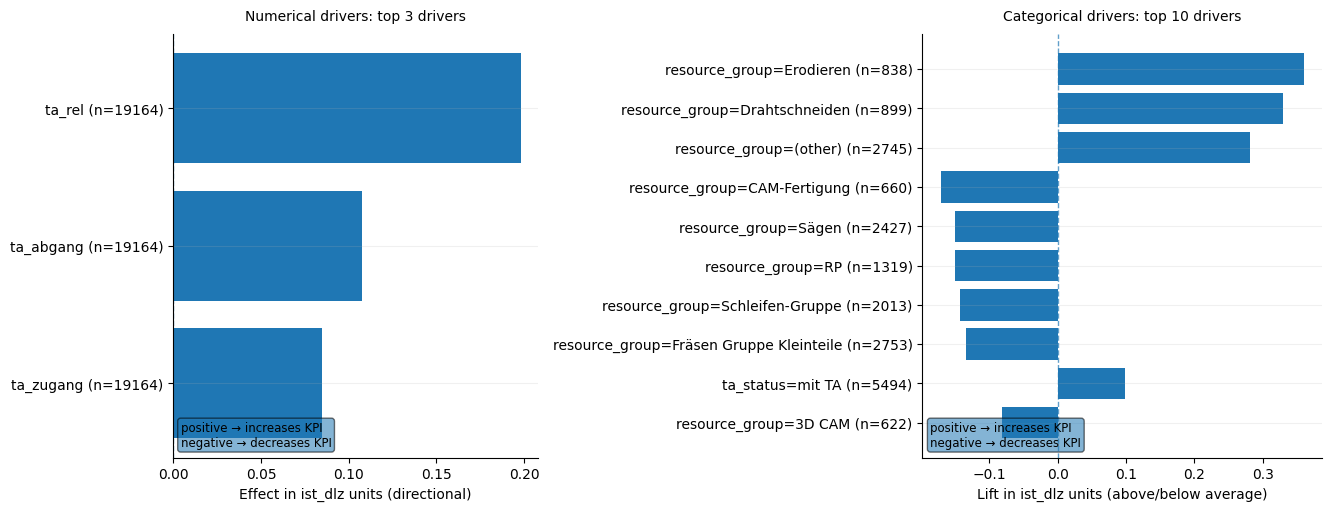


--- Summary ---
Generated analysis for: I want to improve cycle time (lower is better). What decisions can I make? Show me decision options.

--- Output DF head() ---


pps_order_id pps_order_pos_id  resource_group plan_start  ist_start  \
358    701219706               10           Sägen 2025-04-16 2025-04-15   
359   7012086031               90       Erodieren 2025-04-17 2025-04-15   
360   7012086041               70  Drahtschneiden 2025-04-17 2025-04-15   
361   7012086043               70  Drahtschneiden 2025-04-17 2025-04-15   
362    510135008               40              RP 2025-04-04 2025-04-14   

     plan_ende   ist_ende          status                     avg_type  \
358 2025-04-16 2025-04-16  fertiggemeldet  Rohmaterial auf Länge sägen   
359 2025-04-24 2025-04-16  fertiggemeldet           Senkerodieren fein   
360 2025-04-29 2025-04-16  fertiggemeldet                Konturschnitt   
361 2025-04-29 2025-04-16  fertiggemeldet                Konturschnitt   
362 2025-04-04 2025-04-15  fertiggemeldet            Baujob überwachen   

     ist_dlz  ta_zugang  ta_abgang  ta_rel ta_status  
358      1.0       -1.0        0.0     1.0   ohne TA  
359      1.0       -2.0       -8.0    -6.0   ohne TA  
360      1.0       -2.0      -13.0   -11.0   ohne TA  
361      1.0       -2.0      -13.0   -11.0   ohne TA  
362      1.0       10.0       11.0     1.0    mit TA


--- Run overview (inputs & key decisions) ---
Prompt: To improve cycle time (lower is better), what can I do? Please show decision options.
Family: prescriptive (confidence=0.97)
Type: decision_formulation (confidence=0.95)
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces); Remove rows with missing required values (ist_ende)
Aggregate: none
Verify status: warn (confidence=0.5)

--- Plots ---


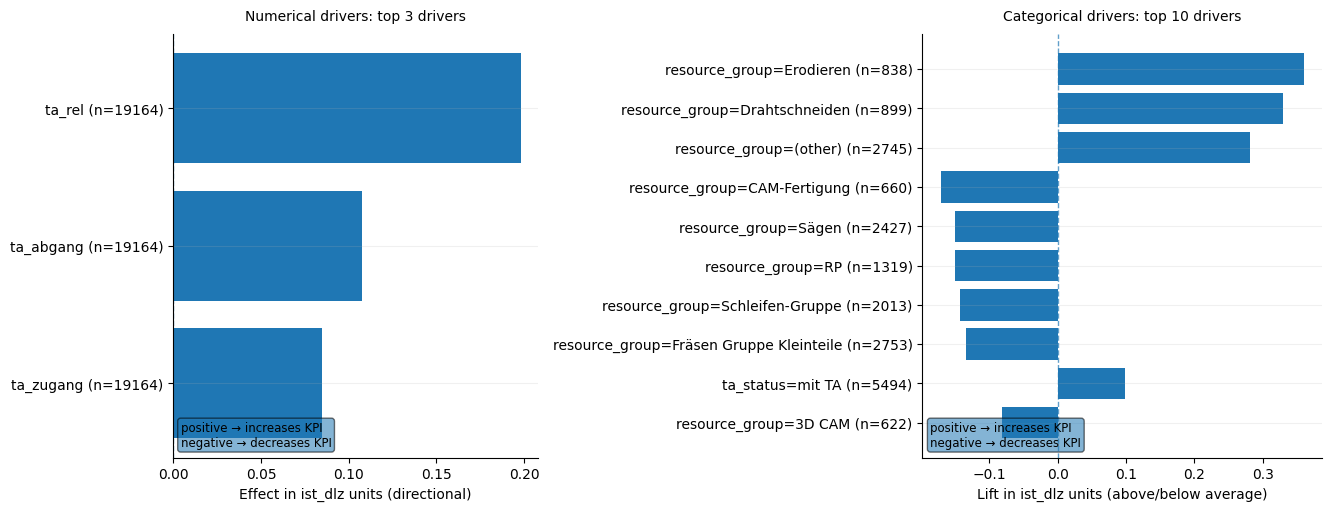


--- Summary ---
Generated analysis for: To improve cycle time (lower is better), what can I do? Please show decision options.

--- Output DF head() ---


pps_order_id pps_order_pos_id            resource_group plan_start  \
0   7012227003                5                        RP 2025-04-23   
1   7012227003               10  Fräsen Gruppe Kleinteile 2025-04-24   
2   7012227006               70                    3D CAM 2025-04-28   
3    510037002               10              Konstruktion 2025-02-13   
4    701219706              120                        RP 2025-04-30   

   ist_start  plan_ende ist_ende   status                 avg_type  ist_dlz  \
0 2025-05-12 2025-04-24      NaT  laufend           Bauraum prüfen      NaN   
1 2025-05-11 2025-04-30      NaT  laufend  Kleinbauteile schruppen      NaN   
2 2025-05-11 2025-04-29      NaT  laufend               NC-Ausgabe      NaN   
3 2025-05-09 2025-02-14      NaT  laufend     CAD-Modell erstellen      NaN   
4 2025-05-08 2025-04-30      NaT  laufend        Baujob überwachen      NaN   

   ta_zugang  ta_abgang  ta_rel            ta_status  
0       19.0        NaN     NaN  TA nicht erreichbar  
1       17.0        NaN     NaN  TA nicht erreichbar  
2       13.0        NaN     NaN  TA nicht erreichbar  
3       85.0        NaN     NaN  TA nicht erreichbar  
4        8.0        NaN     NaN  TA nicht erreichbar


--- Run overview (inputs & key decisions) ---
Prompt: I want lower cycle time (lower is better). Show me decision options to achieve that.
Family: prescriptive (confidence=0.95)
Type: decision_formulation (confidence=0.95)
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none
Verify status: warn (confidence=0.5)

--- Plots ---


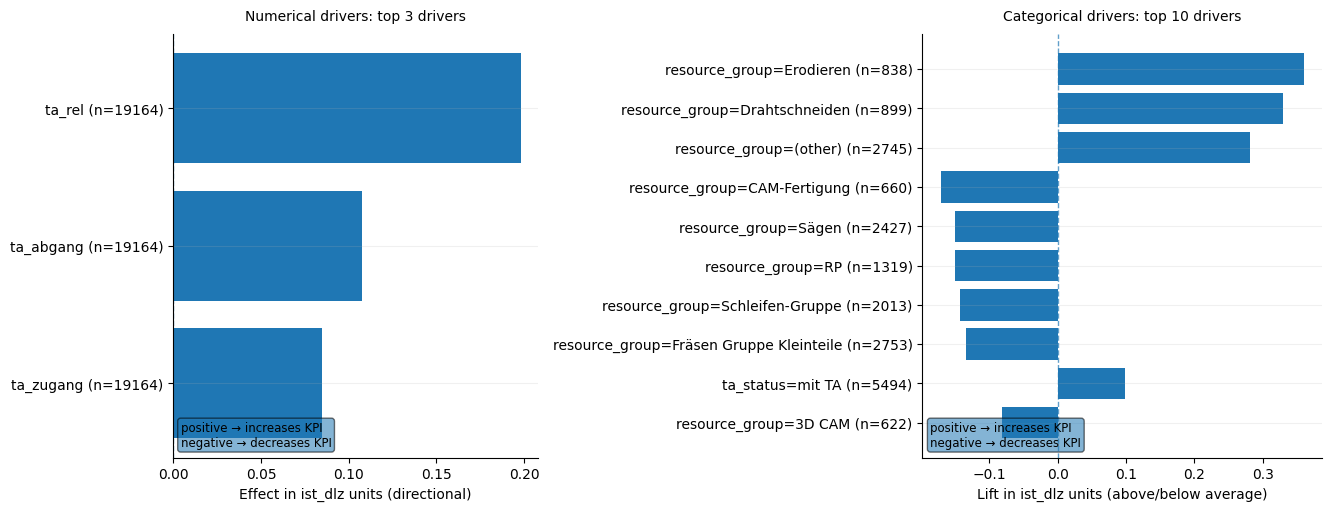


--- Summary ---
Generated analysis for: I want lower cycle time (lower is better). Show me decision options to achieve that.

--- Output DF head() ---


resource_group                 avg_type  ta_zugang
0                        RP           Bauraum prüfen       19.0
1  Fräsen Gruppe Kleinteile  Kleinbauteile schruppen       17.0
2                    3D CAM               NC-Ausgabe       13.0
3              Konstruktion     CAD-Modell erstellen       85.0
4                        RP        Baujob überwachen        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: I want to decrease start deviation. What do I need to work on?
Family: diagnostic (confidence=0.95)
Type: anomaly_explanation (confidence=0.88)
Filters: status == laufend
Columns: resource_group, avg_type, ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.4)

--- Plots ---


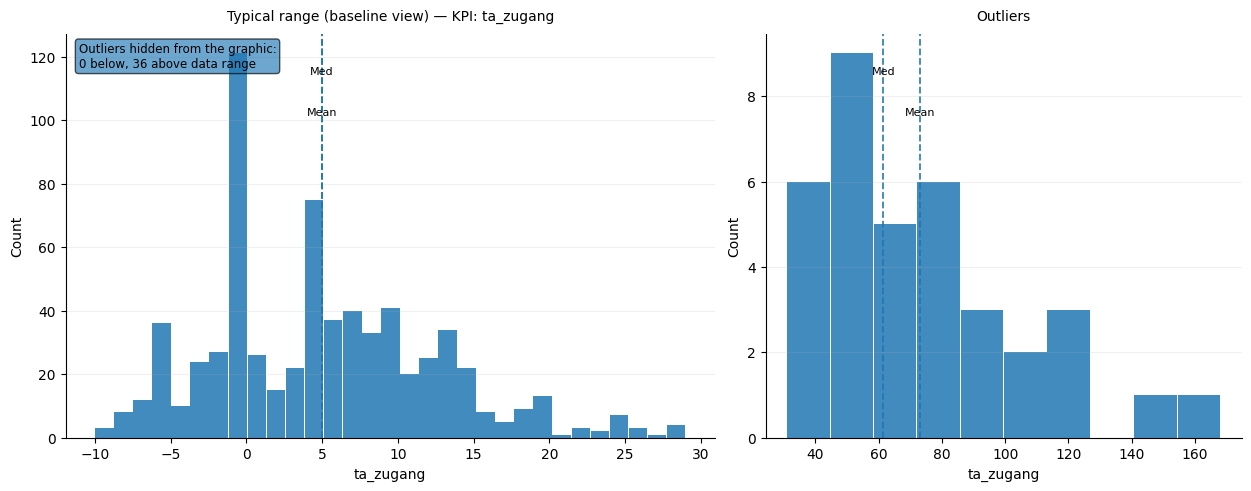

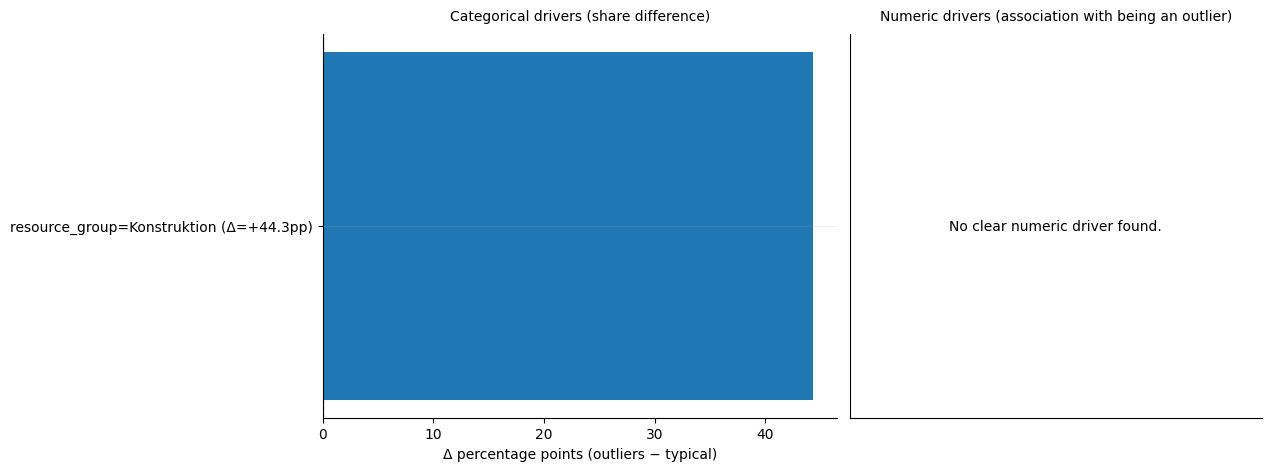


--- Summary ---
Generated analysis for: For unfinshed operations: I want to decrease start deviation. What do I need to work on?.

--- Output DF head() ---


resource_group plan_start  ist_start  plan_ende  ta_zugang
0                        RP 2025-04-23 2025-05-12 2025-04-24       19.0
1  Fräsen Gruppe Kleinteile 2025-04-24 2025-05-11 2025-04-30       17.0
2                    3D CAM 2025-04-28 2025-05-11 2025-04-29       13.0
3              Konstruktion 2025-02-13 2025-05-09 2025-02-14       85.0
4                        RP 2025-04-30 2025-05-08 2025-04-30        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations, what should I work on to decrease start deviation?
Family: diagnostic (confidence=0.95)
Type: variance_decomposition (confidence=0.55)
Filters: status != fertiggemeldet
Columns: resource_group, plan_start, ist_start, plan_ende, ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


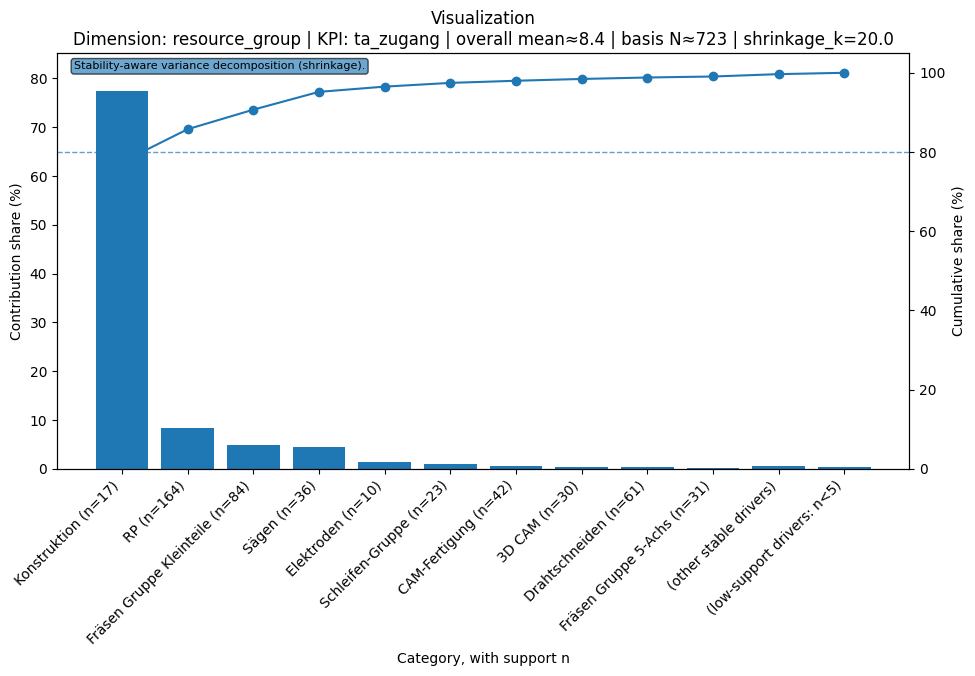


--- Summary ---
Generated analysis for: For unfinshed operations, what should I work on to decrease start deviation?.

--- Output DF head() ---


resource_group                 avg_type  ta_zugang
0                        RP           Bauraum prüfen       19.0
1  Fräsen Gruppe Kleinteile  Kleinbauteile schruppen       17.0
2                    3D CAM               NC-Ausgabe       13.0
3              Konstruktion     CAD-Modell erstellen       85.0
4                        RP        Baujob überwachen        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: identify what I need to improve to decrease start deviation.
Family: diagnostic (confidence=0.95)
Type: anomaly_explanation (confidence=0.88)
Filters: status == laufend
Columns: resource_group, avg_type, ta_zugang
Prepare actions: none
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


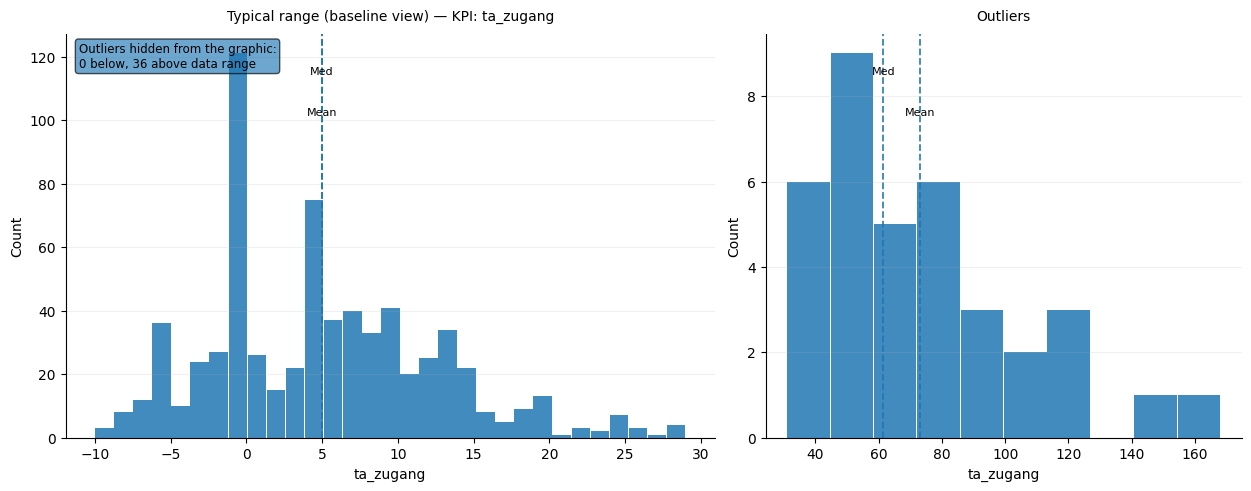

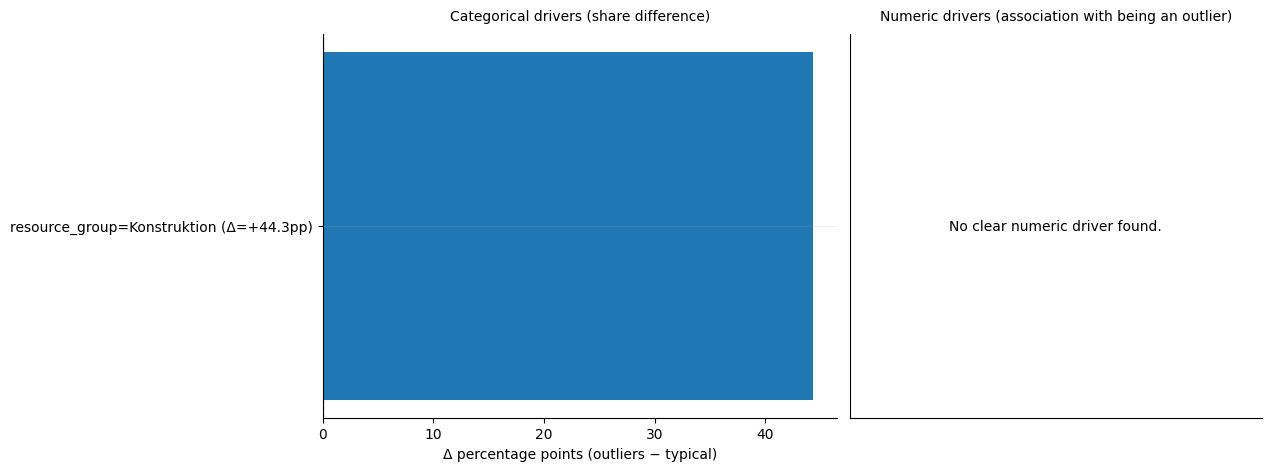


--- Summary ---
Generated analysis for: For unfinshed operations: identify what I need to improve to decrease start deviation.

--- Output DF head() ---


resource_group                 avg_type  ta_zugang
0                        RP           Bauraum prüfen       19.0
1  Fräsen Gruppe Kleinteile  Kleinbauteile schruppen       17.0
2                    3D CAM               NC-Ausgabe       13.0
3              Konstruktion     CAD-Modell erstellen       85.0
4                        RP        Baujob überwachen        8.0


--- Run overview (inputs & key decisions) ---
Prompt: For unfinshed operations: show the main levers to decrease start deviation.
Family: diagnostic (confidence=0.95)
Type: anomaly_explanation (confidence=0.88)
Filters: status == laufend
Columns: resource_group, avg_type, ta_zugang
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


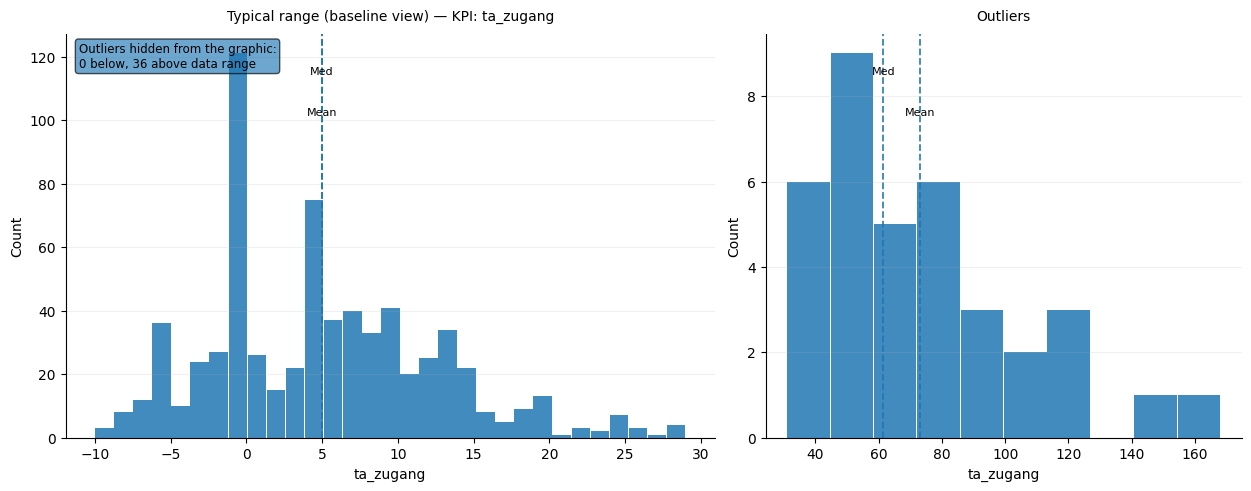

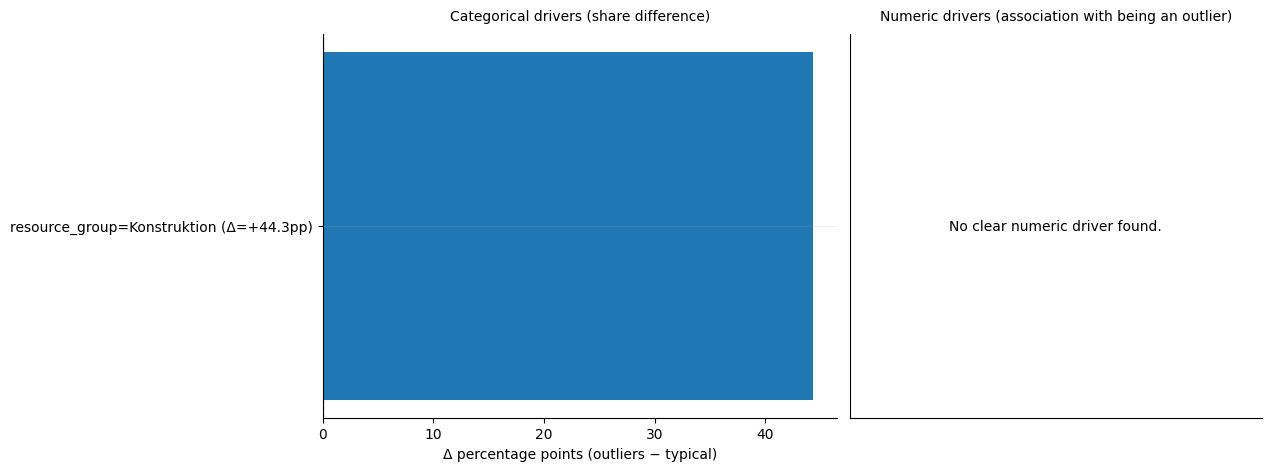


--- Summary ---
Generated analysis for: For unfinshed operations: show the main levers to decrease start deviation.


C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has featur


--- Output DF head() ---


resource_group  ist_dlz
358           Sägen      1.0
359       Erodieren      1.0
360  Drahtschneiden      1.0
361  Drahtschneiden      1.0
362              RP      1.0


--- Run overview (inputs & key decisions) ---
Prompt: Could I improve average cycle time if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?
Family: prescriptive (confidence=0.95)
Type: scenario_evaluation (confidence=0.95)
Filters: status == fertiggemeldet
Columns: resource_group, ist_dlz
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


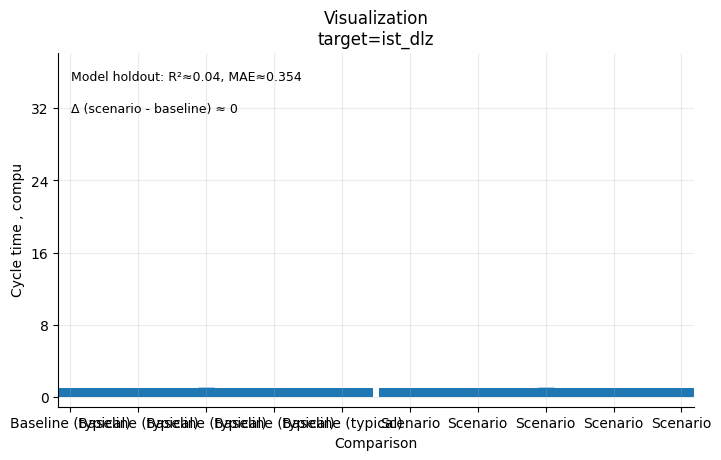


--- Summary ---
Generated analysis for: Could I improve average cycle time if I use '3D CAM' as a substitute for ‘CAM-Fertigung’?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Would average cycle time improve if I use '3D CAM' as a substitute for  ‘CAM-Fertigung’?
Family: predictive (confidence=0.95)
Type: regression (confidence=0.95)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


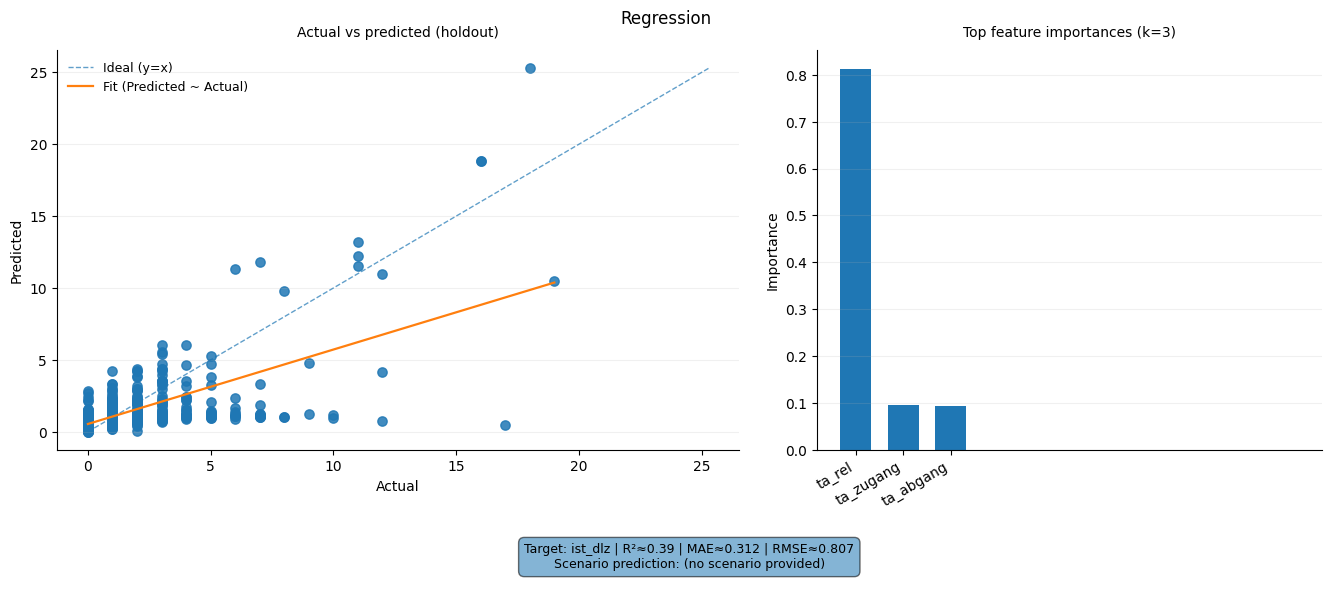


--- Summary ---
Generated analysis for: Would average cycle time improve if I use '3D CAM' as a substitute for ‘CAM-Fertigung’?.

--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Estimate the impact on average cycle time if we substitute  ‘CAM-Fertigung’ with '3D CAM'.
Family: predictive (confidence=0.95)
Type: regression (confidence=0.90)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: none
Aggregate: none (disabled)
Verify status: ok (confidence=0.4)

--- Plots ---


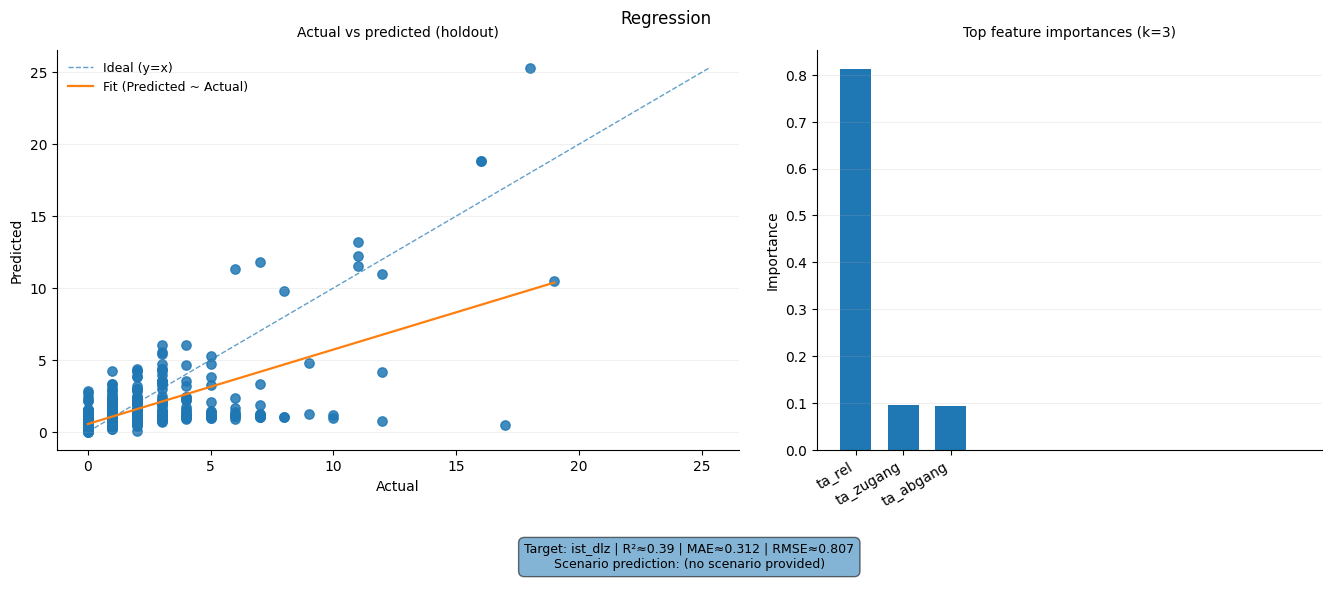


--- Summary ---
Generated analysis for: Estimate the impact on average cycle time if we substitute ‘CAM-Fertigung’ with '3D CAM'.


C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has featur


--- Output DF head() ---


ist_dlz  ta_zugang  ta_abgang  ta_rel
0      NaN       19.0        NaN     NaN
1      NaN       17.0        NaN     NaN
2      NaN       13.0        NaN     NaN
3      NaN       85.0        NaN     NaN
4      NaN        8.0        NaN     NaN


--- Run overview (inputs & key decisions) ---
Prompt: If '3D CAM' replaces  ‘CAM-Fertigung’, could average cycle time get better?
Family: prescriptive (confidence=0.90)
Type: scenario_evaluation (confidence=0.95)
Columns: ist_dlz, ta_zugang, ta_abgang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: block (confidence=0.95)

--- Plots ---


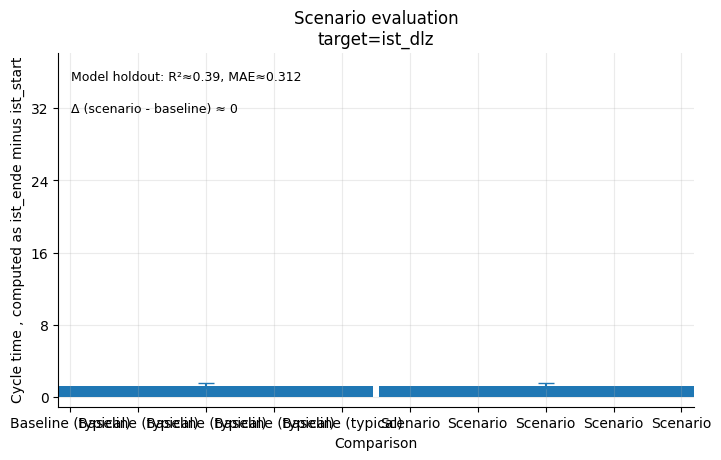


--- Summary ---
Generated analysis for: If '3D CAM' replaces ‘CAM-Fertigung’, could average cycle time get better?.
[ERROR] block 30 base: No objects to concatenate

--- Output DF head() ---


plan_start  ist_start  plan_ende  ta_abgang
393 2025-03-14 2025-04-14 2025-03-18       28.0
398 2025-04-15 2025-04-14 2025-04-16       -1.0
399 2025-03-25 2025-04-14 2025-03-26       20.0
408 2025-03-27 2025-04-13 2025-03-28       17.0
415 2025-04-14 2025-04-13 2025-04-14        0.0


--- Run overview (inputs & key decisions) ---
Prompt: Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Family: predictive (confidence=0.92)
Type: regression (confidence=0.90)
Filters: resource_group == Fräsen Gruppe 5-Achs
Columns: plan_start, ist_start, plan_ende, ta_abgang
Prepare actions: Remove rows with missing required values (ta_abgang)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


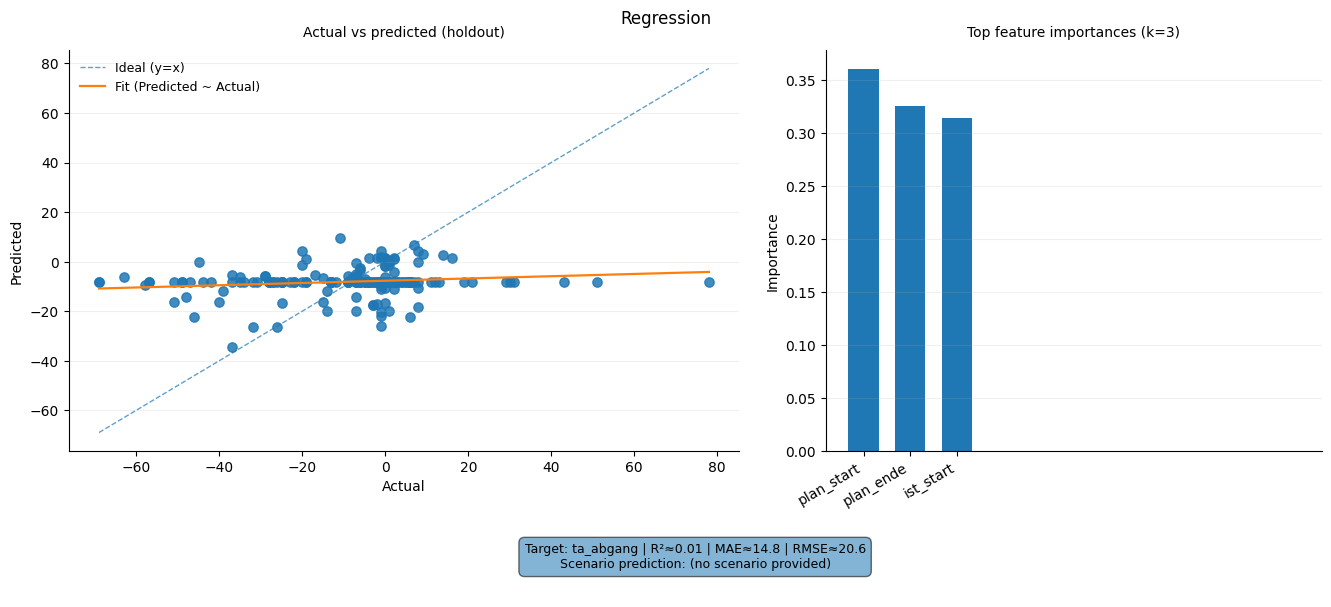


--- Summary ---
Generated analysis for: Estimate expected end-date deviation if we route work to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.


C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\DarioKulaszewski\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has featur


--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
393       28.0      1.0       31.0    -3.0
398       -1.0      1.0       -1.0     0.0
399       20.0      1.0       20.0     0.0
408       17.0      1.0       17.0     0.0
415        0.0      1.0       -1.0     1.0


--- Run overview (inputs & key decisions) ---
Prompt: How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?
Family: prescriptive (confidence=0.90)
Type: scenario_evaluation (confidence=0.95)
Filters: resource_group == Fräsen Gruppe 5-Achs; status == fertiggemeldet
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: none
Aggregate: none (disabled)
Verify status: block (confidence=0.95)

--- Plots ---


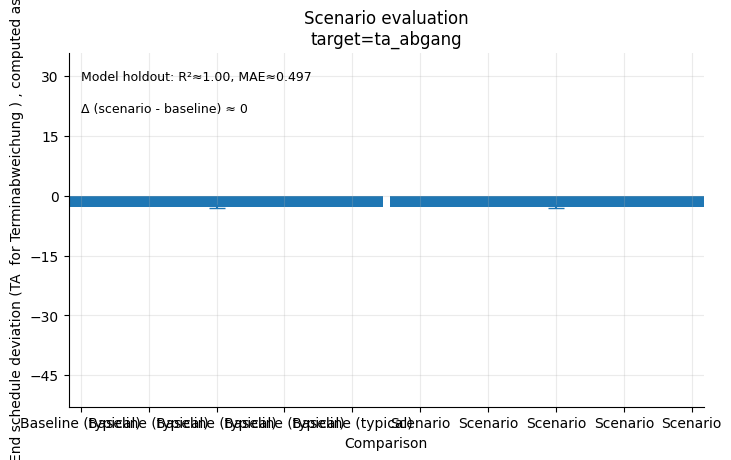


--- Summary ---
Generated analysis for: How would expected end-date deviation change by routing to 'Fräsen Gruppe 5-Achs' rather than ‘Fräsen DM100’?.

--- Output DF head() ---


ta_abgang  ist_dlz  ta_zugang  ta_rel
0        NaN      NaN       19.0     NaN
1        NaN      NaN       17.0     NaN
2        NaN      NaN       13.0     NaN
3        NaN      NaN       85.0     NaN
4        NaN      NaN        8.0     NaN


--- Run overview (inputs & key decisions) ---
Prompt: Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.
Family: predictive (confidence=1.00)
Type: regression (confidence=0.95)
Columns: ta_abgang, ist_dlz, ta_zugang, ta_rel
Prepare actions: Standardize missing-value labels; Clean up text (trim spaces)
Aggregate: none (disabled)
Verify status: warn (confidence=0.5)

--- Plots ---


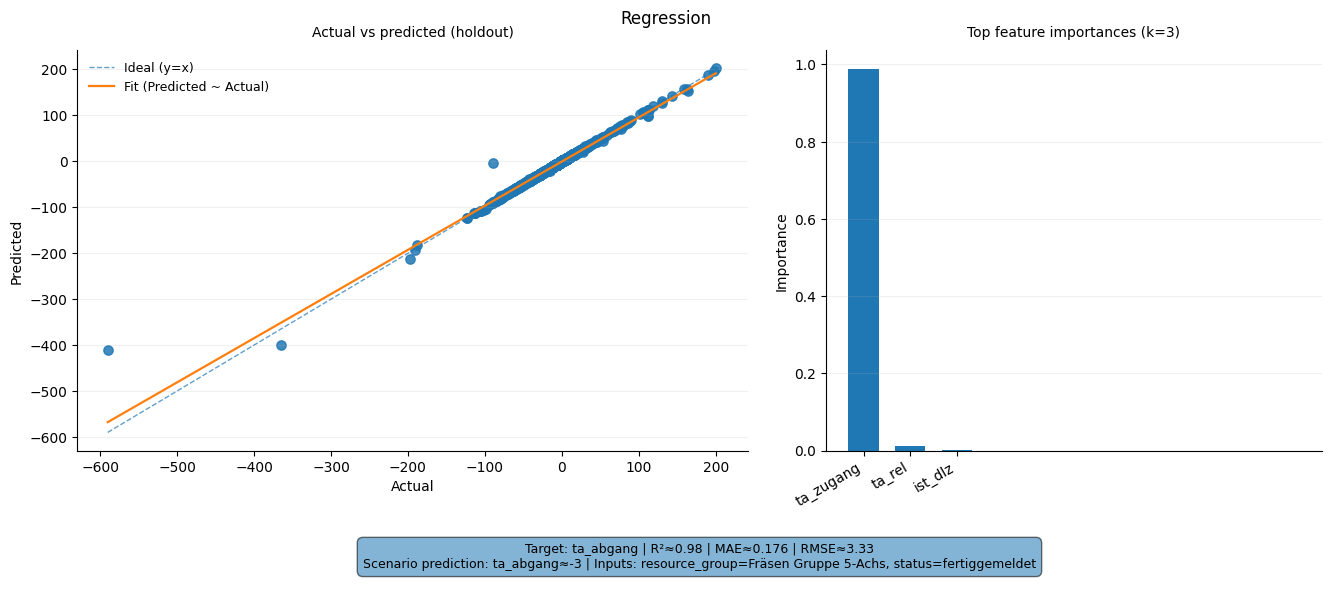


--- Summary ---
Generated analysis for: Predict the expected end-date deviation when routing to 'Fräsen Gruppe 5-Achs' instead of ‘Fräsen DM100’.


In [14]:
summary = await run_all_prompts(
    prompts_with_alternatives,
    df=df,
    agents=agents,
    out_dir="run_reports",
    render_final=True,   # avoid huge notebook output
)